# Setup

## Load Libraries

In [1]:
library(tidyverse)
library(data.table)
library(broom)
library(dtplyr)
library(lme4) #for lmer & glmer models
library(lmerTest)
library(ggbeeswarm)
library(cowplot)
library(leaflet) # for maps
library(psych)
library(corrplot)
library(sjPlot) 
library(rstanarm)

── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘psych’


The following objects are masked

ERROR: Error in library(rstanarm): there is no package called ‘rstanarm’


## Load Data

In [321]:
load('../../3_1_2_processed_data/VIB_measure_cleaned_data2022-03-04.RData')

This loads:

- `q_df` | the full Qualtrics dataframe with text responses
- `qn_df` | full Qualtrics dataframe with numeric responses
- `q_df1` | First run on SONA
- `ib_measures_df` | Intention behavior gap measures
- `eisen_quad` | Eisenhower quadrant values
- `validation_measures` | Individual difference questionnaires
- `prescreen` | SONA prescreen info (selected in `01_VIB Gap DataMunge`

# Analyses

## Individual Domain Gap + Measure Correlations

In [324]:
head(ib_gap_domains)

Diet_gap Exercise_gap Mental-Personal Health_gap Medical Health_gap Sleep_gap
1 1.5      1.5          1.5                        1.5                1.5      
2  NA      3.0           NA                         NA                 NA      
3 1.5      3.0          1.5                         NA                1.5      
4  NA      4.5           NA                         NA                 NA      
5 3.0      3.0          3.0                        1.5                1.5      
6 6.0      6.0          4.5                         NA                0.0      
  Alcohol/drug_gap Online time_gap Phone_gap Video games_gap Reading_gap ⋯
1  3               NA               NA        NA              NA         ⋯
2 NA               NA               NA        NA              NA         ⋯
3  0               NA              4.5       4.5             4.5         ⋯
4 NA               NA               NA        NA              NA         ⋯
5 NA               NA               NA        NA             4.5         ⋯
6  0                0              0.0       3.0              NA         ⋯
  Learning_gap Self-Improvement_gap Volunteering_gap Community involvement_gap
1 NA           3.0                  1.5              0.0                      
2 NA            NA                   NA               NA                      
3  3           3.0                  3.0              1.5                      
4 NA           4.5                   NA               NA                      
5 NA           3.0                  4.5              6.0                      
6 NA           4.5                   NA               NA                      
  Admin_gap Future planning_gap Finances_gap Time Management_gap
1 0.0       0.0                  0           0.0                
2  NA        NA                 NA            NA                
3  NA       1.5                  3           0.0                
4 6.0       4.5                 NA            NA                
5  NA       3.0                  3           1.5                
6 1.5       0.0                  0           3.0                
  Punctuality_gap subjectID
1 0.0             1        
2 0.0             2        
3 1.5             3        
4 1.5             4        
5 1.5             5        
6 3.0             6

In [319]:
boredom = validation_measures[c('subjectID', 'boredomProne_score')]

In [341]:
grit = validation_measures[c('subjectID', 'grit_score')]

In [359]:
conscientiousness = validation_measures[c('subjectID', 'con_hex_score')]

In [360]:
df = merge(ib_gap_domains, conscientiousness, by = 'subjectID')


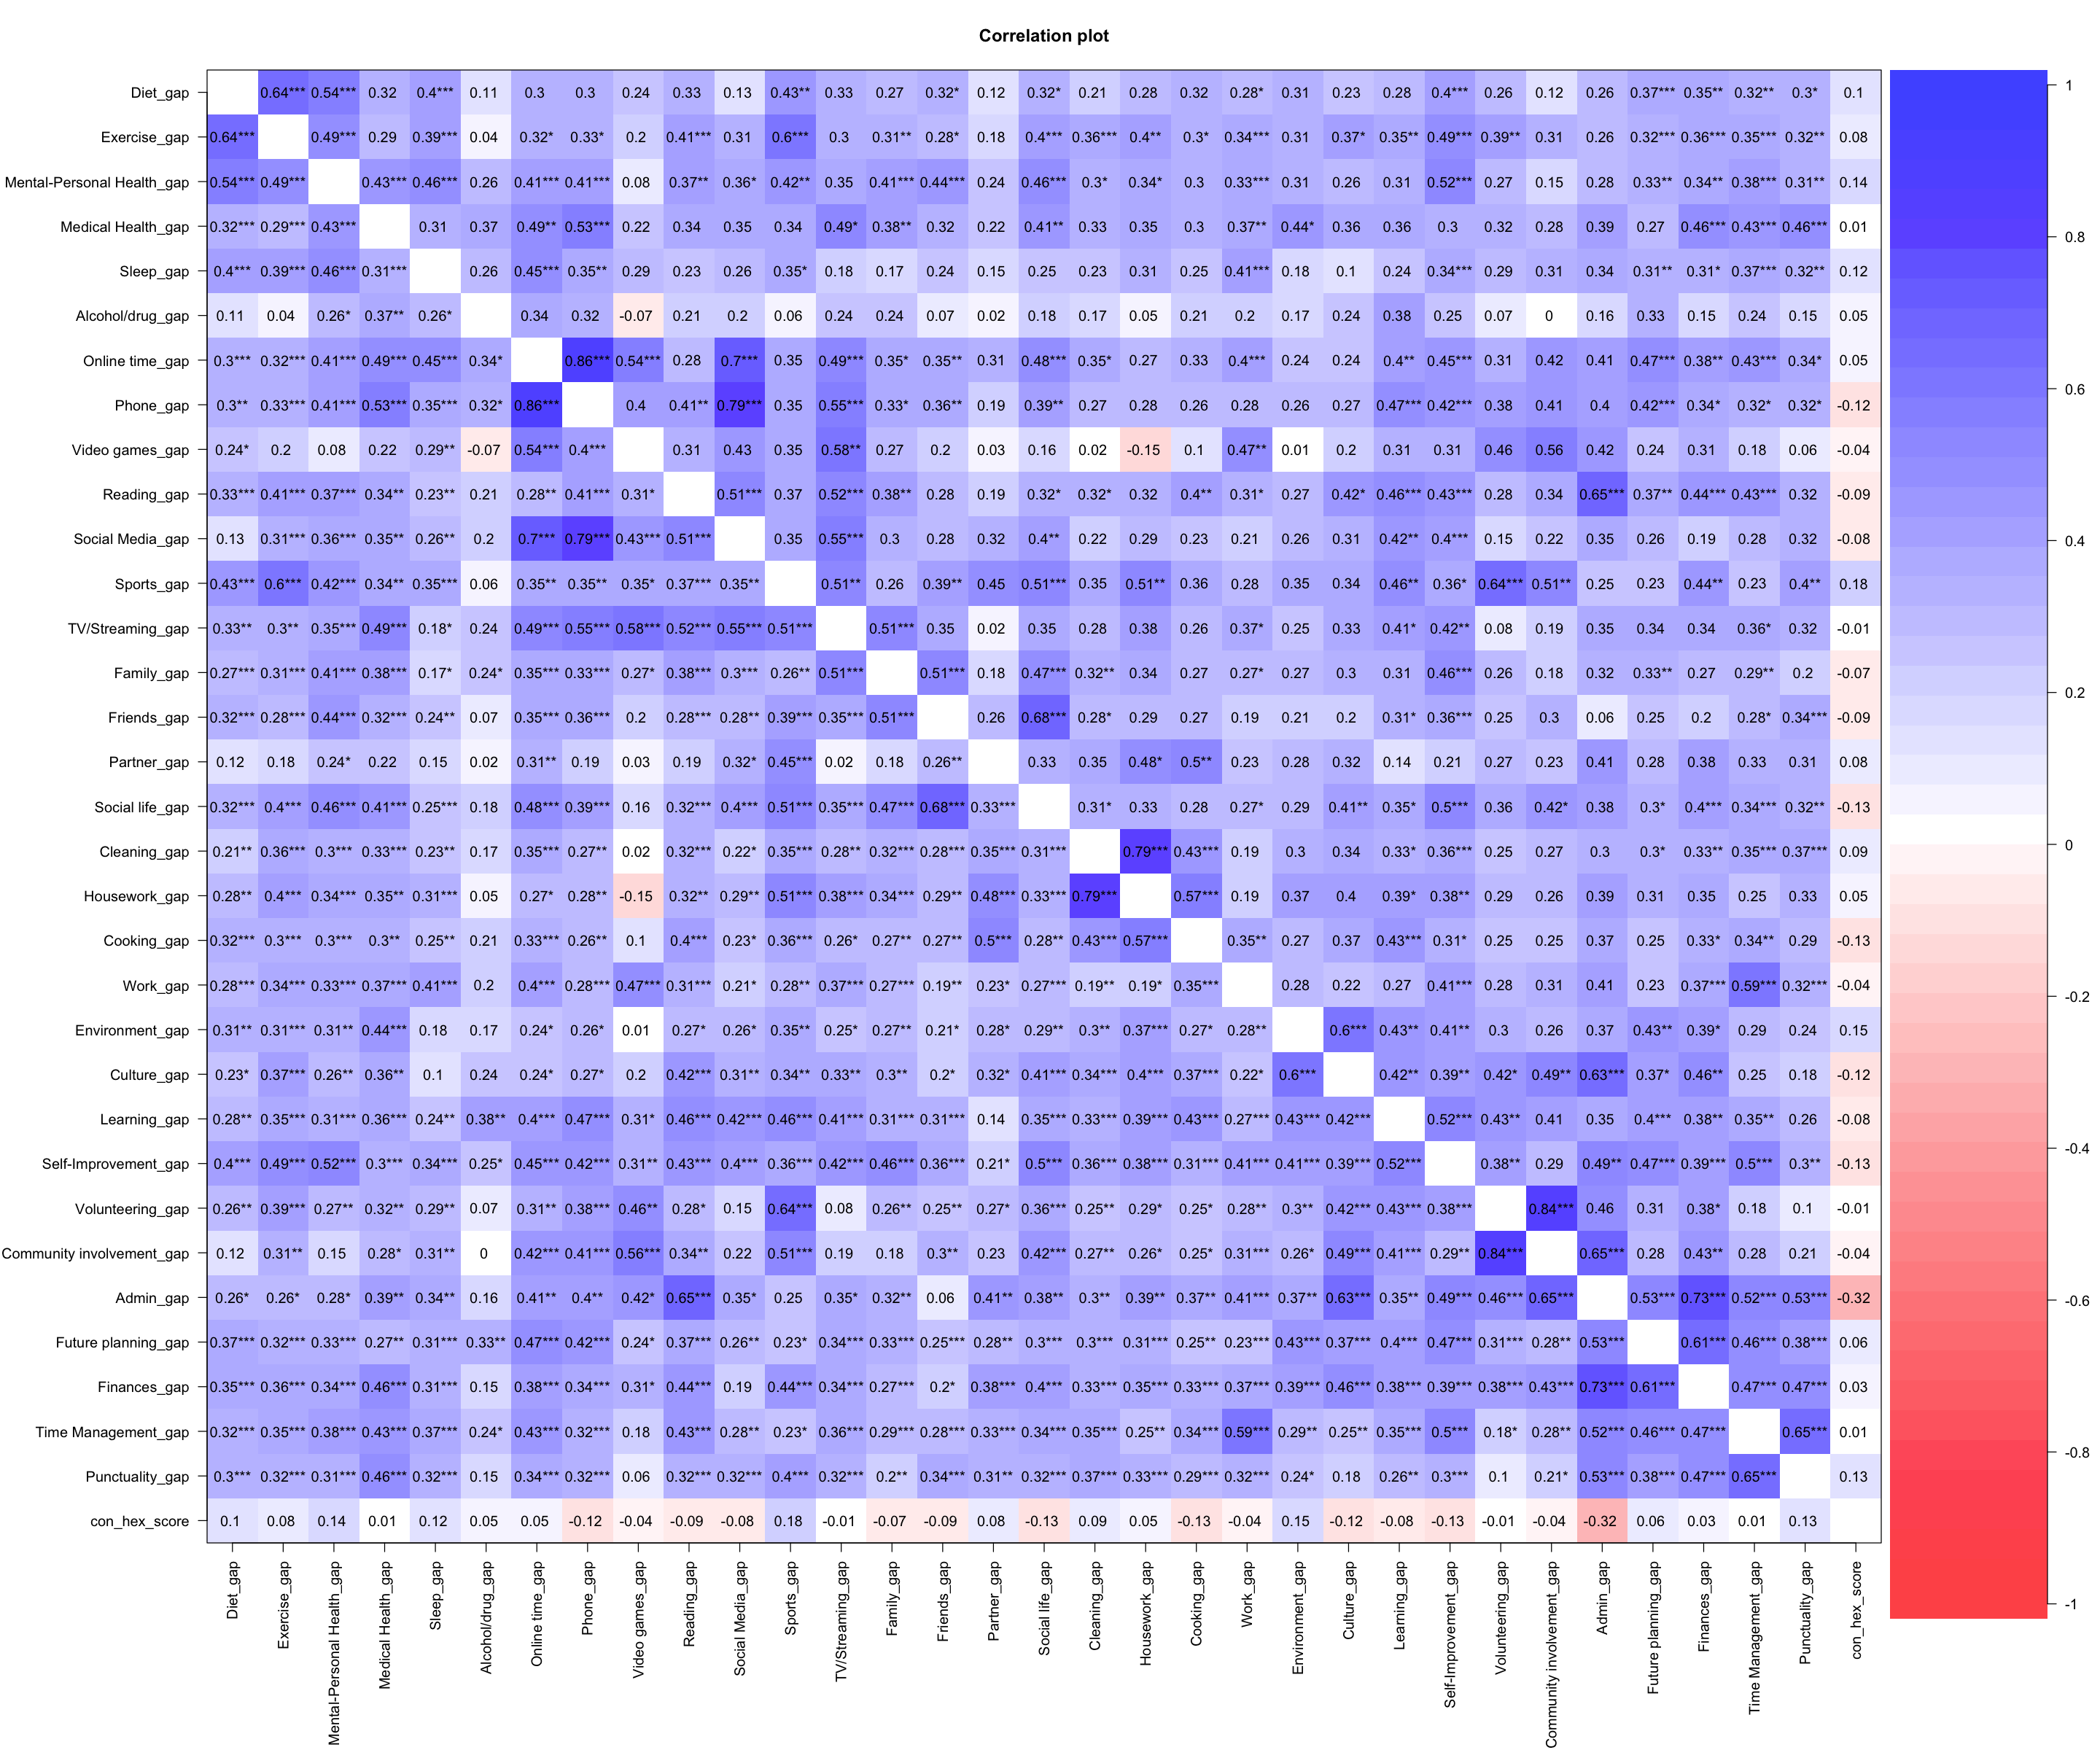

In [362]:
options(repr.plot.width = 24, repr.plot.height = 20)

cor.plot(select(df, -subjectID), cex = 1, xlas = 2, stars = TRUE, diag = FALSE, cex.axis = 1, MAR=7.5)

In [361]:
# # Save to pdf
# options(repr.plot.width = 24, repr.plot.height = 20)

# pdf("rplot.pdf", width = 24, height = 20) 
# cor.plot(select(df, -subjectID), cex = 1, xlas = 2, stars = TRUE, diag = FALSE, cex.axis = 1, MAR=7.5)
# # Close the pdf file
# dev.off() 


pdf 
  2

## Pre-Post Change

In [241]:
cor(ib_measures_df$overall_gap_pre, ib_measures_df$overall_gap_post)

[1] 0.6059377

In [5]:
t.test(ib_measures_df$overall_gap_pre, ib_measures_df$overall_gap_post, paired = TRUE)


	Paired t-test

data:  ib_measures_df$overall_gap_pre and ib_measures_df$overall_gap_post
t = -4.0026, df = 288, p-value = 7.976e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.414669 -1.844847
sample estimates:
mean of the differences 
              -3.629758 


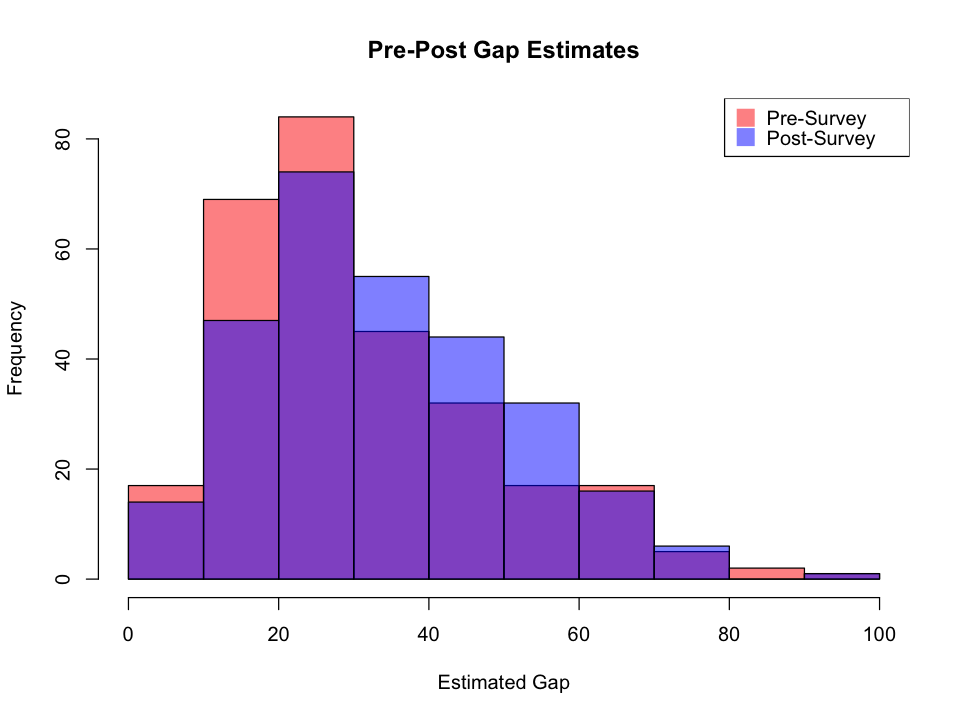

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)

# First distribution
hist(ib_measures_df$overall_gap_pre, breaks=10, xlim=c(0,100), col=rgb(1,0,0,0.5), xlab="Estimated Gap", 
     ylab="Frequency", main="Pre-Post Gap Estimates" )

# Second with add=T to plot on top
hist(ib_measures_df$overall_gap_post, breaks=10, xlim=c(0,100), col=rgb(0,0,1,0.5), add=T)

# Add legend
legend("topright", legend=c("Pre-Survey","Post-Survey"), col=c(rgb(1,0,0,0.5), 
     rgb(0,0,1,0.5)), pt.cex=2, pch=15 )

In [7]:
# create long df
df <- ib_measures_df %>%
    as_tibble() %>%
    select(subjectID, overall_gap_pre, overall_gap_post) %>%
    pivot_longer(
        cols=c('overall_gap_pre', 'overall_gap_post'),
    names_to = "pre_post",
    values_to = "Value"
  )
head(df)

subjectID pre_post         Value
1 1         overall_gap_pre  15   
2 1         overall_gap_post 19   
3 2         overall_gap_pre  55   
4 2         overall_gap_post 60   
5 3         overall_gap_pre  40   
6 3         overall_gap_post 35

In [10]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [11]:
pre_val <-ib_measures_df$overall_gap_pre
post_val <-ib_measures_df$overall_gap_post
pre_post_change = post_val - pre_val
pre_post_id = 1:length(pre_val)

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


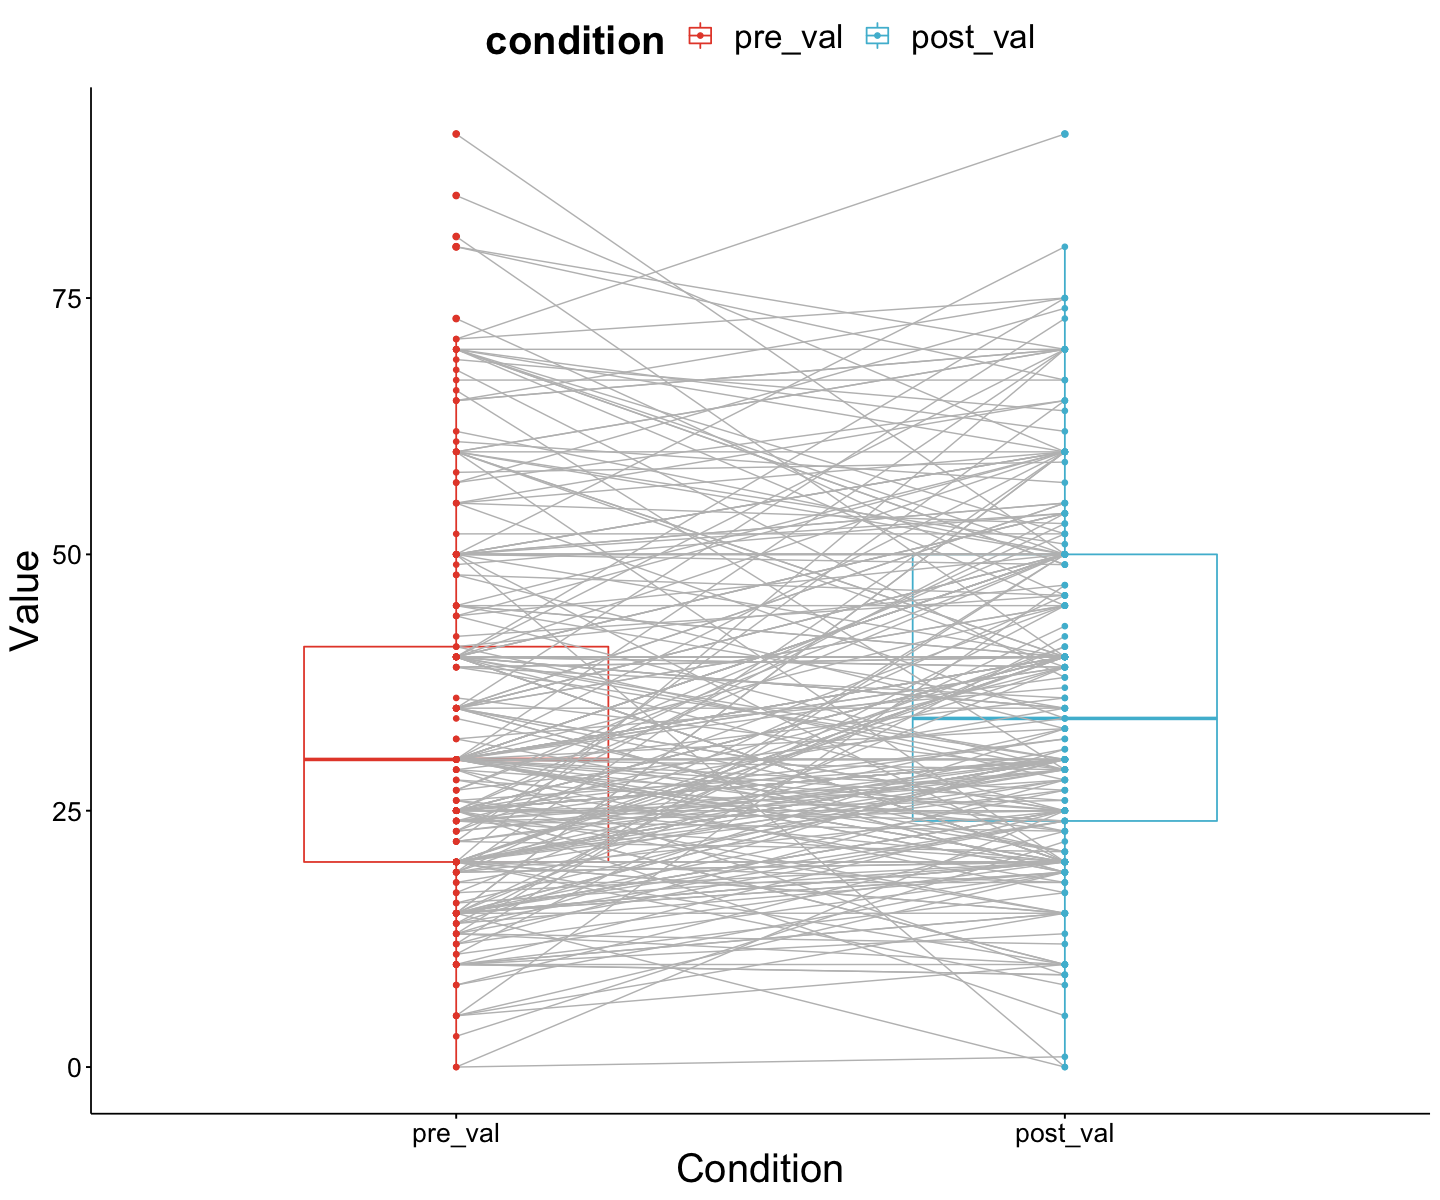

In [12]:
options(repr.plot.width = 12, repr.plot.height = 10)

pre_val <-ib_measures_df$overall_gap_pre
post_val <-ib_measures_df$overall_gap_post
# pre_post_change = post_val - pre_val
# pre_post_id = as.factor(1:length(pre_val))

df <- data.frame(pre_val = pre_val, post_val = post_val)

ggpaired(df, cond1 = 'pre_val', cond2 = 'post_val',
         color = "condition",
         line.color = "grey", line.size = 0.4,
         palette = "npg") + 

 font("xlab", size = 24) + 
 font("ylab", size = 24) + 
 font("xy.text", size = 16) +
 font("legend.title", size = 24, face='bold') + 
 font("legend.text", size = 20)

## Weighted vs. Unweighted

Is there a principled way to say that weighted is "better"?

In [242]:
# validation measures of interest
val_m = c('ambition_score',
          'boredomProne_score',
          'bscs_score',
          'con_hex_score',
          'dass_depress',
          'dass_anxiety',
          'dass_stress',
          'flourish_score',
          'fat',
          'fruit_veg',
          'future_score',
          'grit_score',
          'harmony_score',
          'needForCognition_score',
          'qualityLife_score',
          'swl_cantril_ladder',
          'SWL5_score',
          'workEthic_score',
          'self_esteem_single_1',
          'socialD_score',
          'subjectHappy_score'
          )

In [244]:
df = validation_measures %>%
    as_tibble() %>%
    select(subjectID, all_of(val_m))

# add bmi
df = merge(df, select(demographics, subjectID, bmi), by = 'subjectID')

# add domain gap measures
df = merge(df, select(ib_measures_df, subjectID, w_domain_gap, domain_gap), by = 'subjectID')

# don't need subject ID now that we have joined everything
df = select(df, -subjectID)

In [245]:
df_cor = cor(df[, c(1:7,11:12,14,18,24)], use="complete.obs") # need to specify complete.obs as bmi has some NAsb

In [276]:
# people with diet goals
diet_goals = qn_df[qn_df$ib_domains_goal_1 == '1']$subjectID

# people with exercise goals
exercise_goals = qn_df[qn_df$ib_domains_goal_2 == '1']$subjectID

In [278]:
cor(df[-exercise_goals, c(22,24)], use="complete.obs")

bmi       domain_gap
bmi        1.0000000 0.1540594 
domain_gap 0.1540594 1.0000000

In [ ]:
qn_df$ib_domains_goal_1

In [238]:
cor(df$domain_gap, df$bmi, use="complete.obs")


[1] -0.009766816

In [236]:
summary(lm(domain_gap ~ dass_stress, data = df))


Call:
lm(formula = domain_gap ~ dass_stress, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86414 -0.70640 -0.09231  0.67682  2.38337 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4711     0.1623   15.22   <2e-16 ***
dass_stress   0.2263     0.1237    1.83   0.0696 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9438 on 131 degrees of freedom
  (156 observations deleted due to missingness)
Multiple R-squared:  0.02492,	Adjusted R-squared:  0.01747 
F-statistic: 3.347 on 1 and 131 DF,  p-value: 0.06959


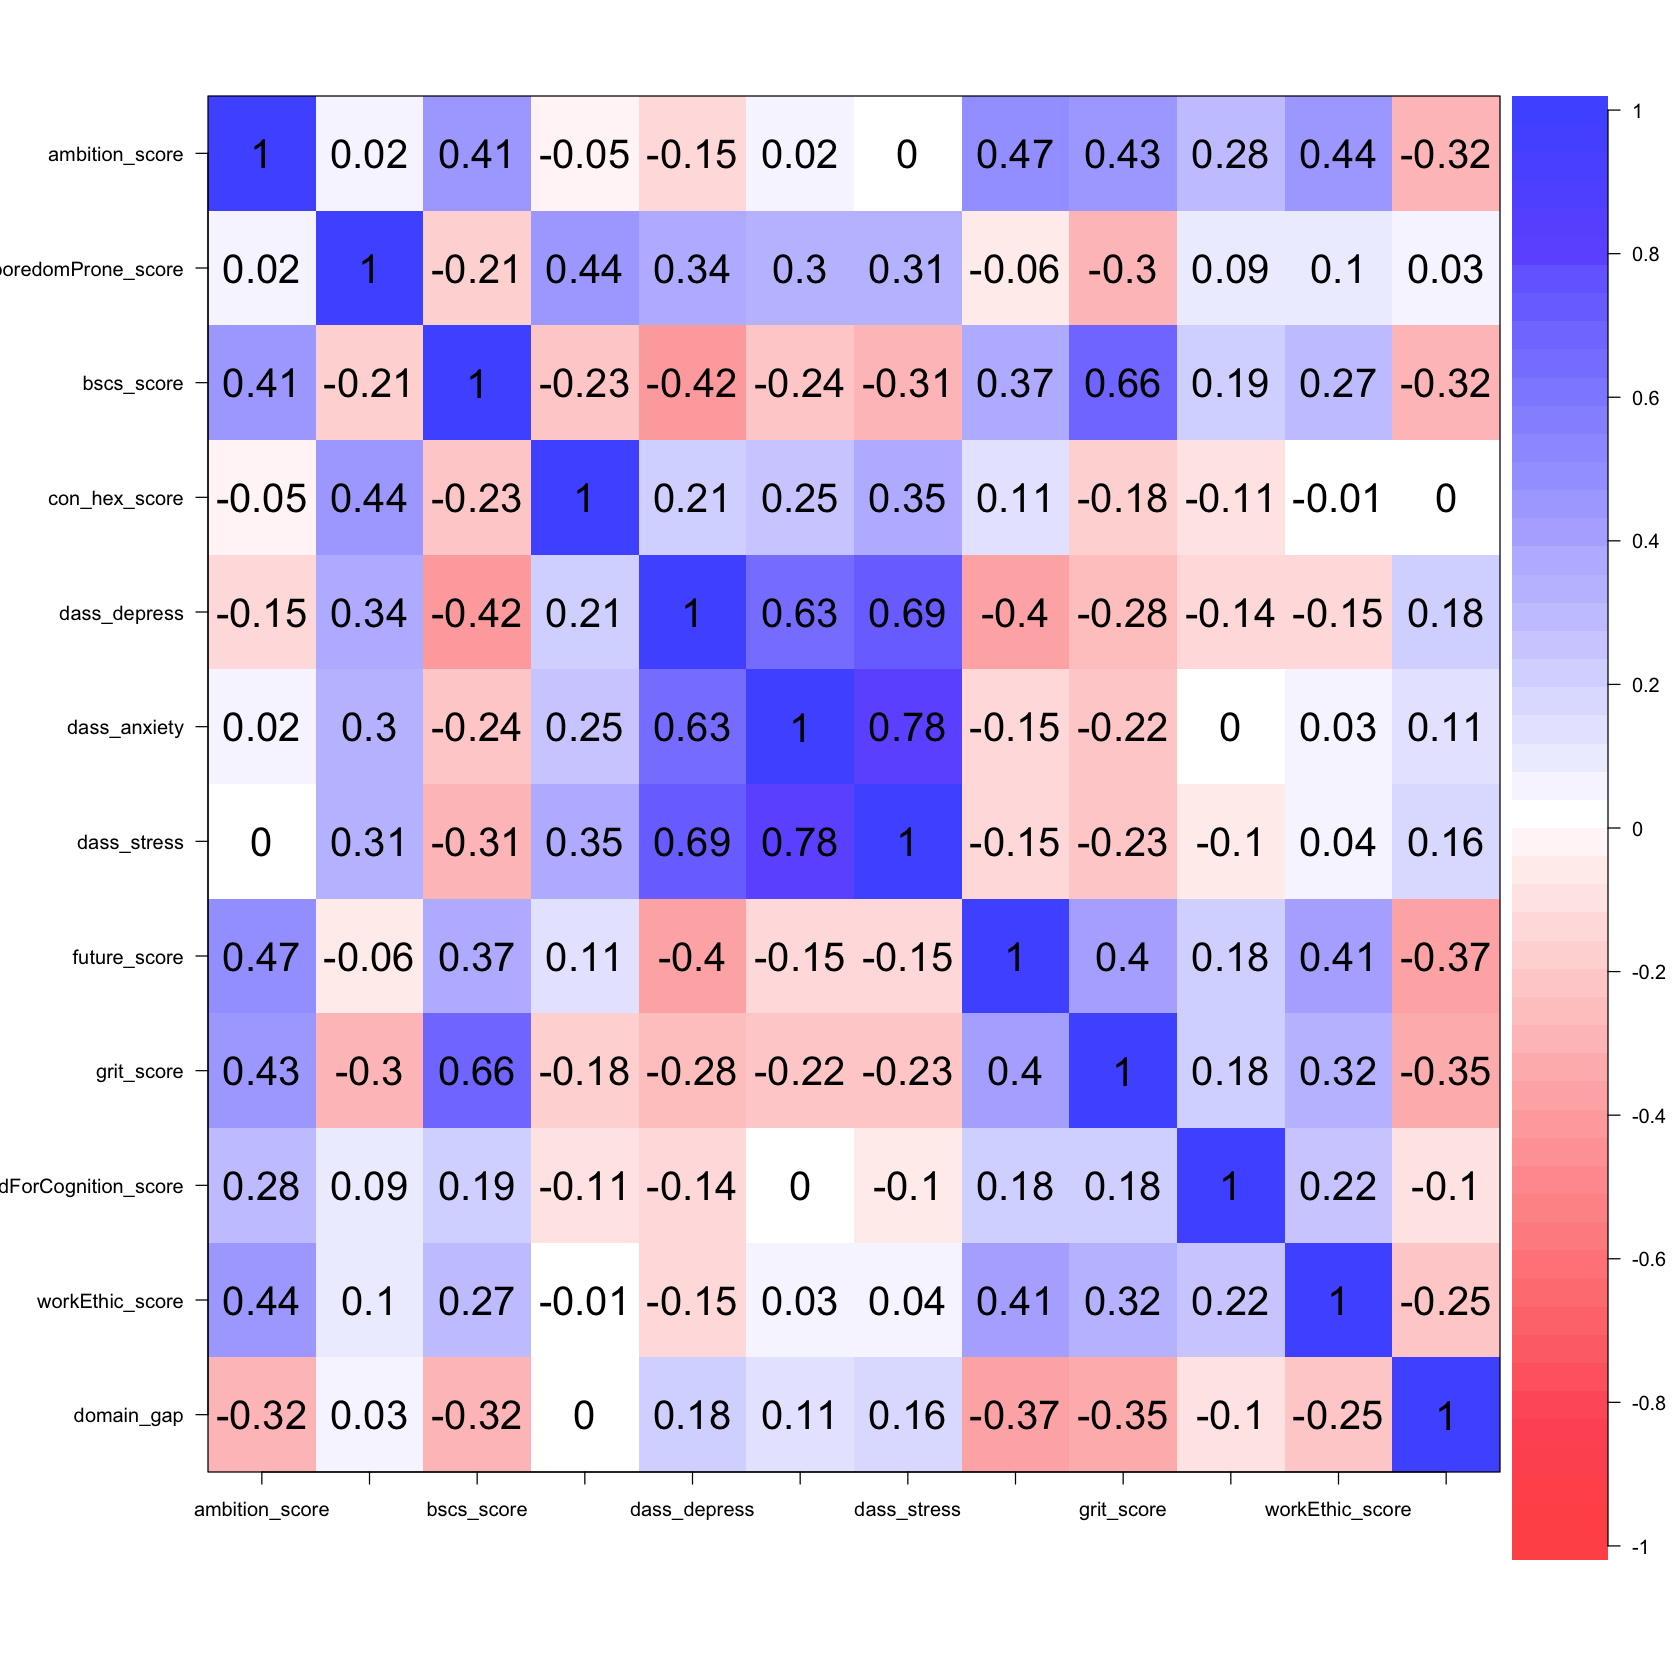

In [246]:
options(repr.plot.width = 14, repr.plot.height = 14)

cor.plot(df_cor, cex=2)

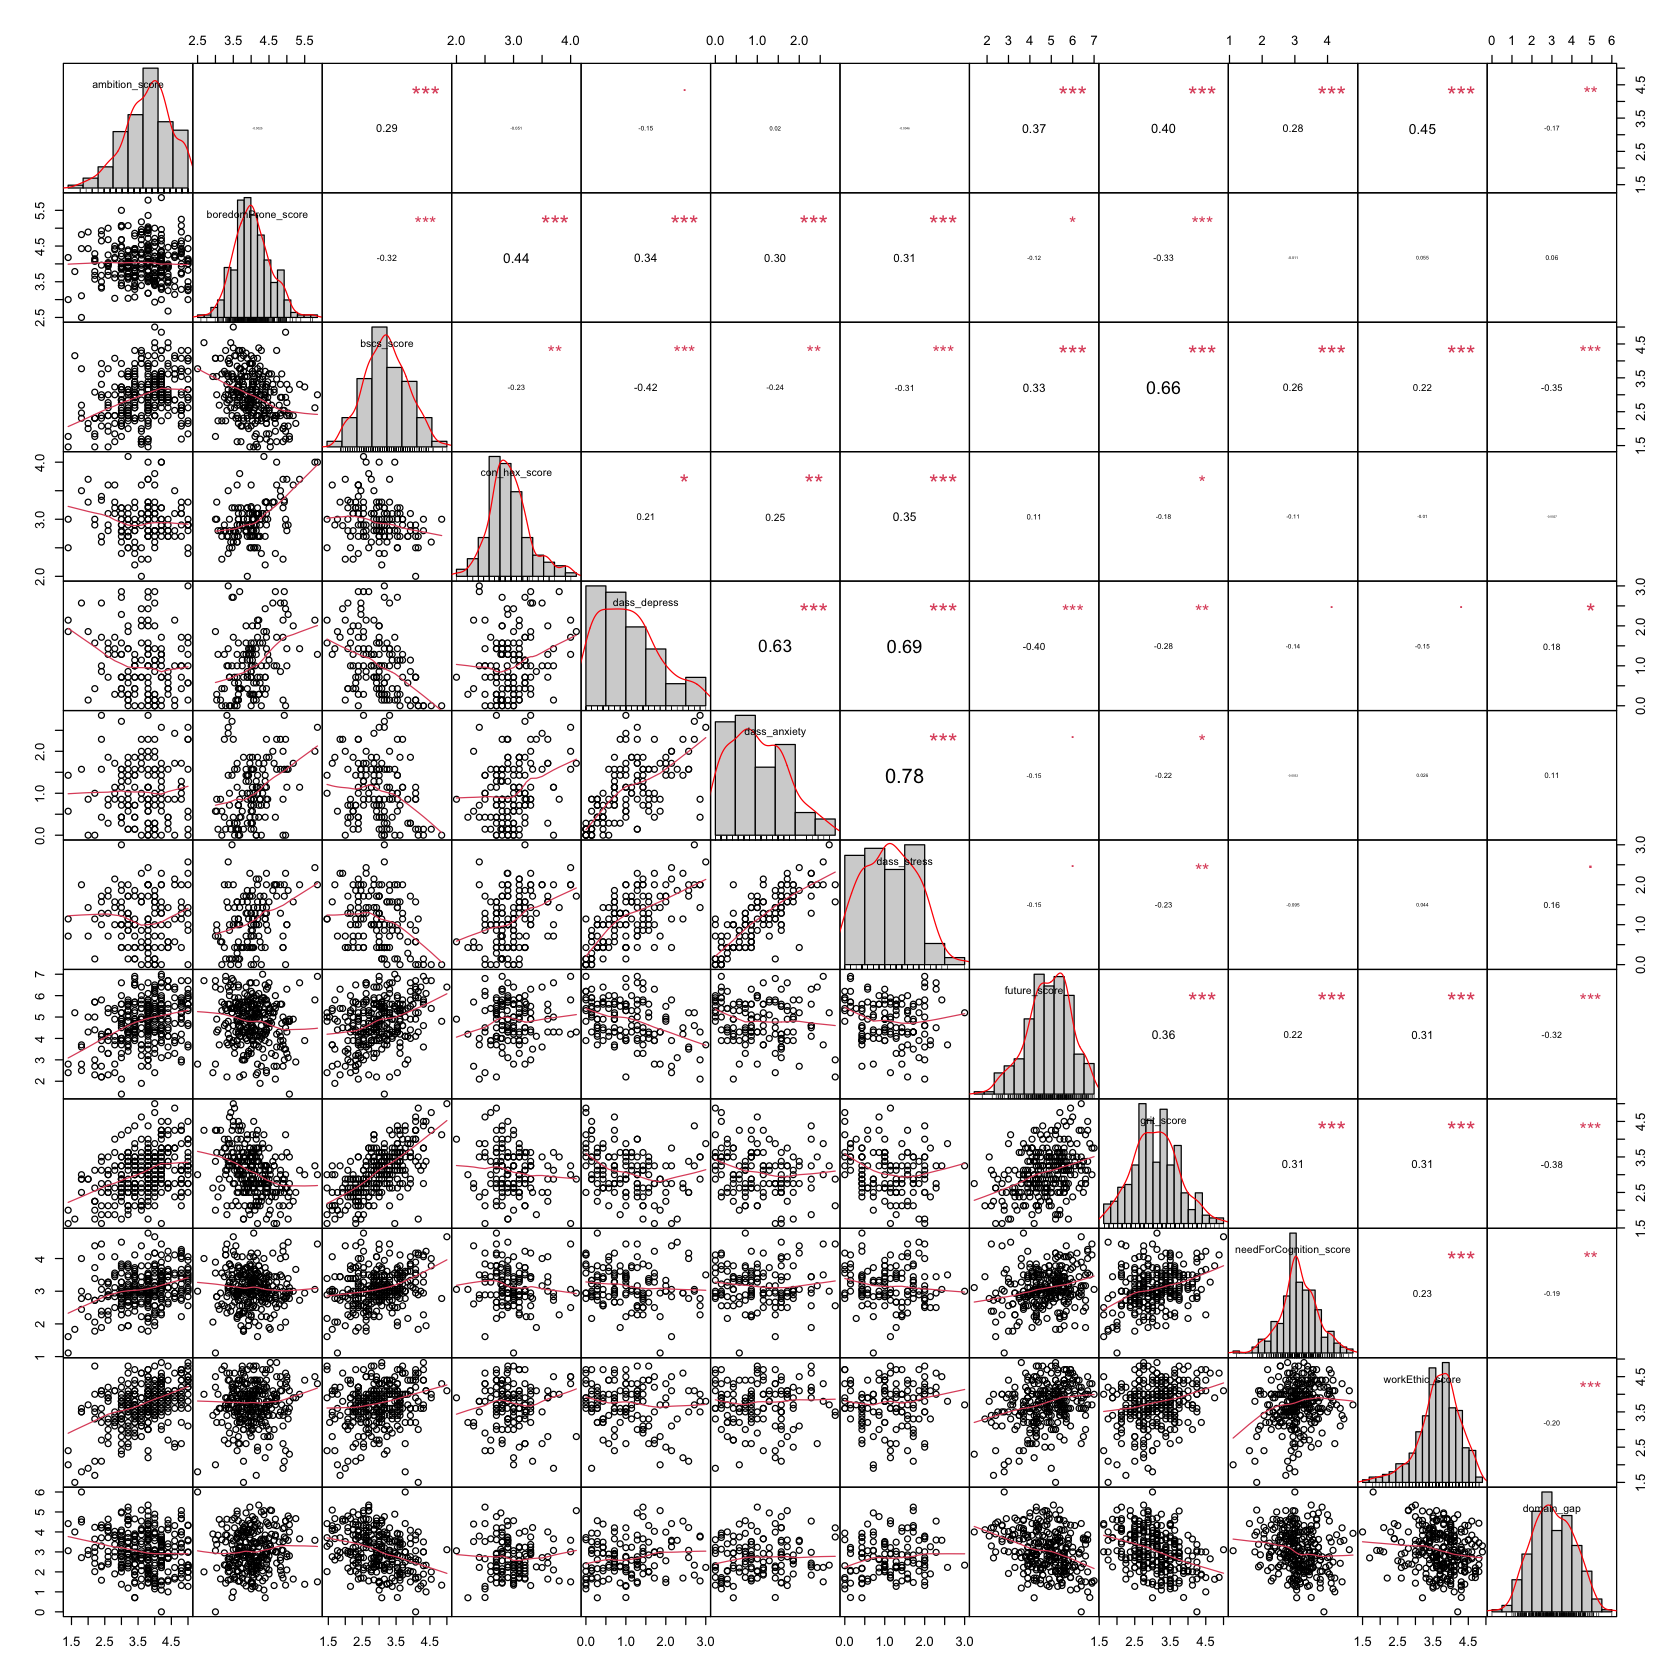

In [247]:
chart.Correlation(df[, c(1:7,11:12,14,18,24)], histogram = TRUE, pch = 25)

In [248]:
df_cor = cor(df[, c(8:10,14,15:17,19,21,22,24)], use="complete.obs") # need to specify complete.obs as bmi has some NAsb

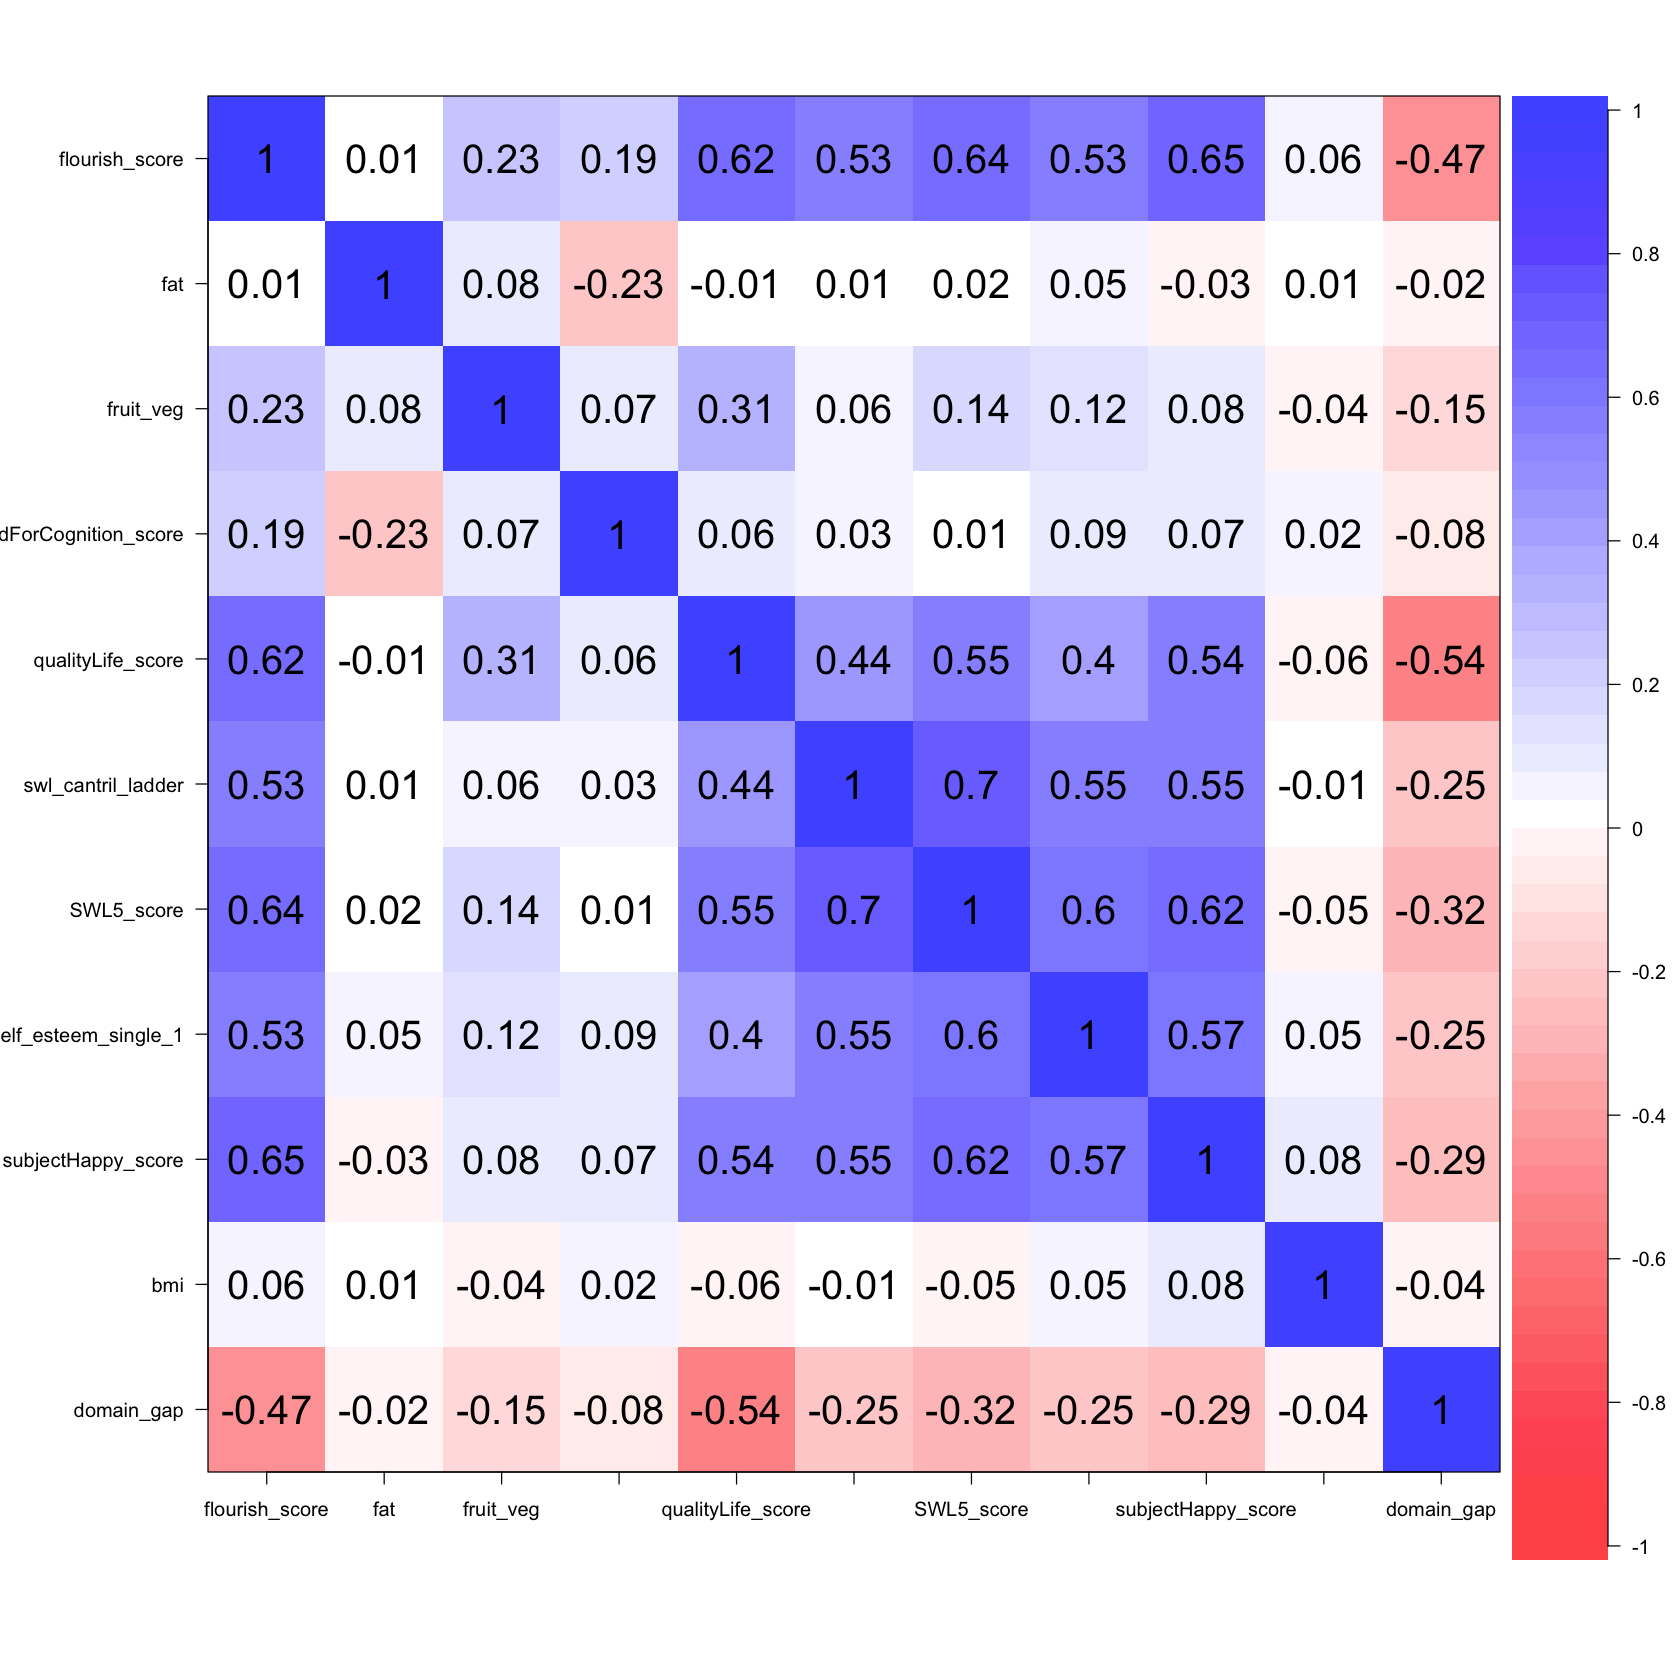

In [249]:
cor.plot(df_cor, cex=2)

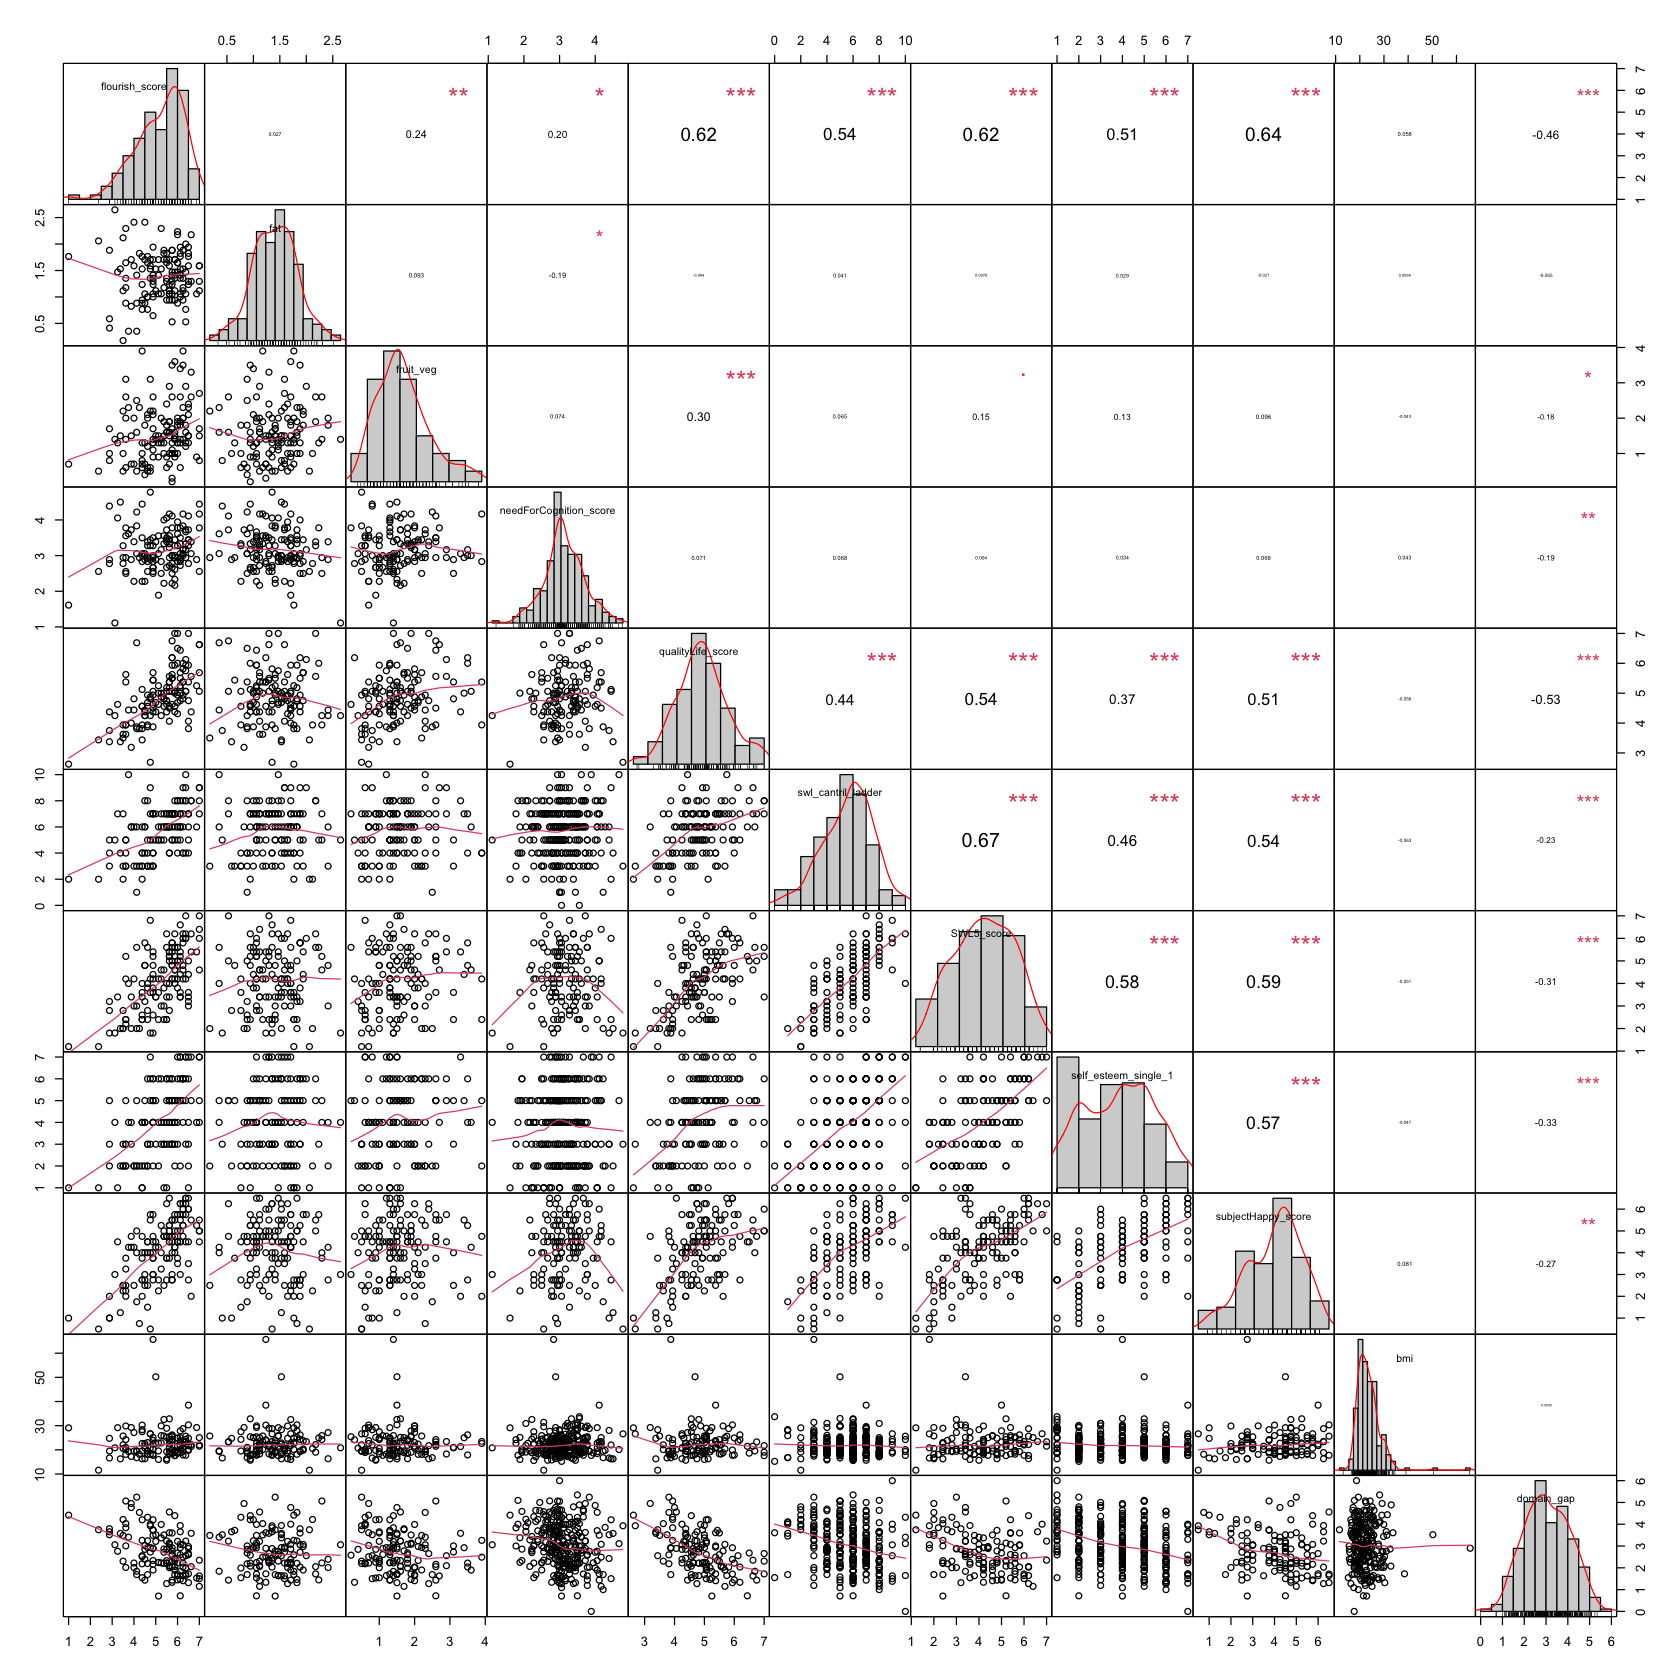

In [250]:
chart.Correlation(df[, c(8:10,14,15:17,19,21,22,24)], histogram = TRUE, pch = 25)

In [208]:
library("PerformanceAnalytics")

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following object is masked from ‘package:leaflet’:

    addLegend


The following objects are masked from ‘package:data.table’:

    first, last


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.53107”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.11878”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.014009”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.53107”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.11878”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities

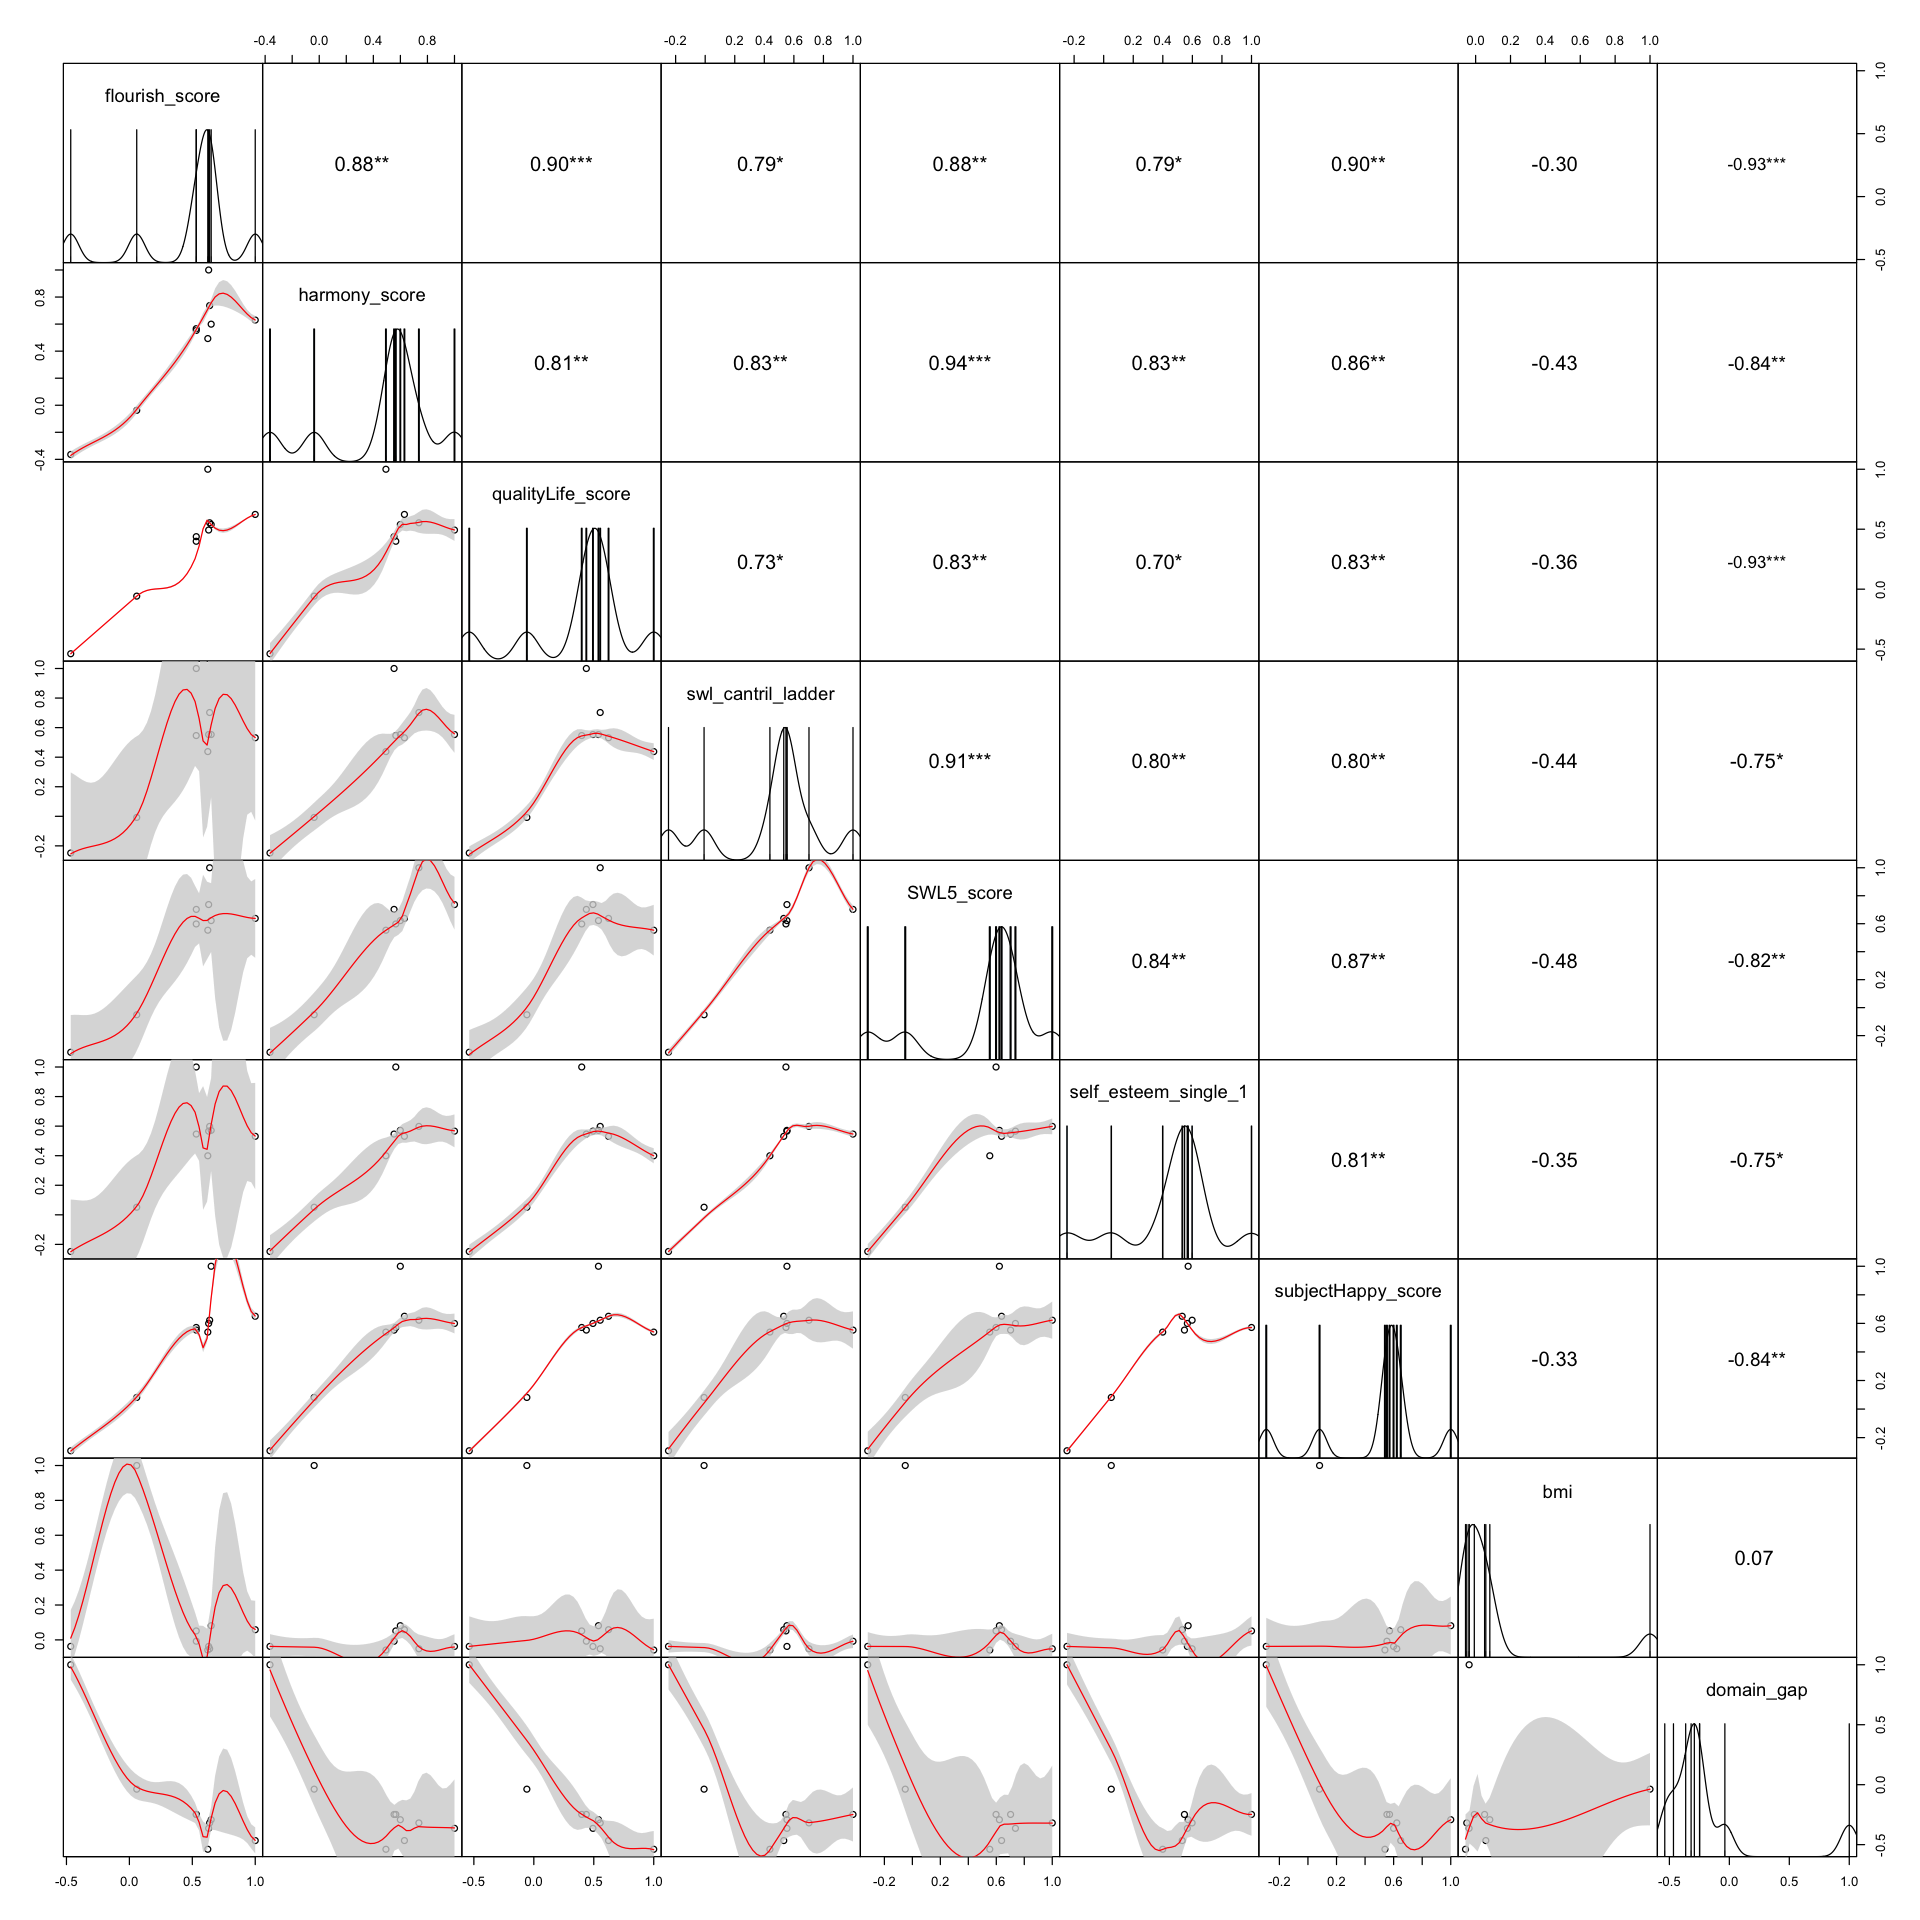

In [205]:
pairs.panels(df_cor,
             smooth = TRUE,      # If TRUE, draws loess smooths
             scale = FALSE,      # If TRUE, scales the correlation text font
             density = TRUE,     # If TRUE, adds density plots and histograms
             ellipses = FALSE,    # If TRUE, draws ellipses
             method = "pearson", # Correlation method (also "spearman" or "kendall")
             pch = 21,           # pch symbol
             lm = FALSE,         # If TRUE, plots linear fit rather than the LOESS (smoothed) fit
             cor = TRUE,         # If TRUE, reports correlations
             jiggle = FALSE,     # If TRUE, data points are jittered
             factor = 2,         # Jittering factor
             hist.col = 4,       # Histograms color
             stars = TRUE,       # If TRUE, adds significance level with stars
             ci = TRUE,
             cex.labels=1.4,
            gap=0)          # If TRUE, adds confidence intervals

- Remove last two rows and then 
- average columns 

This will show which measure has the highest average correlation, and specifically weather **weighted** or **unweighted** is "better" on average...

In [17]:
dim(df_cor)

[1] 22 22

Sum the columns, but remove the last two rows (aren't trying to see how measures correlate with domain gaps)

In [22]:
df_cor

ambition_score boredomProne_score bscs_score 
ambition_score          1.00000000     0.028458497        0.41591568
boredomProne_score      0.02845850     1.000000000       -0.20513775
bscs_score              0.41591568    -0.205137746        1.00000000
con_hex_score          -0.02919019     0.423486610       -0.21591727
dass_depress           -0.13152796     0.308312773       -0.42373177
dass_anxiety            0.02296375     0.276997195       -0.24213445
dass_stress             0.01535196     0.283825229       -0.29674705
flourish_score          0.50845304    -0.028702738        0.42981159
future_score            0.46416968    -0.052046673        0.35663045
grit_score              0.44981557    -0.290609273        0.64874263
harmony_score           0.23777001    -0.034447116        0.35227680
needForCognition_score  0.30559685     0.080812814        0.18585870
qualityLife_score       0.33473915    -0.179678028        0.54358240
swl_cantril_ladder      0.20100983    -0.071461468        0.34535193
SWL5_score              0.25117062    -0.075333165        0.32347619
workEthic_score         0.44449146     0.101444877        0.28691663
self_esteem_single_1    0.34254568     0.020617201        0.35635789
socialD_score           0.23815636     0.018056749        0.25377915
subjectHappy_score      0.29499745    -0.229638379        0.38052769
bmi                     0.03041018    -0.006346218        0.07556562
w_domain_gap           -0.19979628    -0.004011484       -0.21096939
domain_gap             -0.31677625     0.044757309       -0.30596381
                       con_hex_score dass_depress dass_anxiety dass_stress 
ambition_score         -0.029190194  -0.13152796   0.02296375   0.015351965
boredomProne_score      0.423486610   0.30831277   0.27699720   0.283825229
bscs_score             -0.215917268  -0.42373177  -0.24213445  -0.296747053
con_hex_score           1.000000000   0.18062593   0.23552627   0.332896765
dass_depress            0.180625933   1.00000000   0.62542497   0.678334750
dass_anxiety            0.235526272   0.62542497   1.00000000   0.778140867
dass_stress             0.332896765   0.67833475   0.77814087   1.000000000
flourish_score          0.056691690  -0.43941352  -0.12369735  -0.129173715
future_score            0.121875751  -0.39681534  -0.15700064  -0.150649240
grit_score             -0.153329316  -0.27709592  -0.21077249  -0.209305132
harmony_score           0.080686916  -0.36938562  -0.20558264  -0.262829242
needForCognition_score -0.115088146  -0.16514883  -0.00387671  -0.099179385
qualityLife_score      -0.024589514  -0.41335544  -0.15841165  -0.200006244
swl_cantril_ladder      0.043924588  -0.33256670  -0.17788420  -0.178338112
SWL5_score              0.134787532  -0.40329716  -0.19876497  -0.141544781
workEthic_score        -0.006961575  -0.13968859   0.03508815   0.056898681
self_esteem_single_1    0.019911757  -0.40842646  -0.30544419  -0.228012704
socialD_score          -0.071223768  -0.13306060  -0.05592140  -0.191697653
subjectHappy_score     -0.009220415  -0.50227667  -0.31334297  -0.323086256
bmi                    -0.055115051  -0.03009716  -0.06169901  -0.008910548
w_domain_gap           -0.036958168   0.17778875   0.14147723   0.157224597
domain_gap             -0.007339630   0.20459645   0.13018626   0.161496092
                       flourish_score future_score grit_score  ⋯
ambition_score          0.50845304     0.46416968   0.44981557 ⋯
boredomProne_score     -0.02870274    -0.05204667  -0.29060927 ⋯
bscs_score              0.42981159     0.35663045   0.64874263 ⋯
con_hex_score           0.05669169     0.12187575  -0.15332932 ⋯
dass_depress           -0.43941352    -0.39681534  -0.27709592 ⋯
dass_anxiety           -0.12369735    -0.15700064  -0.21077249 ⋯
dass_stress            -0.12917372    -0.15064924  -0.20930513 ⋯
flourish_score          1.00000000     0.73504590   0.44036153 ⋯
future_score            0.73504590     1.00000000   0.41203613 ⋯
grit_score              0.44036153    

In [25]:
avg_r = colSums(abs(df_cor[1:20,]))

Now need to remove `1` from all columns except for the gaps

This is because the diagonals are the correlaions of the item with itself 

This has already been removed for the gaps when we removed the bottom two rows...

In [26]:
avg_r[1:20] = avg_r[1:20] -1
avg_r = avg_r/20 # get average

In [27]:
sort(avg_r)

bmi          con_hex_score needForCognition_score 
            0.05942207             0.11555245             0.11621152 
    boredomProne_score          socialD_score           w_domain_gap 
            0.13577064             0.15651779             0.20534155 
          dass_anxiety        workEthic_score            dass_stress 
            0.20943369             0.22627285             0.22824642 
        ambition_score             domain_gap     swl_cantril_ladder 
            0.23733670             0.23736715             0.29096683 
  self_esteem_single_1             grit_score             bscs_score 
            0.30381489             0.31379848             0.31692308 
          dass_depress          harmony_score      qualityLife_score 
            0.31792931             0.32126589             0.32817274 
            SWL5_score           future_score     subjectHappy_score 
            0.33378348             0.33997674             0.35826570 
        flourish_score 
            0.36956749

In [28]:
# create df
df_avg_r = data.frame(measure = names(avg_r),
                      value = avg_r
                     )

### Full comparison | avg R

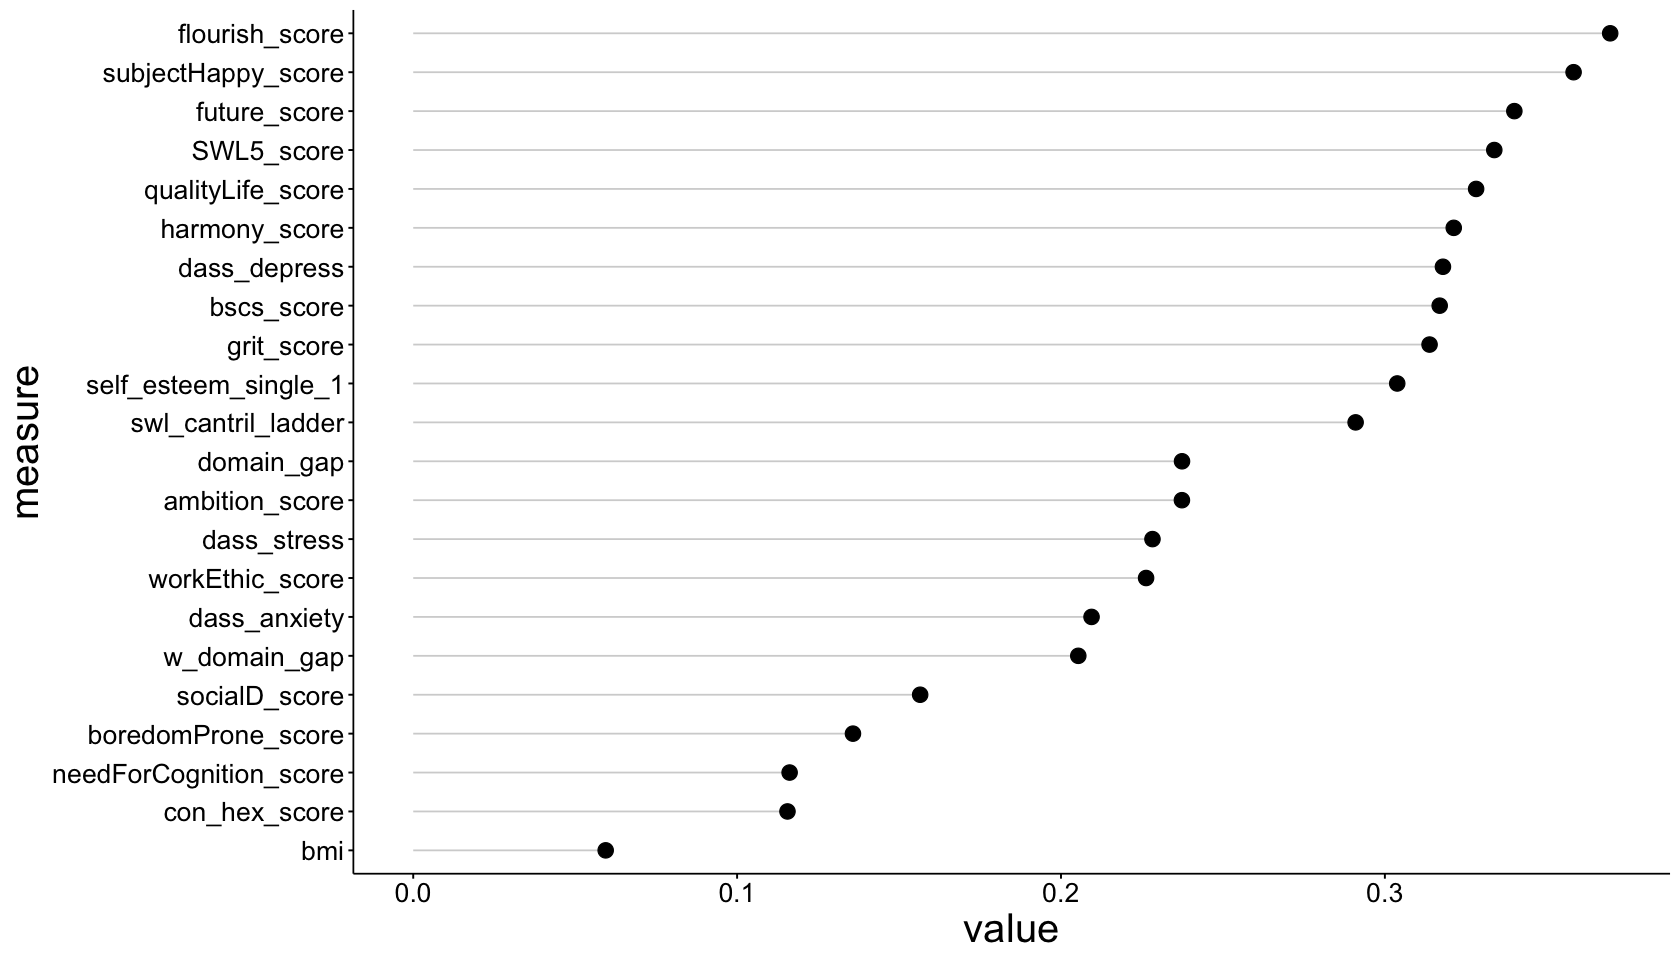

In [189]:
options(repr.plot.width = 14, repr.plot.height = 8)

ggdotchart(
  df_avg_r, x = "measure", y = "value", 
  palette = "jco",
  add = "segment", position = position_dodge(0.5),
  sorting = "descending", #facet.by = "Outcome",
  rotate = TRUE, #, legend = "none"
    dot.size = 4
  ) +

 font("xlab", size = 24) + 
 font("ylab", size = 24) + 
 font("xy.text", size = 16) +
 font("legend.title", size = 24, face='bold') + 
 font("legend.text", size = 20)

### Outcome comparison | avg R

Compare `w_domain_gap` and `domain_gap` on outcome measures

In [190]:
df_cor

ambition_score boredomProne_score bscs_score 
ambition_score          1.00000000     0.028458497        0.41591568
boredomProne_score      0.02845850     1.000000000       -0.20513775
bscs_score              0.41591568    -0.205137746        1.00000000
con_hex_score          -0.02919019     0.423486610       -0.21591727
dass_depress           -0.13152796     0.308312773       -0.42373177
dass_anxiety            0.02296375     0.276997195       -0.24213445
dass_stress             0.01535196     0.283825229       -0.29674705
flourish_score          0.50845304    -0.028702738        0.42981159
future_score            0.46416968    -0.052046673        0.35663045
grit_score              0.44981557    -0.290609273        0.64874263
harmony_score           0.23777001    -0.034447116        0.35227680
needForCognition_score  0.30559685     0.080812814        0.18585870
qualityLife_score       0.33473915    -0.179678028        0.54358240
swl_cantril_ladder      0.20100983    -0.071461468        0.34535193
SWL5_score              0.25117062    -0.075333165        0.32347619
workEthic_score         0.44449146     0.101444877        0.28691663
self_esteem_single_1    0.34254568     0.020617201        0.35635789
socialD_score           0.23815636     0.018056749        0.25377915
subjectHappy_score      0.29499745    -0.229638379        0.38052769
bmi                     0.03041018    -0.006346218        0.07556562
w_domain_gap           -0.19979628    -0.004011484       -0.21096939
domain_gap             -0.31677625     0.044757309       -0.30596381
                       con_hex_score dass_depress dass_anxiety dass_stress 
ambition_score         -0.029190194  -0.13152796   0.02296375   0.015351965
boredomProne_score      0.423486610   0.30831277   0.27699720   0.283825229
bscs_score             -0.215917268  -0.42373177  -0.24213445  -0.296747053
con_hex_score           1.000000000   0.18062593   0.23552627   0.332896765
dass_depress            0.180625933   1.00000000   0.62542497   0.678334750
dass_anxiety            0.235526272   0.62542497   1.00000000   0.778140867
dass_stress             0.332896765   0.67833475   0.77814087   1.000000000
flourish_score          0.056691690  -0.43941352  -0.12369735  -0.129173715
future_score            0.121875751  -0.39681534  -0.15700064  -0.150649240
grit_score             -0.153329316  -0.27709592  -0.21077249  -0.209305132
harmony_score           0.080686916  -0.36938562  -0.20558264  -0.262829242
needForCognition_score -0.115088146  -0.16514883  -0.00387671  -0.099179385
qualityLife_score      -0.024589514  -0.41335544  -0.15841165  -0.200006244
swl_cantril_ladder      0.043924588  -0.33256670  -0.17788420  -0.178338112
SWL5_score              0.134787532  -0.40329716  -0.19876497  -0.141544781
workEthic_score        -0.006961575  -0.13968859   0.03508815   0.056898681
self_esteem_single_1    0.019911757  -0.40842646  -0.30544419  -0.228012704
socialD_score          -0.071223768  -0.13306060  -0.05592140  -0.191697653
subjectHappy_score     -0.009220415  -0.50227667  -0.31334297  -0.323086256
bmi                    -0.055115051  -0.03009716  -0.06169901  -0.008910548
w_domain_gap           -0.036958168   0.17778875   0.14147723   0.157224597
domain_gap             -0.007339630   0.20459645   0.13018626   0.161496092
                       flourish_score future_score grit_score  ⋯
ambition_score          0.50845304     0.46416968   0.44981557 ⋯
boredomProne_score     -0.02870274    -0.05204667  -0.29060927 ⋯
bscs_score              0.42981159     0.35663045   0.64874263 ⋯
con_hex_score           0.05669169     0.12187575  -0.15332932 ⋯
dass_depress           -0.43941352    -0.39681534  -0.27709592 ⋯
dass_anxiety           -0.12369735    -0.15700064  -0.21077249 ⋯
dass_stress            -0.12917372    -0.15064924  -0.20930513 ⋯
flourish_score          1.00000000     0.73504590   0.44036153 ⋯
future_score            0.73504590     1.00000000   0.41203613 ⋯
grit_score              0.44036153    

In [175]:
x = names(sort(abs(df_cor[c(names(val_cols), 'domain_gap'),'flourish_score'])))
x

[1] "boredomProne_score"     "con_hex_score"          "dass_anxiety"          
 [4] "dass_stress"            "needForCognition_score" "workEthic_score"       
 [7] "bscs_score"             "dass_depress"           "grit_score"            
[10] "domain_gap"             "ambition_score"         "future_score"

In [182]:
match('domain_gap', names(sort(abs(df_cor[c(names(val_cols), 'domain_gap'),'flourish_score']), decreasing = TRUE)))

[1] 3

In [191]:
# outcome measures
df = as.data.frame(df_cor[c(8,11,13:15,17,19,20), 21:22])
df <- tibble::rownames_to_column(df, "Outcome")

In [192]:
df

Outcome              w_domain_gap domain_gap 
1 flourish_score       -0.37708125  -0.46594414
2 harmony_score        -0.38437587  -0.36405995
3 qualityLife_score    -0.48059324  -0.53848708
4 swl_cantril_ladder   -0.27306360  -0.24823653
5 SWL5_score           -0.35075497  -0.31886622
6 self_esteem_single_1 -0.26033806  -0.24810175
7 subjectHappy_score   -0.27087309  -0.29189349
8 bmi                  -0.03475856  -0.03731455

In [198]:
df_cor[, c(8,11,13:15,17,19,20,21)]

flourish_score harmony_score qualityLife_score
ambition_score          0.50845304     0.23777001    0.33473915      
boredomProne_score     -0.02870274    -0.03444712   -0.17967803      
bscs_score              0.42981159     0.35227680    0.54358240      
con_hex_score           0.05669169     0.08068692   -0.02458951      
dass_depress           -0.43941352    -0.36938562   -0.41335544      
dass_anxiety           -0.12369735    -0.20558264   -0.15841165      
dass_stress            -0.12917372    -0.26282924   -0.20000624      
flourish_score          1.00000000     0.62988539    0.62315292      
future_score            0.73504590     0.45584284    0.52090314      
grit_score              0.44036153     0.34453699    0.44694182      
harmony_score           0.62988539     1.00000000    0.49304603      
needForCognition_score  0.18909015    -0.02009490    0.06023689      
qualityLife_score       0.62315292     0.49304603    1.00000000      
swl_cantril_ladder      0.53148647     0.55318387    0.43784580      
SWL5_score              0.63789138     0.73681942    0.55353108      
workEthic_score         0.42028107     0.27237730    0.41119749      
self_esteem_single_1    0.53106638     0.56613035    0.39942461      
socialD_score           0.22889746     0.17334521    0.16576949      
subjectHappy_score      0.64984744     0.59951431    0.53900533      
bmi                     0.05839996    -0.03756286   -0.05803776      
w_domain_gap           -0.37708125    -0.38437587   -0.48059324      
domain_gap             -0.46594414    -0.36405995   -0.53848708      
                       swl_cantril_ladder SWL5_score   self_esteem_single_1
ambition_score          0.201009826        0.251170619  0.34254568         
boredomProne_score     -0.071461468       -0.075333165  0.02061720         
bscs_score              0.345351928        0.323476193  0.35635789         
con_hex_score           0.043924588        0.134787532  0.01991176         
dass_depress           -0.332566701       -0.403297163 -0.40842646         
dass_anxiety           -0.177884204       -0.198764972 -0.30544419         
dass_stress            -0.178338112       -0.141544781 -0.22801270         
flourish_score          0.531486468        0.637891375  0.53106638         
future_score            0.442130307        0.569454183  0.38501496         
grit_score              0.333041220        0.337262591  0.35815040         
harmony_score           0.553183867        0.736819416  0.56613035         
needForCognition_score  0.031003532        0.007751993  0.09350243         
qualityLife_score       0.437845801        0.553531084  0.39942461         
swl_cantril_ladder      1.000000000        0.702236332  0.54633254         
SWL5_score              0.702236332        1.000000000  0.59819426         
workEthic_score         0.250965031        0.255181925  0.22862174         
self_esteem_single_1    0.546332544        0.598194261  1.00000000         
socialD_score           0.079846927        0.075899915  0.06575293         
subjectHappy_score      0.553120007        0.622244309  0.57137774         
bmi                    -0.007607836       -0.050827714  0.05141359         
w_domain_gap           -0.273063599       -0.350754968 -0.26033806         
domain_gap             -0.248236531       -0.318866223 -0.24810175         
                       subjectHappy_score bmi          w_domain_gap
ambition_score          0.294997448        0.030410176 -0.199796279
boredomProne_score     -0.229638379       -0.006346218 -0.004011484
bscs_score              0.380527685        0.075565616 -0.210969390
con_hex_score          -0.009220415       -0.055115051 -0.036958168
dass_depress           -0.502276667       -0.030097161  0.177788751
dass_anxiety           -0.313342966       -0.061699013  0.141477229
dass_stress            -0.323086256       -0.008910548  0.157224597
flourish_score          0.649847444        0.058399963 -0.377081254
future_score            0.542540269        0.22109231

In [193]:
# convert to long
df <- df %>%
  pivot_longer(
    cols = c(w_domain_gap, domain_gap),
    names_to = "Measure",
    values_to = "R"
  )
head(df)

Outcome           Measure      R         
1 flourish_score    w_domain_gap -0.3770813
2 flourish_score    domain_gap   -0.4659441
3 harmony_score     w_domain_gap -0.3843759
4 harmony_score     domain_gap   -0.3640600
5 qualityLife_score w_domain_gap -0.4805932
6 qualityLife_score domain_gap   -0.5384871

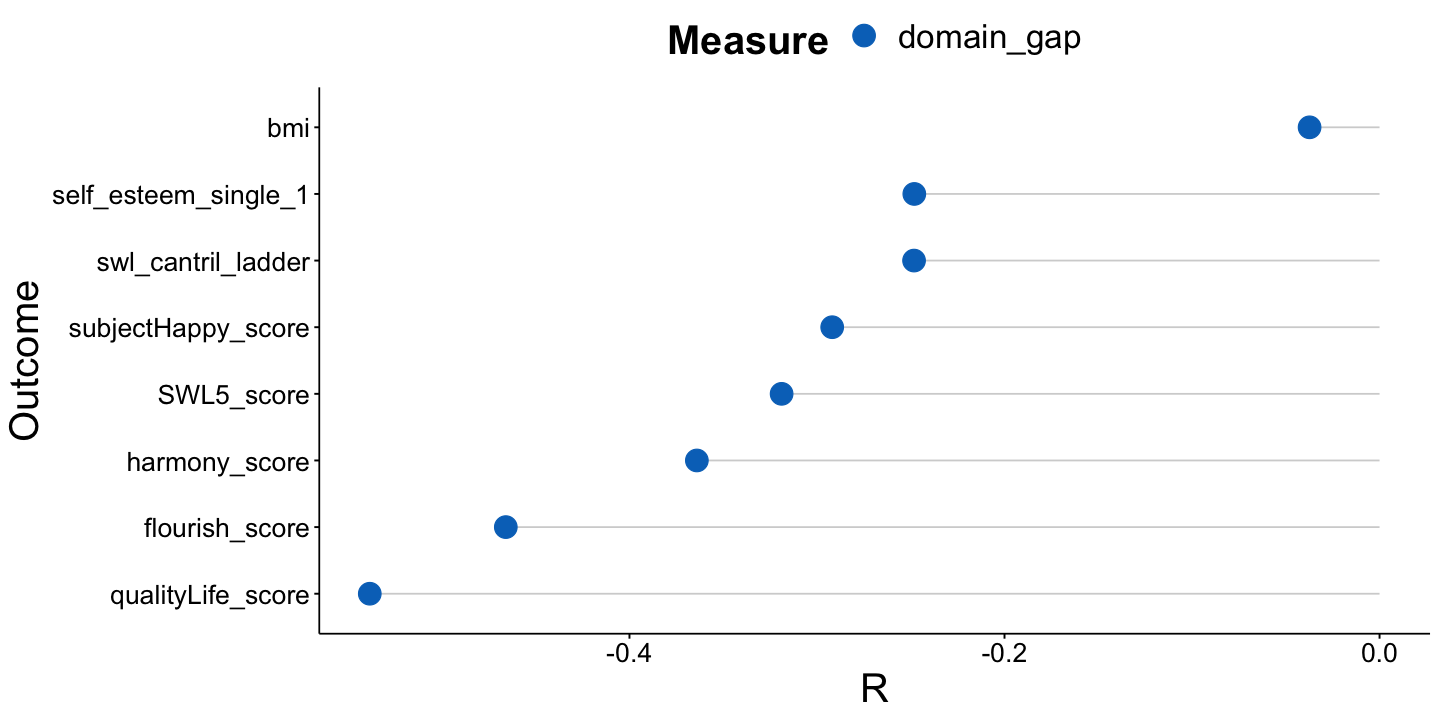

In [195]:
options(repr.plot.width = 12, repr.plot.height = 6)

ggdotchart(
  df[df$Measure=='domain_gap',], x = "Outcome", y = "R", 
  group = "Measure", color = "Measure", palette = "jco",
  add = "segment", position = position_dodge(0.5),
  sorting = "descending", #facet.by = "Outcome",
  rotate = TRUE, #, legend = "none"
    dot.size = 6
  ) +

 font("xlab", size = 24) + 
 font("ylab", size = 24) + 
 font("xy.text", size = 16) +
 font("legend.title", size = 24, face='bold') + 
 font("legend.text", size = 20)

### Validation comparison | avg R

Compare `w_domain_gap` and `domain_gap` on validation measures

In [34]:
df_cor

ambition_score boredomProne_score bscs_score 
ambition_score          1.00000000     0.028458497        0.41591568
boredomProne_score      0.02845850     1.000000000       -0.20513775
bscs_score              0.41591568    -0.205137746        1.00000000
con_hex_score          -0.02919019     0.423486610       -0.21591727
dass_depress           -0.13152796     0.308312773       -0.42373177
dass_anxiety            0.02296375     0.276997195       -0.24213445
dass_stress             0.01535196     0.283825229       -0.29674705
flourish_score          0.50845304    -0.028702738        0.42981159
future_score            0.46416968    -0.052046673        0.35663045
grit_score              0.44981557    -0.290609273        0.64874263
harmony_score           0.23777001    -0.034447116        0.35227680
needForCognition_score  0.30559685     0.080812814        0.18585870
qualityLife_score       0.33473915    -0.179678028        0.54358240
swl_cantril_ladder      0.20100983    -0.071461468        0.34535193
SWL5_score              0.25117062    -0.075333165        0.32347619
workEthic_score         0.44449146     0.101444877        0.28691663
self_esteem_single_1    0.34254568     0.020617201        0.35635789
socialD_score           0.23815636     0.018056749        0.25377915
subjectHappy_score      0.29499745    -0.229638379        0.38052769
bmi                     0.03041018    -0.006346218        0.07556562
w_domain_gap           -0.19979628    -0.004011484       -0.21096939
domain_gap             -0.31677625     0.044757309       -0.30596381
                       con_hex_score dass_depress dass_anxiety dass_stress 
ambition_score         -0.029190194  -0.13152796   0.02296375   0.015351965
boredomProne_score      0.423486610   0.30831277   0.27699720   0.283825229
bscs_score             -0.215917268  -0.42373177  -0.24213445  -0.296747053
con_hex_score           1.000000000   0.18062593   0.23552627   0.332896765
dass_depress            0.180625933   1.00000000   0.62542497   0.678334750
dass_anxiety            0.235526272   0.62542497   1.00000000   0.778140867
dass_stress             0.332896765   0.67833475   0.77814087   1.000000000
flourish_score          0.056691690  -0.43941352  -0.12369735  -0.129173715
future_score            0.121875751  -0.39681534  -0.15700064  -0.150649240
grit_score             -0.153329316  -0.27709592  -0.21077249  -0.209305132
harmony_score           0.080686916  -0.36938562  -0.20558264  -0.262829242
needForCognition_score -0.115088146  -0.16514883  -0.00387671  -0.099179385
qualityLife_score      -0.024589514  -0.41335544  -0.15841165  -0.200006244
swl_cantril_ladder      0.043924588  -0.33256670  -0.17788420  -0.178338112
SWL5_score              0.134787532  -0.40329716  -0.19876497  -0.141544781
workEthic_score        -0.006961575  -0.13968859   0.03508815   0.056898681
self_esteem_single_1    0.019911757  -0.40842646  -0.30544419  -0.228012704
socialD_score          -0.071223768  -0.13306060  -0.05592140  -0.191697653
subjectHappy_score     -0.009220415  -0.50227667  -0.31334297  -0.323086256
bmi                    -0.055115051  -0.03009716  -0.06169901  -0.008910548
w_domain_gap           -0.036958168   0.17778875   0.14147723   0.157224597
domain_gap             -0.007339630   0.20459645   0.13018626   0.161496092
                       flourish_score future_score grit_score  ⋯
ambition_score          0.50845304     0.46416968   0.44981557 ⋯
boredomProne_score     -0.02870274    -0.05204667  -0.29060927 ⋯
bscs_score              0.42981159     0.35663045   0.64874263 ⋯
con_hex_score           0.05669169     0.12187575  -0.15332932 ⋯
dass_depress           -0.43941352    -0.39681534  -0.27709592 ⋯
dass_anxiety           -0.12369735    -0.15700064  -0.21077249 ⋯
dass_stress            -0.12917372    -0.15064924  -0.20930513 ⋯
flourish_score          1.00000000     0.73504590   0.44036153 ⋯
future_score            0.73504590     1.00000000   0.41203613 ⋯
grit_score              0.44036153    

In [45]:
# validation measures
df = as.data.frame(df_cor[c(1:7,9,10,12,16), 21:22])
df <- tibble::rownames_to_column(df, "Validation")

In [46]:
# convert to long
df <- df %>%
  pivot_longer(
    cols = c(w_domain_gap, domain_gap),
    names_to = "Measure",
    values_to = "R"
  )
head(df)

Validation         Measure      R           
1 ambition_score     w_domain_gap -0.199796279
2 ambition_score     domain_gap   -0.316776246
3 boredomProne_score w_domain_gap -0.004011484
4 boredomProne_score domain_gap    0.044757309
5 bscs_score         w_domain_gap -0.210969390
6 bscs_score         domain_gap   -0.305963813

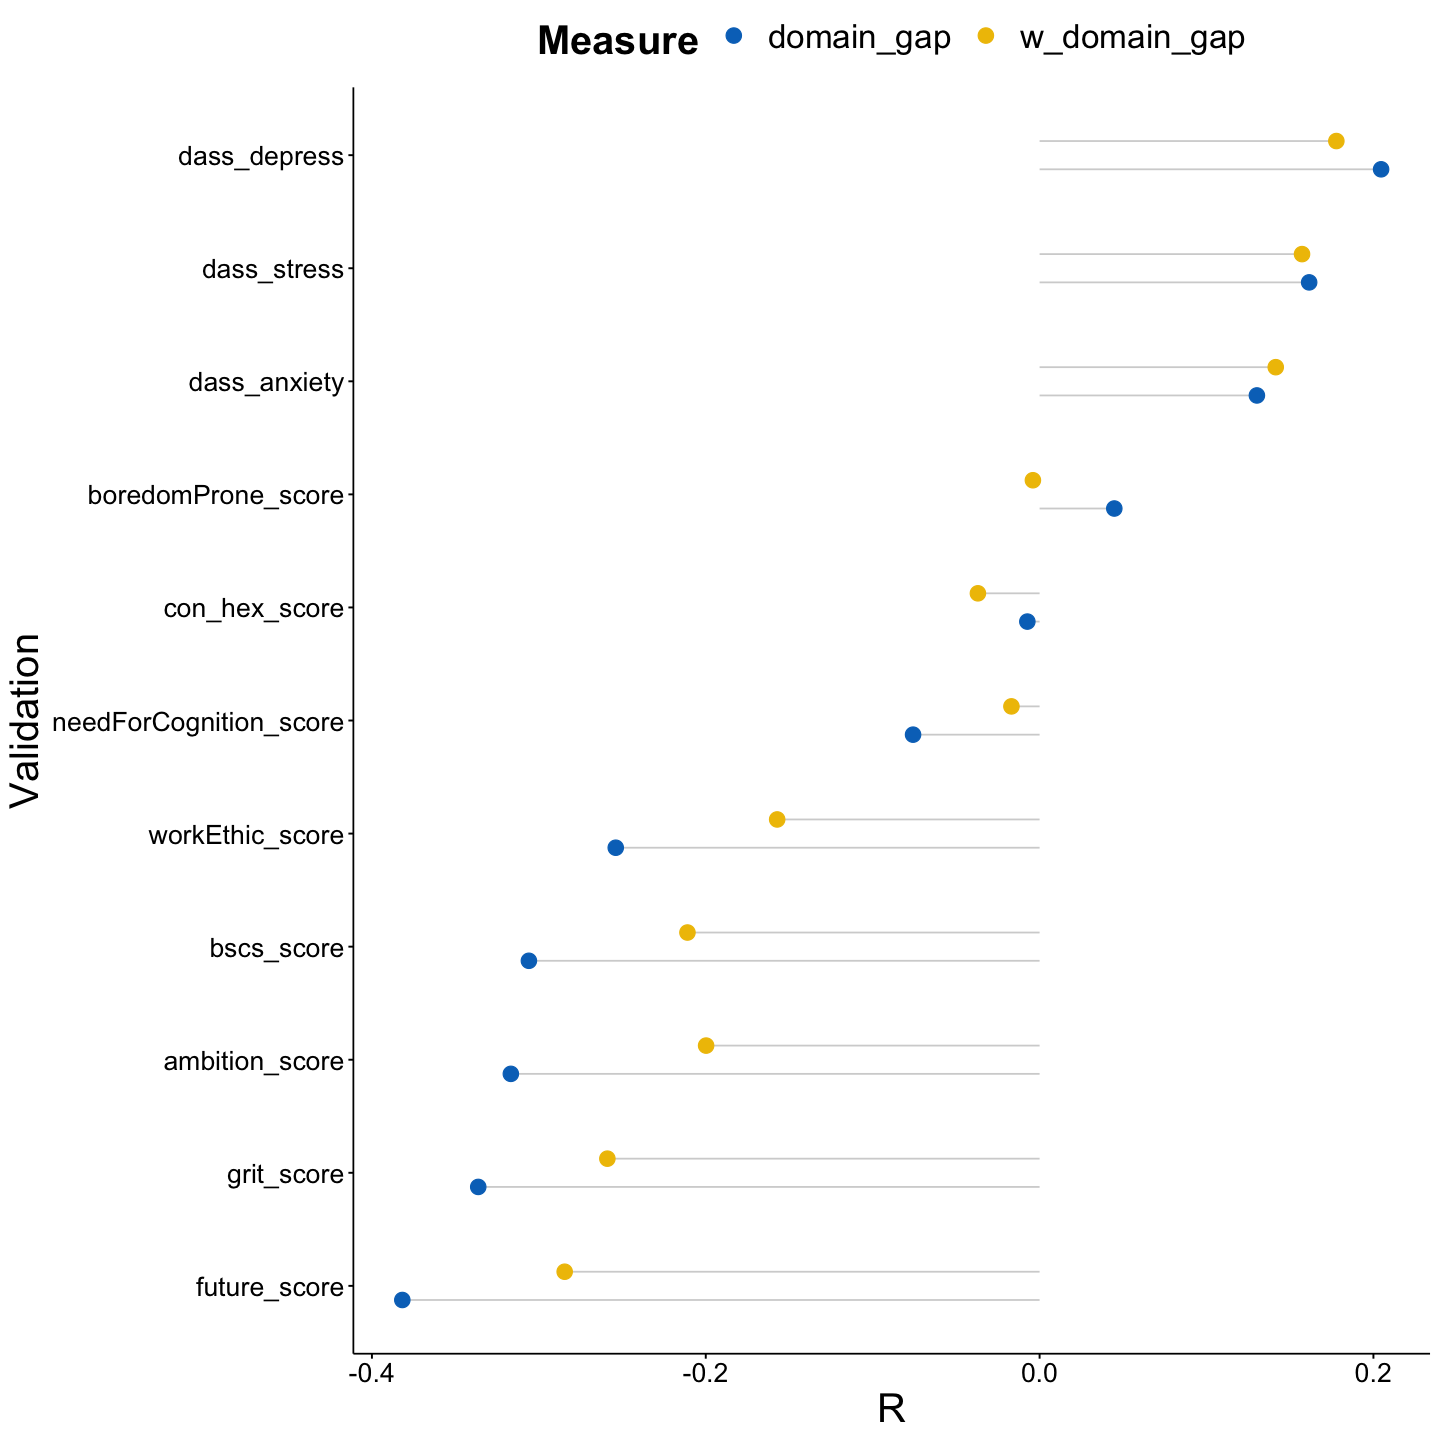

In [47]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggdotchart(
  df, x = "Validation", y = "R", 
  group = "Measure", color = "Measure", palette = "jco",
  add = "segment", position = position_dodge(0.5),
  sorting = "descending", #facet.by = "Outcome",
  rotate = TRUE, #, legend = "none"
    dot.size = 4
  ) +

 font("xlab", size = 24) + 
 font("ylab", size = 24) + 
 font("xy.text", size = 16) +
 font("legend.title", size = 24, face='bold') + 
 font("legend.text", size = 20)

## Outcome Prediction: Validation vs. Measure

In [51]:
library(caret) # or easy machine learning workflow
library(leaps) # for computing best subsets regression

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




### Data

Data used is the **mean** of the subjects domain gaps, and the validation measure scores

In [52]:
# validation measures of interest
val_m = c('ambition_score',
          'boredomProne_score',
          'bscs_score',
          'con_hex_score',
          'dass_depress',
          'dass_anxiety',
          'dass_stress',
          'flourish_score',
          'future_score',
          'grit_score',
          'harmony_score',
          'needForCognition_score',
          'qualityLife_score',
          'swl_cantril_ladder',
          'SWL5_score',
          'workEthic_score',
          'self_esteem_single_1',
          'subjectHappy_score'
          )

In [55]:
df = validation_measures %>%
    as_tibble() %>%
    select(subjectID, all_of(val_m))

# add bmi
df = merge(df, select(demographics, subjectID, bmi), by = 'subjectID')

# add domain gap
df = merge(df, select(ib_measures_df, subjectID, domain_gap), by = 'subjectID')

In [56]:
head(df,3)

subjectID ambition_score boredomProne_score bscs_score con_hex_score
1 1         3.0            5.500000           3.230769   NA           
2 2         2.2            4.142857           1.846154   NA           
3 3         3.4            4.321429           3.307692   NA           
  dass_depress dass_anxiety dass_stress flourish_score future_score ⋯
1 NA           NA           NA          NaN            3.9          ⋯
2 NA           NA           NA          NaN            2.3          ⋯
3 NA           NA           NA          NaN            5.2          ⋯
  harmony_score needForCognition_score qualityLife_score swl_cantril_ladder
1 NaN           2.944444               NaN               9                 
2 NaN           2.722222               NaN               5                 
3 NaN           3.222222               NaN               6                 
  SWL5_score workEthic_score self_esteem_single_1 subjectHappy_score domain_gap
1 NaN        4.4             6                    NaN                1.380000  
2 NaN        1.7             2                    NaN                2.700000  
3 NaN        4.0             2                    NaN                2.769231  
  bmi     
1 24.37878
2 21.02642
3 23.43164

### Computing best subsets regression

In [64]:
# subset validation measures (as opposed to outcome)
val_cols = df[, c(2:8,10,11,13,17)]

head(val_cols,2)

ambition_score boredomProne_score bscs_score con_hex_score dass_depress
1 3.0            5.500000           3.230769   NA            NA          
2 2.2            4.142857           1.846154   NA            NA          
  dass_anxiety dass_stress future_score grit_score needForCognition_score
1 NA           NA          3.9          3.00       2.944444              
2 NA           NA          2.3          2.25       2.722222              
  workEthic_score
1 4.4            
2 1.7

In [115]:
names(df)

[1] "subjectID"              "ambition_score"         "boredomProne_score"    
 [4] "bscs_score"             "con_hex_score"          "dass_depress"          
 [7] "dass_anxiety"           "dass_stress"            "flourish_score"        
[10] "future_score"           "grit_score"             "harmony_score"         
[13] "needForCognition_score" "qualityLife_score"      "swl_cantril_ladder"    
[16] "SWL5_score"             "workEthic_score"        "self_esteem_single_1"  
[19] "subjectHappy_score"     "domain_gap"             "bmi"

For ML Cross Valildation adding some helper functions from [this tutorial](http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/)

---

1. `get_model_formula()`, allowing to access easily the formula of the models returned by the function `regsubsets()`. 

In [95]:
# id: model id
# object: regsubsets object
# data: data used to fit regsubsets
# outcome: outcome variable
get_model_formula <- function(id, object, outcome){
  # get models data
  models <- summary(object)$which[id,-1]
  # Get outcome variable
  #form <- as.formula(object$call[[2]])
  #outcome <- all.vars(form)[1]
  # Get model predictors
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  # Build model formula
  as.formula(paste0(outcome, "~", predictors))
}

2. `get_cv_error()`, to get the cross-validation (CV) error for a given model:

In [143]:
# 10 fold cv
get_cv_error <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 10)
  cv <- train(model.formula, data = data, method = "lm",
              trControl = train.control)
  cv$results$RMSE
}

#### Flourishing

In [282]:
models <- regsubsets(flourish_score~.,
                     data = df[,c(names(val_cols), 'flourish_score', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(flourish_score ~ ., data = df[, c(names(val_cols), 
    "flourish_score", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "                "

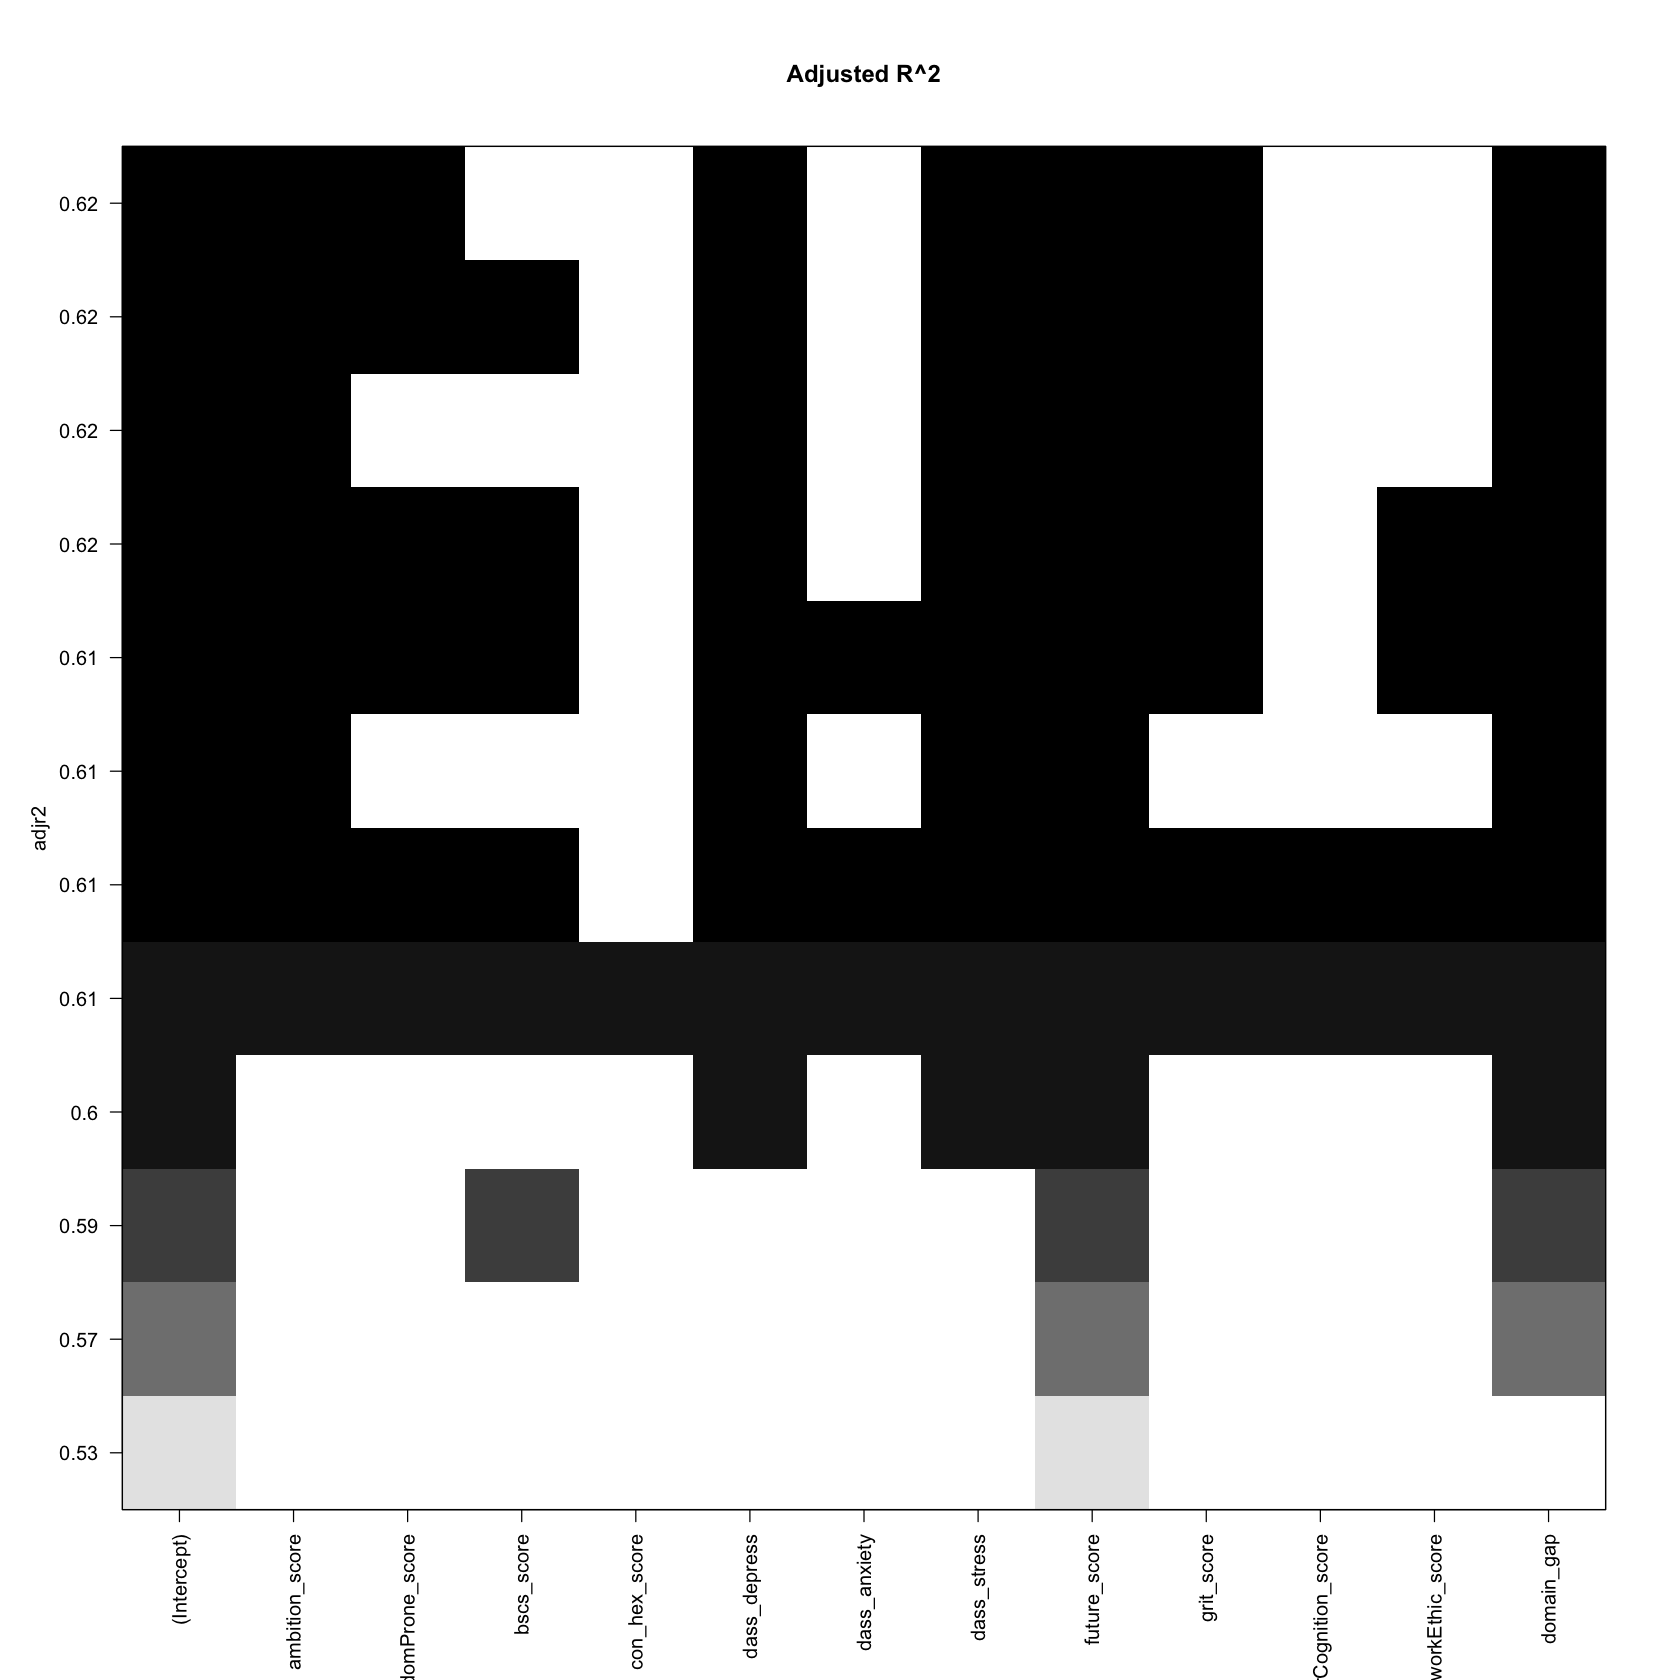

In [283]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [284]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 7      6  5

##### Cross Validation

[1] 0.7333516 0.7009051 0.6953806 0.6740025 0.6710604 0.6734923 0.6719313
 [8] 0.6847158 0.6918441 0.6950730 0.7103915 0.7189846

flourish_score ~ ambition_score + dass_depress + dass_stress + 
    future_score + domain_gap
<environment: 0x16568b690>

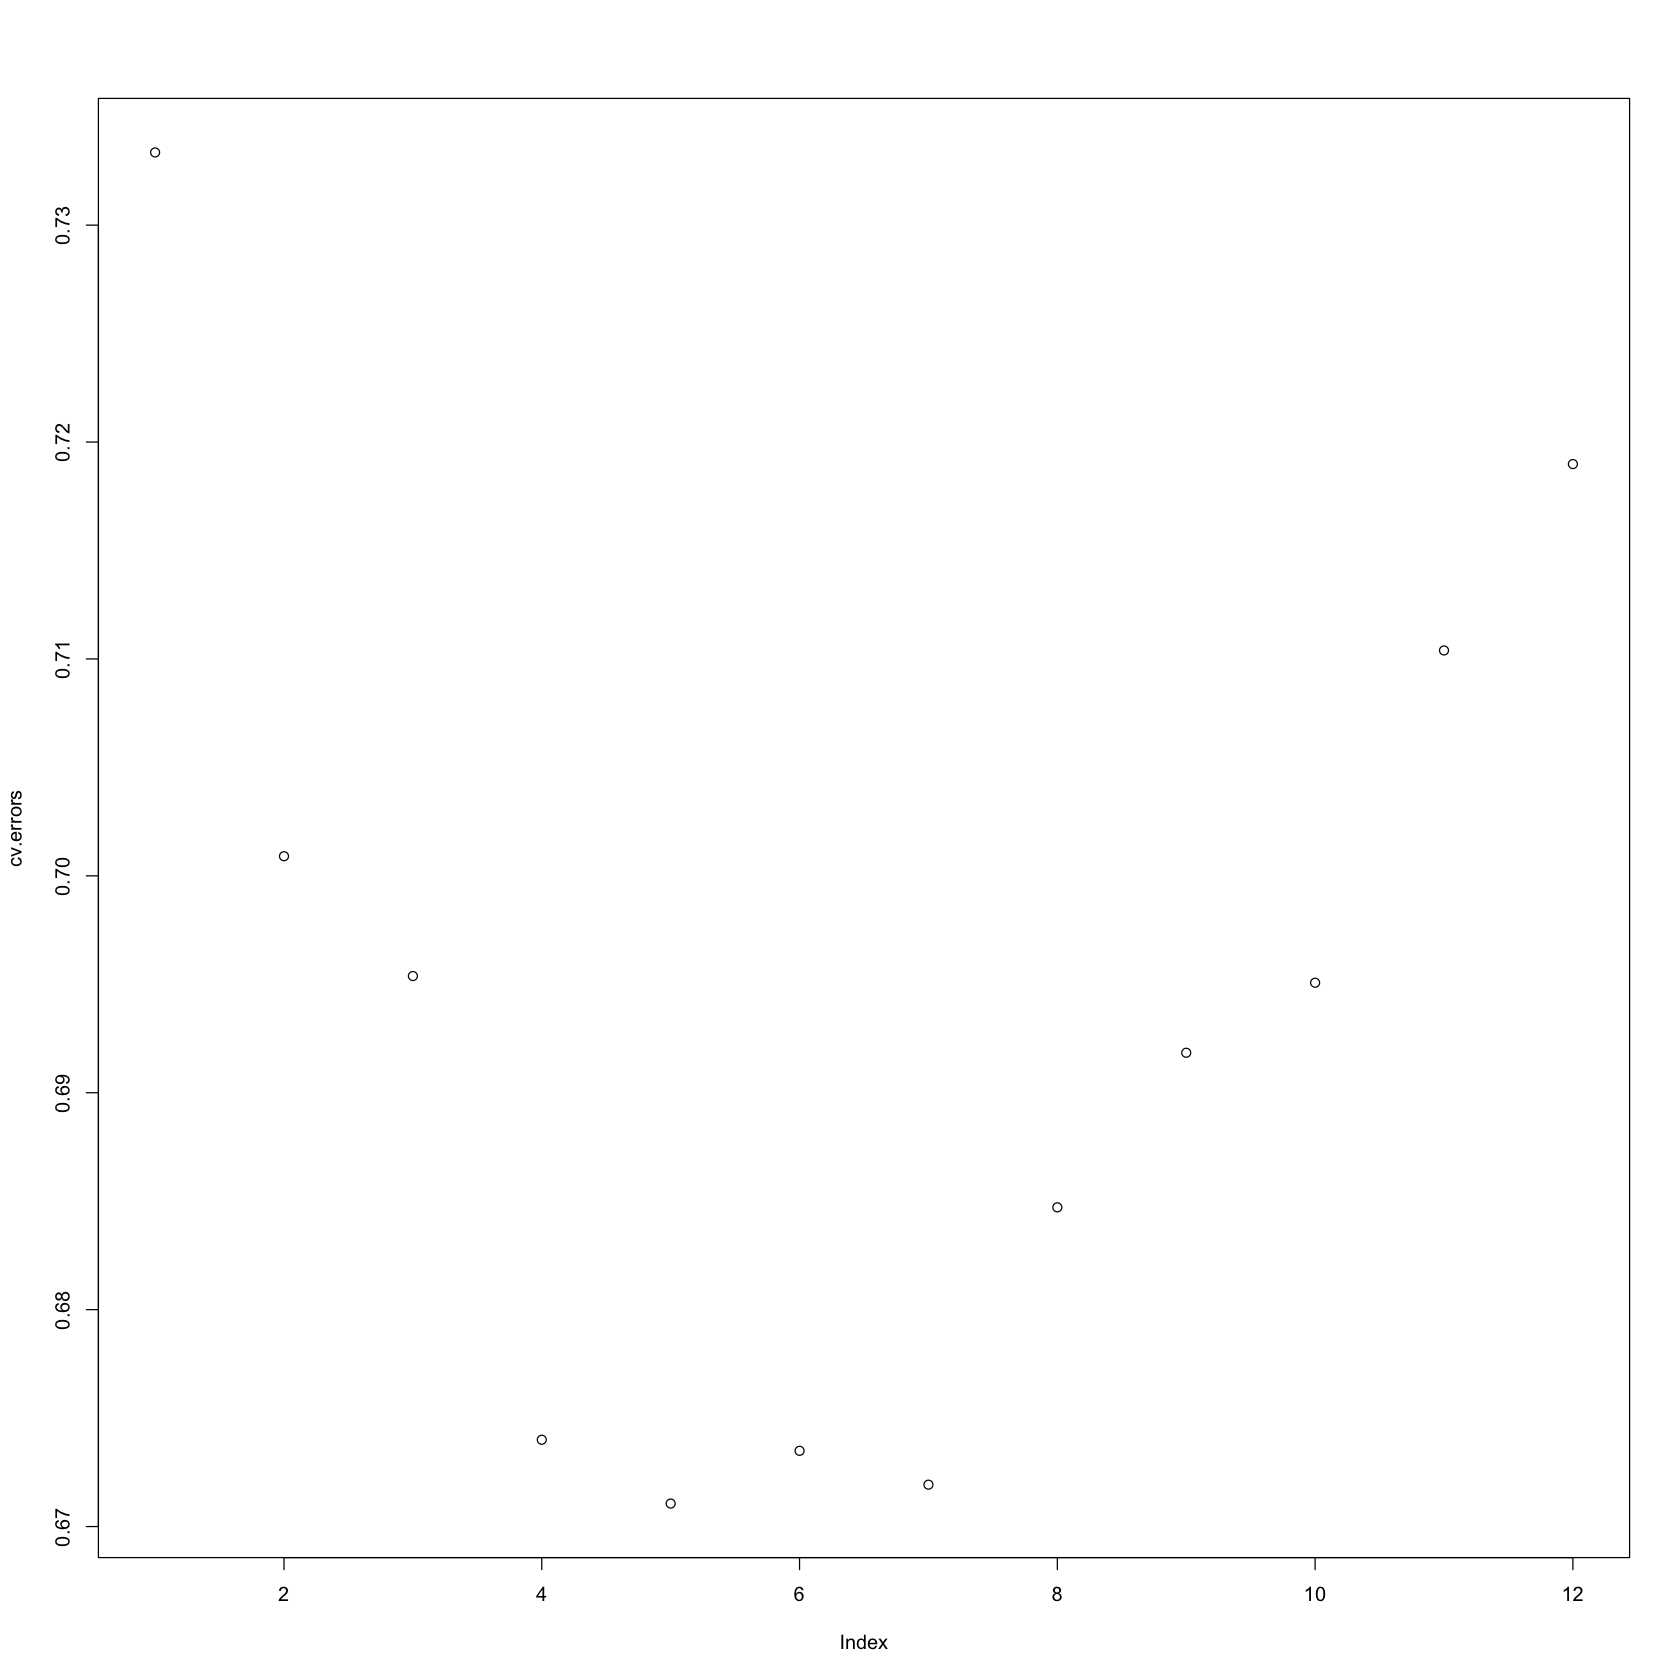

In [285]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "flourish_score") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "flourish_score") # best model

#### Harmony

In [123]:
models <- regsubsets(harmony_score~.,
                     data = df[,c(names(val_cols), 'harmony_score', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(harmony_score ~ ., data = df[, c(names(val_cols), 
    "harmony_score", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "                " "

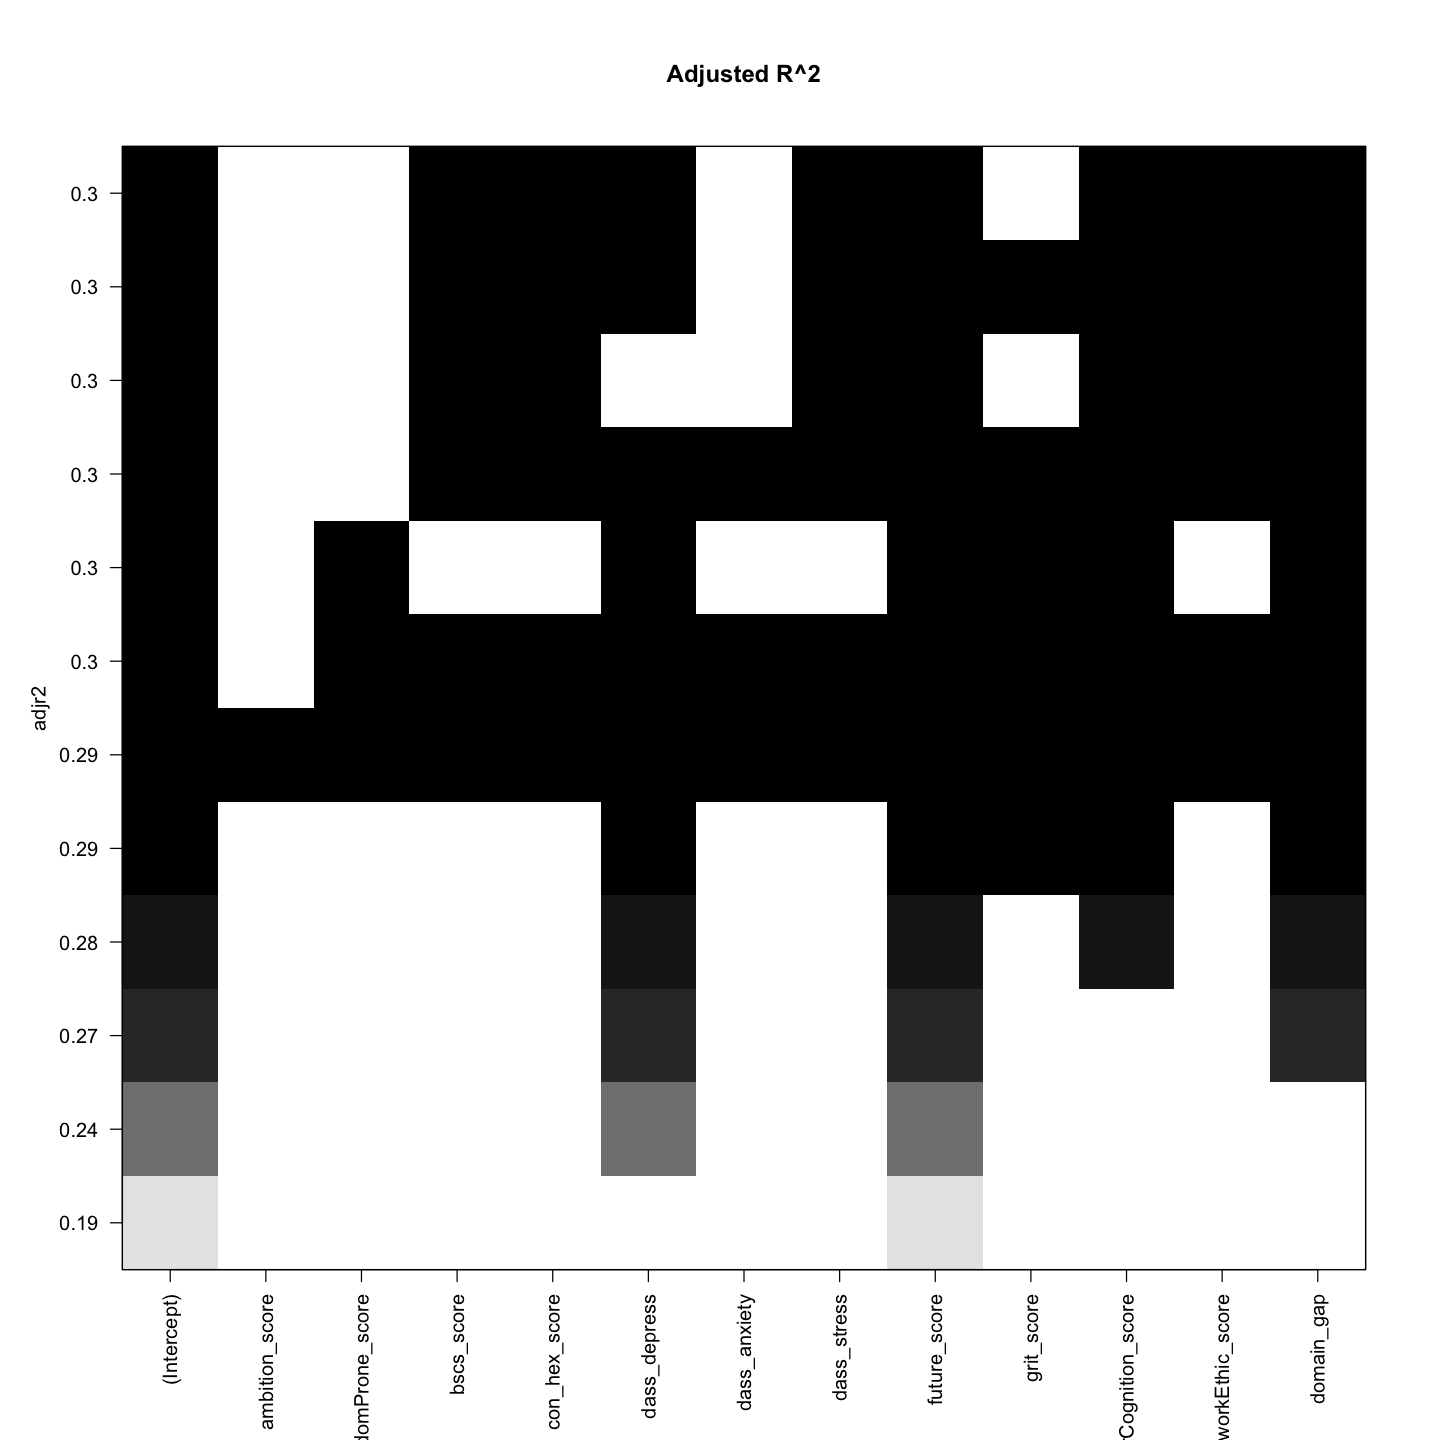

In [124]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [125]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 8      6  3

##### Cross Validation

[1] 1.135560 1.108228 1.084009 1.081891 1.080348 1.082280 1.095748 1.096471
 [9] 1.110132 1.110204 1.111800 1.126272

harmony_score ~ dass_depress + future_score + grit_score + needForCognition_score + 
    domain_gap
<environment: 0x163d47b98>

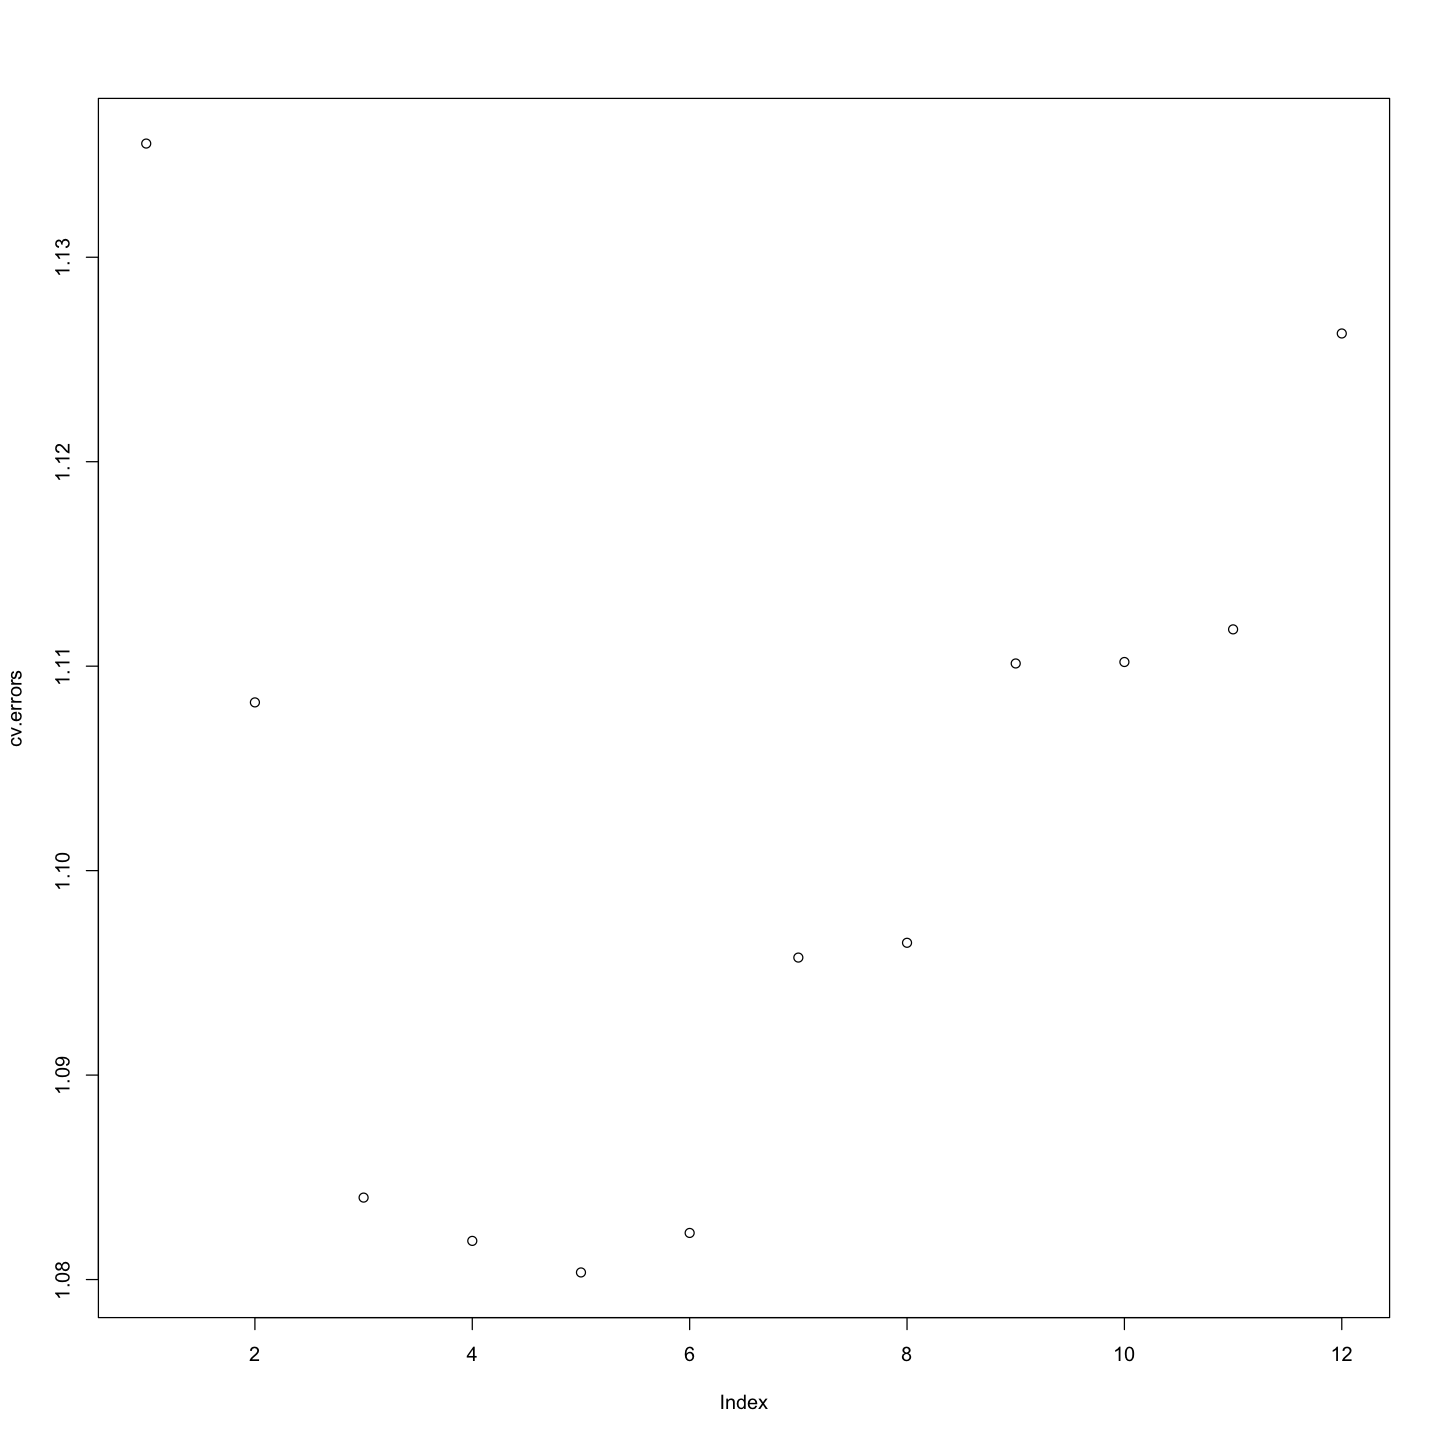

In [126]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "harmony_score") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "harmony_score") # best model

#### Quality of Life

In [127]:
models <- regsubsets(qualityLife_score~.,
                     data = df[,c(names(val_cols), 'qualityLife_score', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(qualityLife_score ~ ., data = df[, c(names(val_cols), 
    "qualityLife_score", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                "*"        " "          
2  ( 1 )  " "            " "           

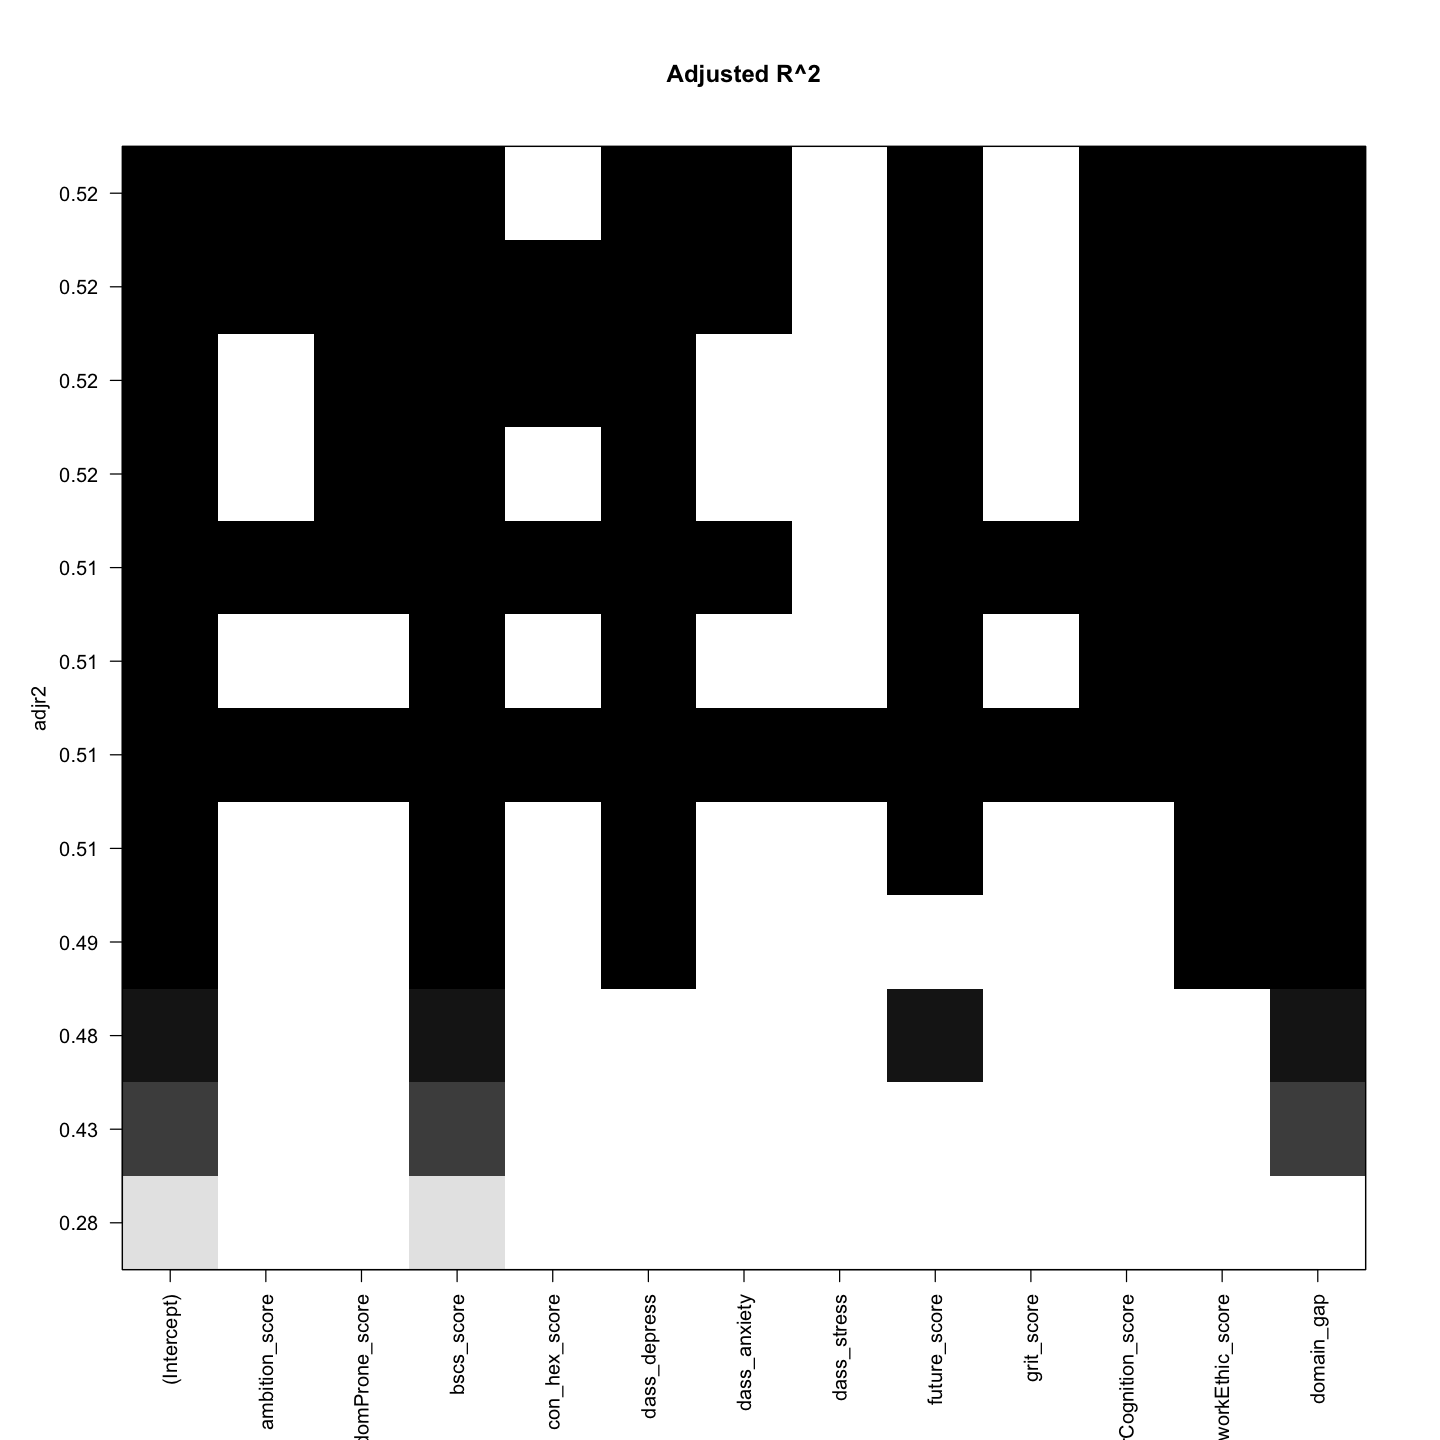

In [128]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [129]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 9      6  4

##### Cross Validation

[1] 0.7359806 0.6533955 0.6216666 0.6211406 0.6129057 0.6118163 0.6103210
 [8] 0.6107718 0.6214006 0.6237203 0.6336894 0.6416405

qualityLife_score ~ boredomProne_score + bscs_score + dass_depress + 
    future_score + needForCognition_score + workEthic_score + 
    domain_gap
<environment: 0x163d47b98>

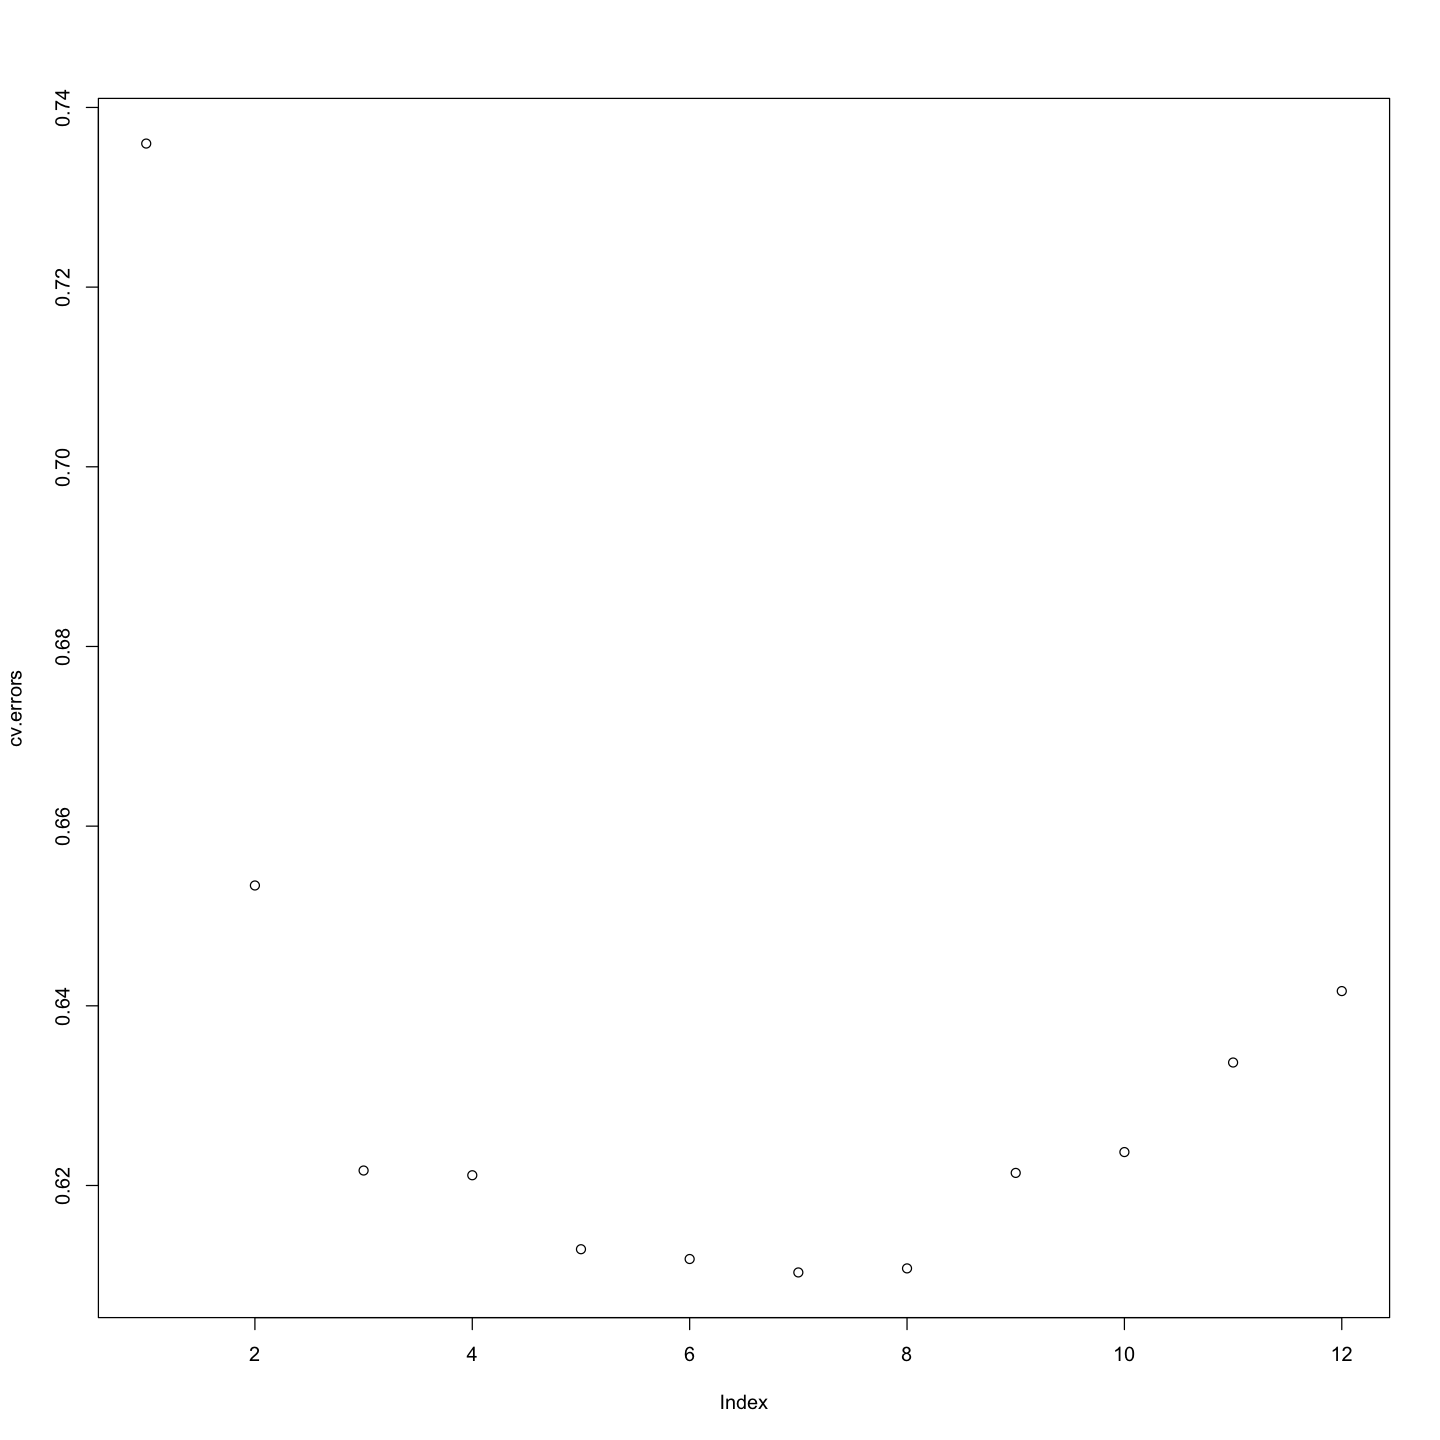

In [130]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "qualityLife_score") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "qualityLife_score") # best model

#### SWL5

In [131]:
models <- regsubsets(SWL5_score~.,
                     data = df[,c(names(val_cols), 'SWL5_score', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(SWL5_score ~ ., data = df[, c(names(val_cols), 
    "SWL5_score", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "                " "      

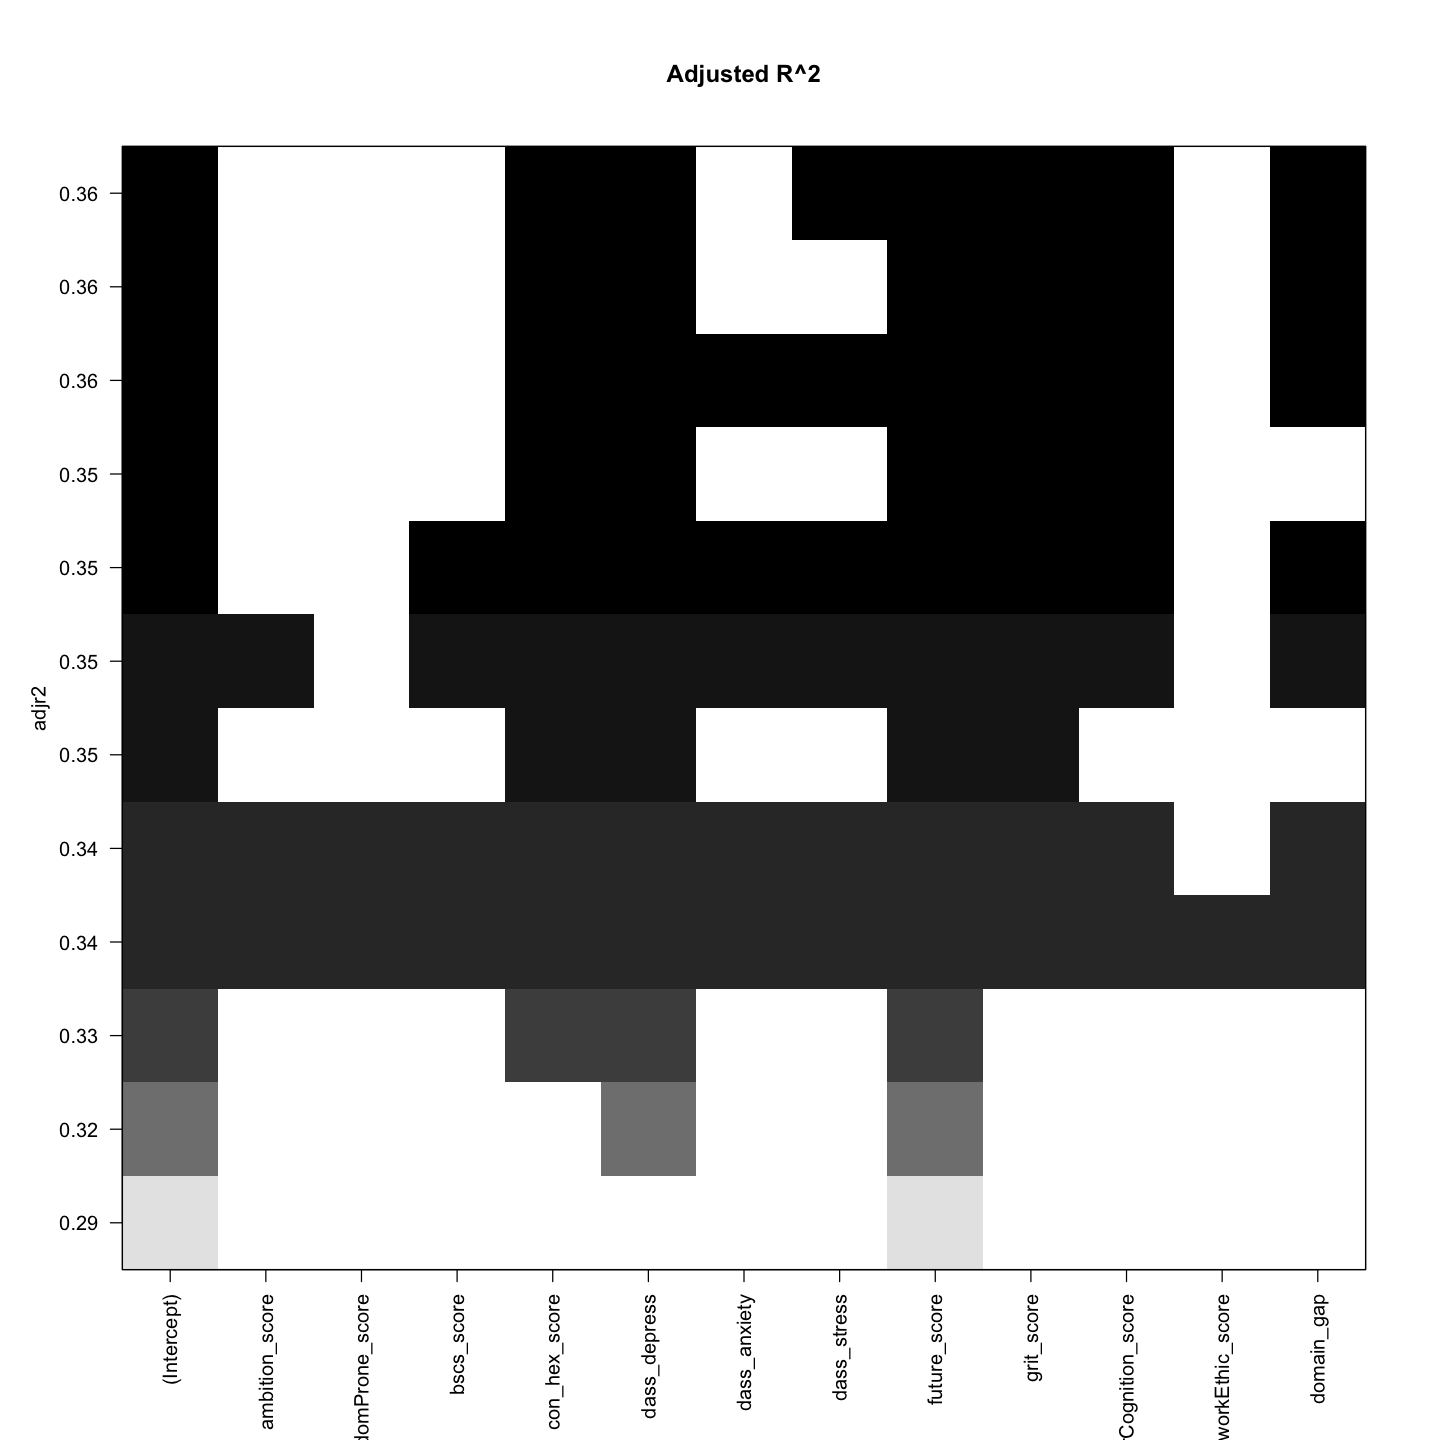

In [132]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [133]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 7      5  2

##### Cross Validation

[1] 1.141279 1.118362 1.114139 1.105244 1.099613 1.120465 1.124133 1.135578
 [9] 1.141810 1.159015 1.168073 1.174159

SWL5_score ~ con_hex_score + dass_depress + future_score + grit_score + 
    needForCognition_score
<environment: 0x163d47b98>

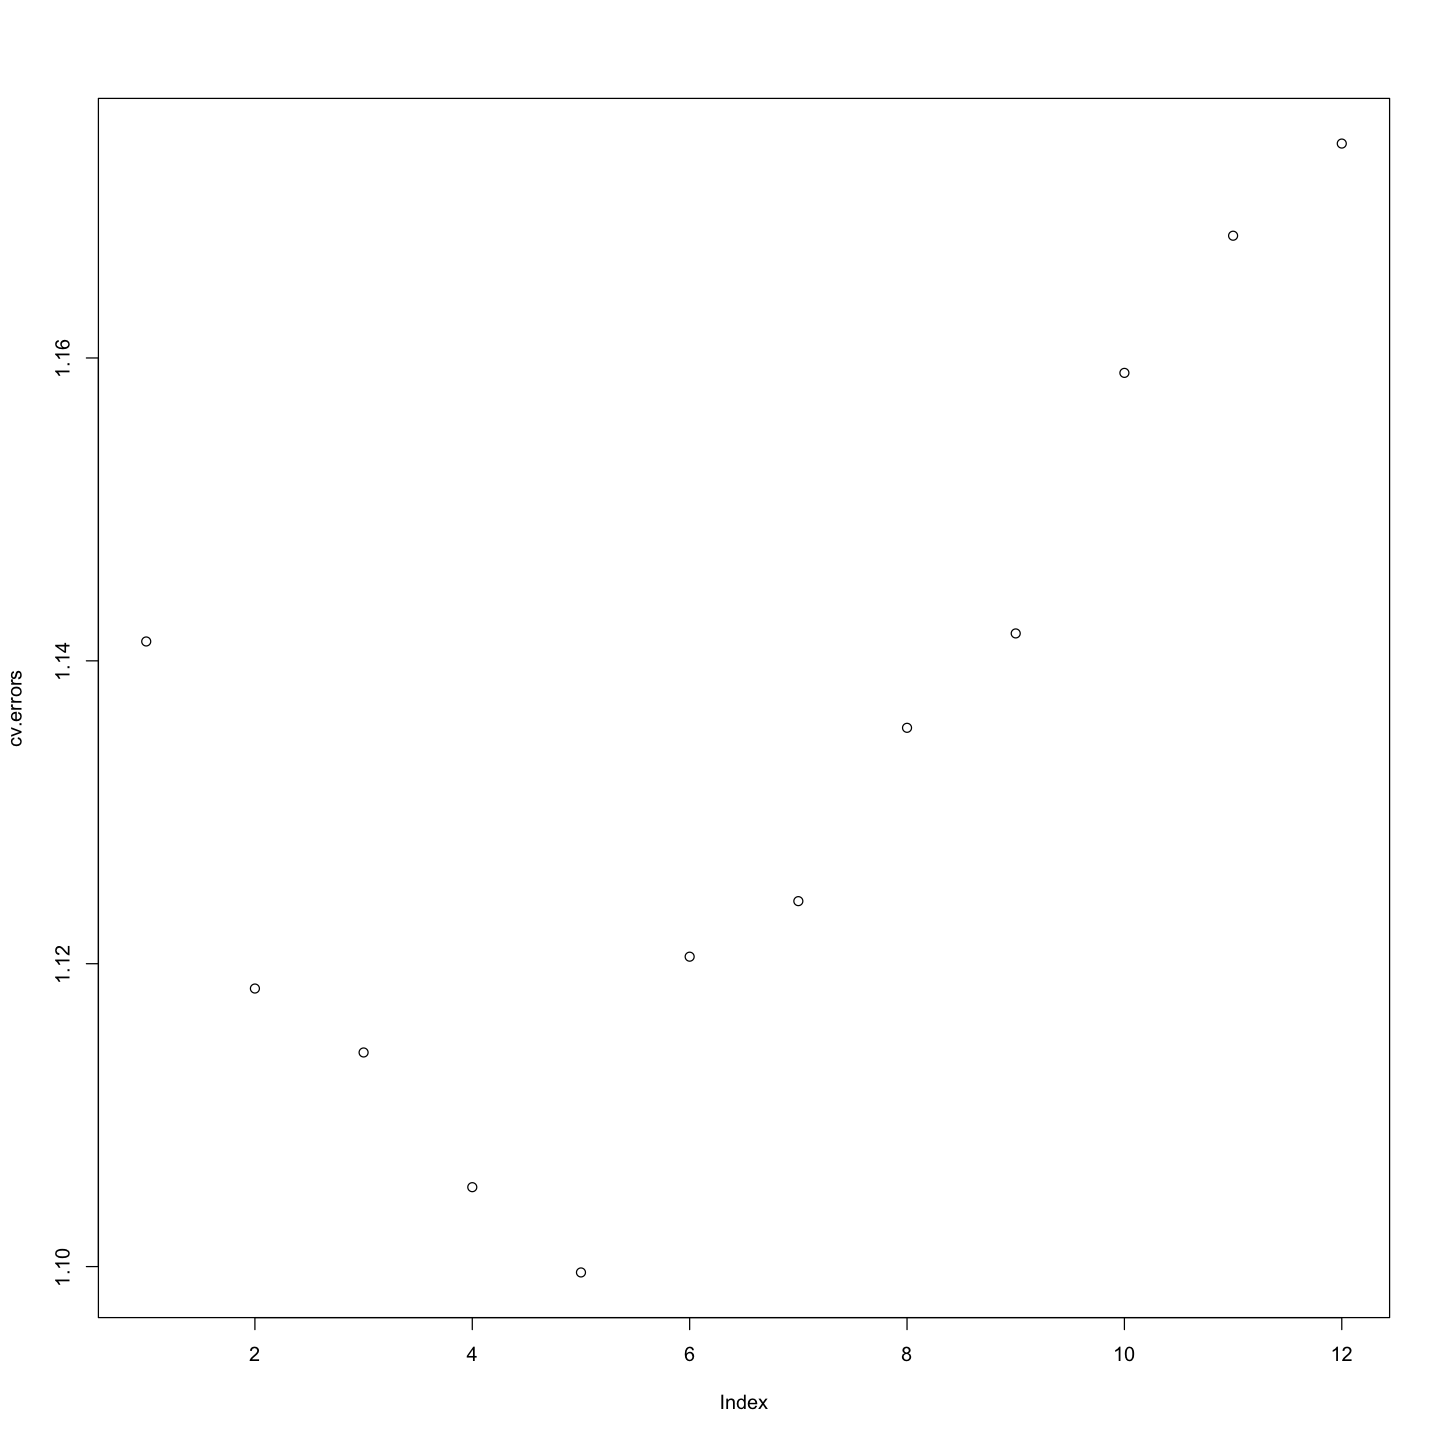

In [134]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "SWL5_score") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "SWL5_score") # best model

#### Subjective Happiness

In [116]:
models <- regsubsets(subjectHappy_score~.,
                     data = df[,c(names(val_cols), 'subjectHappy_score', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(subjectHappy_score ~ ., data = df[, c(names(val_cols), 
    "subjectHappy_score", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "         

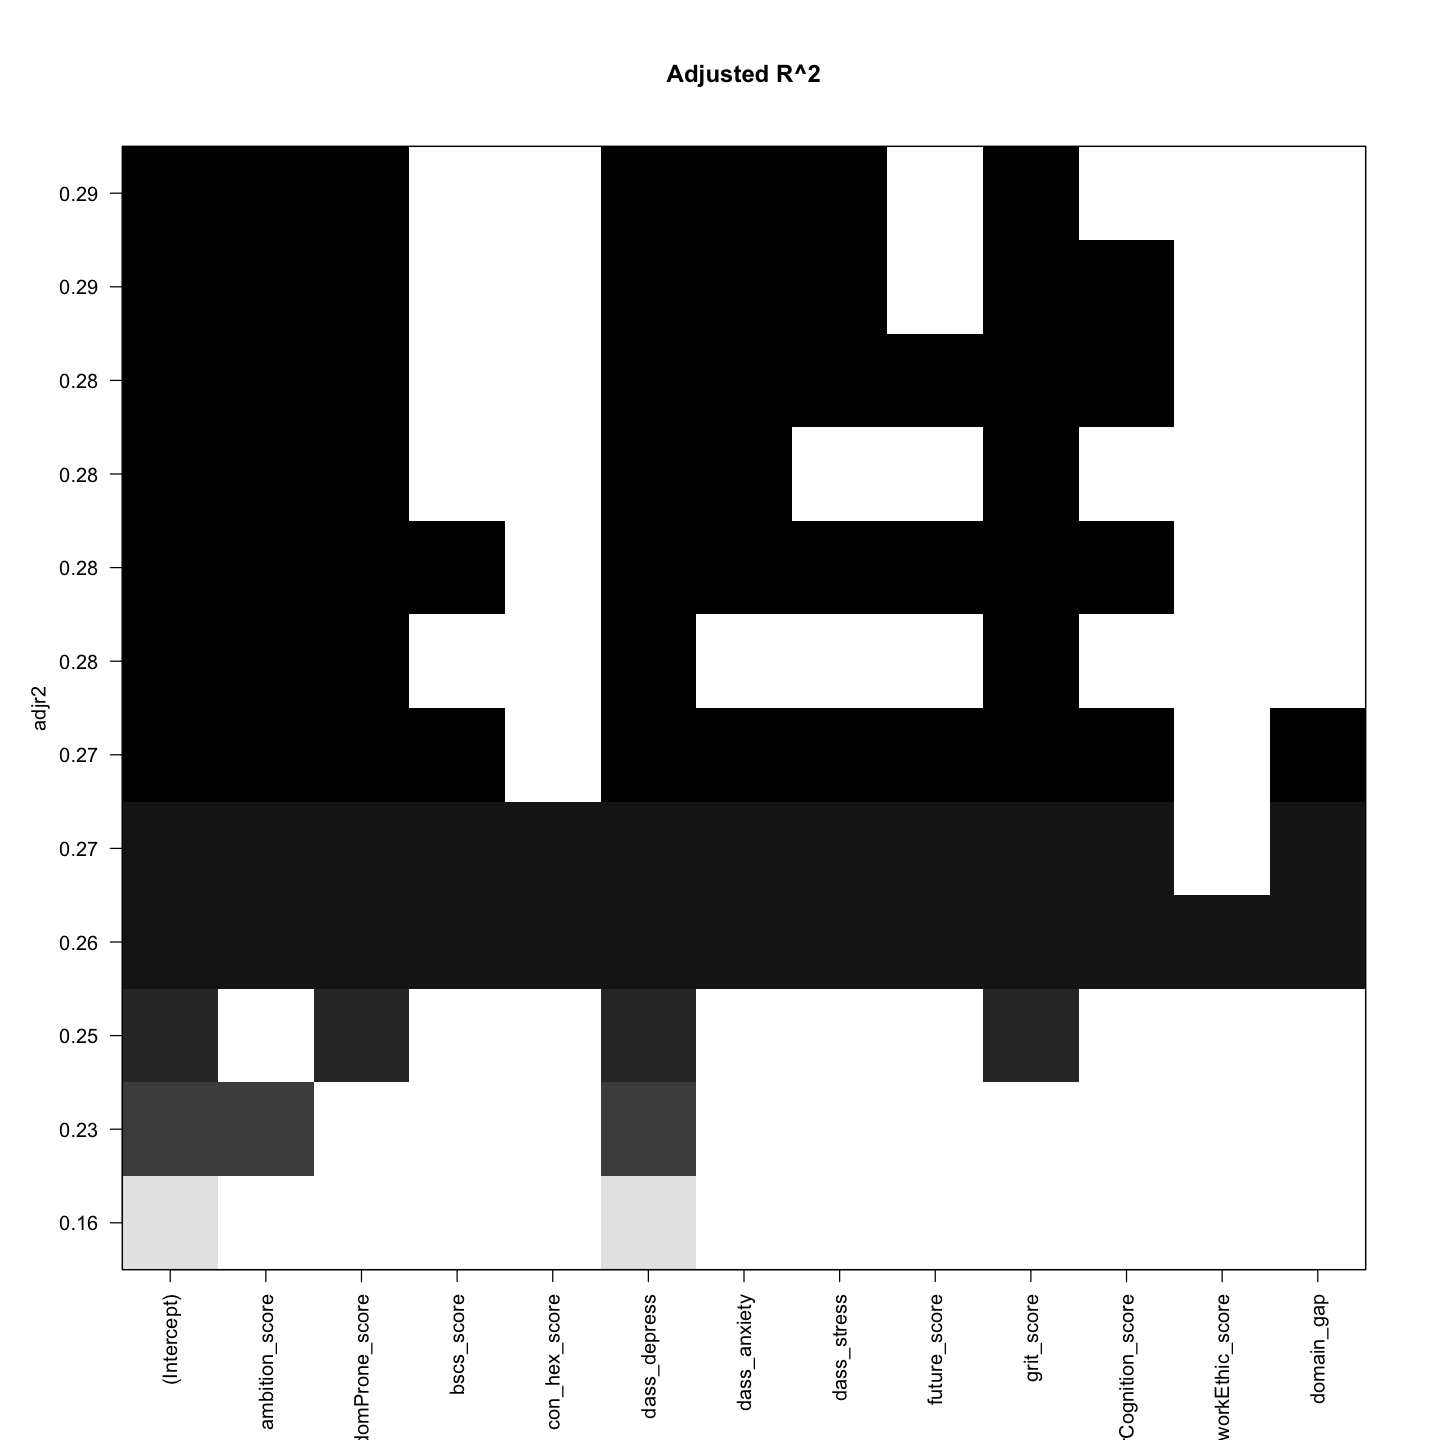

In [102]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [117]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 4      3  3

##### Cross Validation

[1] 1.198921 1.120787 1.099697 1.110926 1.124483 1.130989 1.137331 1.146151
 [9] 1.155692 1.157521 1.169350 1.187702

subjectHappy_score ~ dass_depress + future_score + grit_score
<environment: 0x163d47b98>

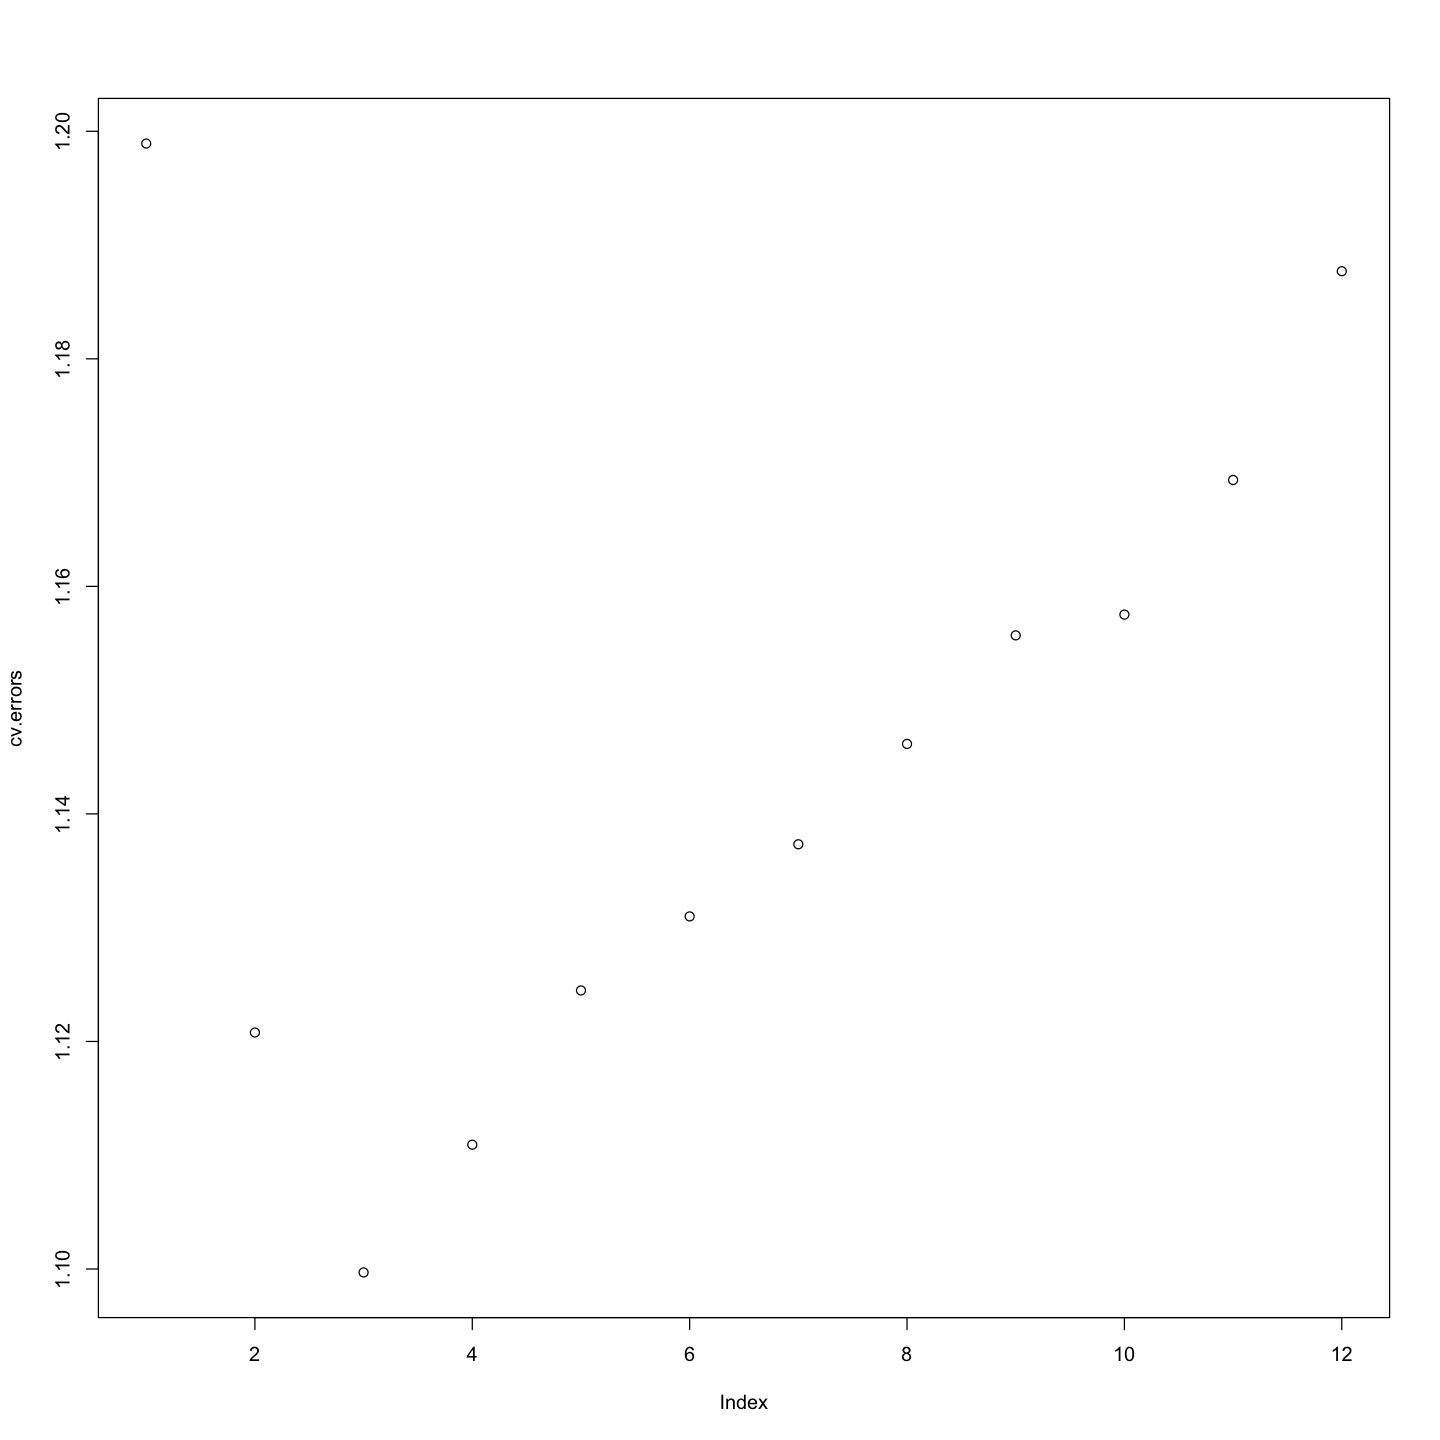

In [118]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "subjectHappy_score") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "subjectHappy_score") # best model

#### SWL

In [137]:
models <- regsubsets(swl_cantril_ladder~.,
                     data = df[,c(names(val_cols), 'swl_cantril_ladder', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(swl_cantril_ladder ~ ., data = df[, c(names(val_cols), 
    "swl_cantril_ladder", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "         

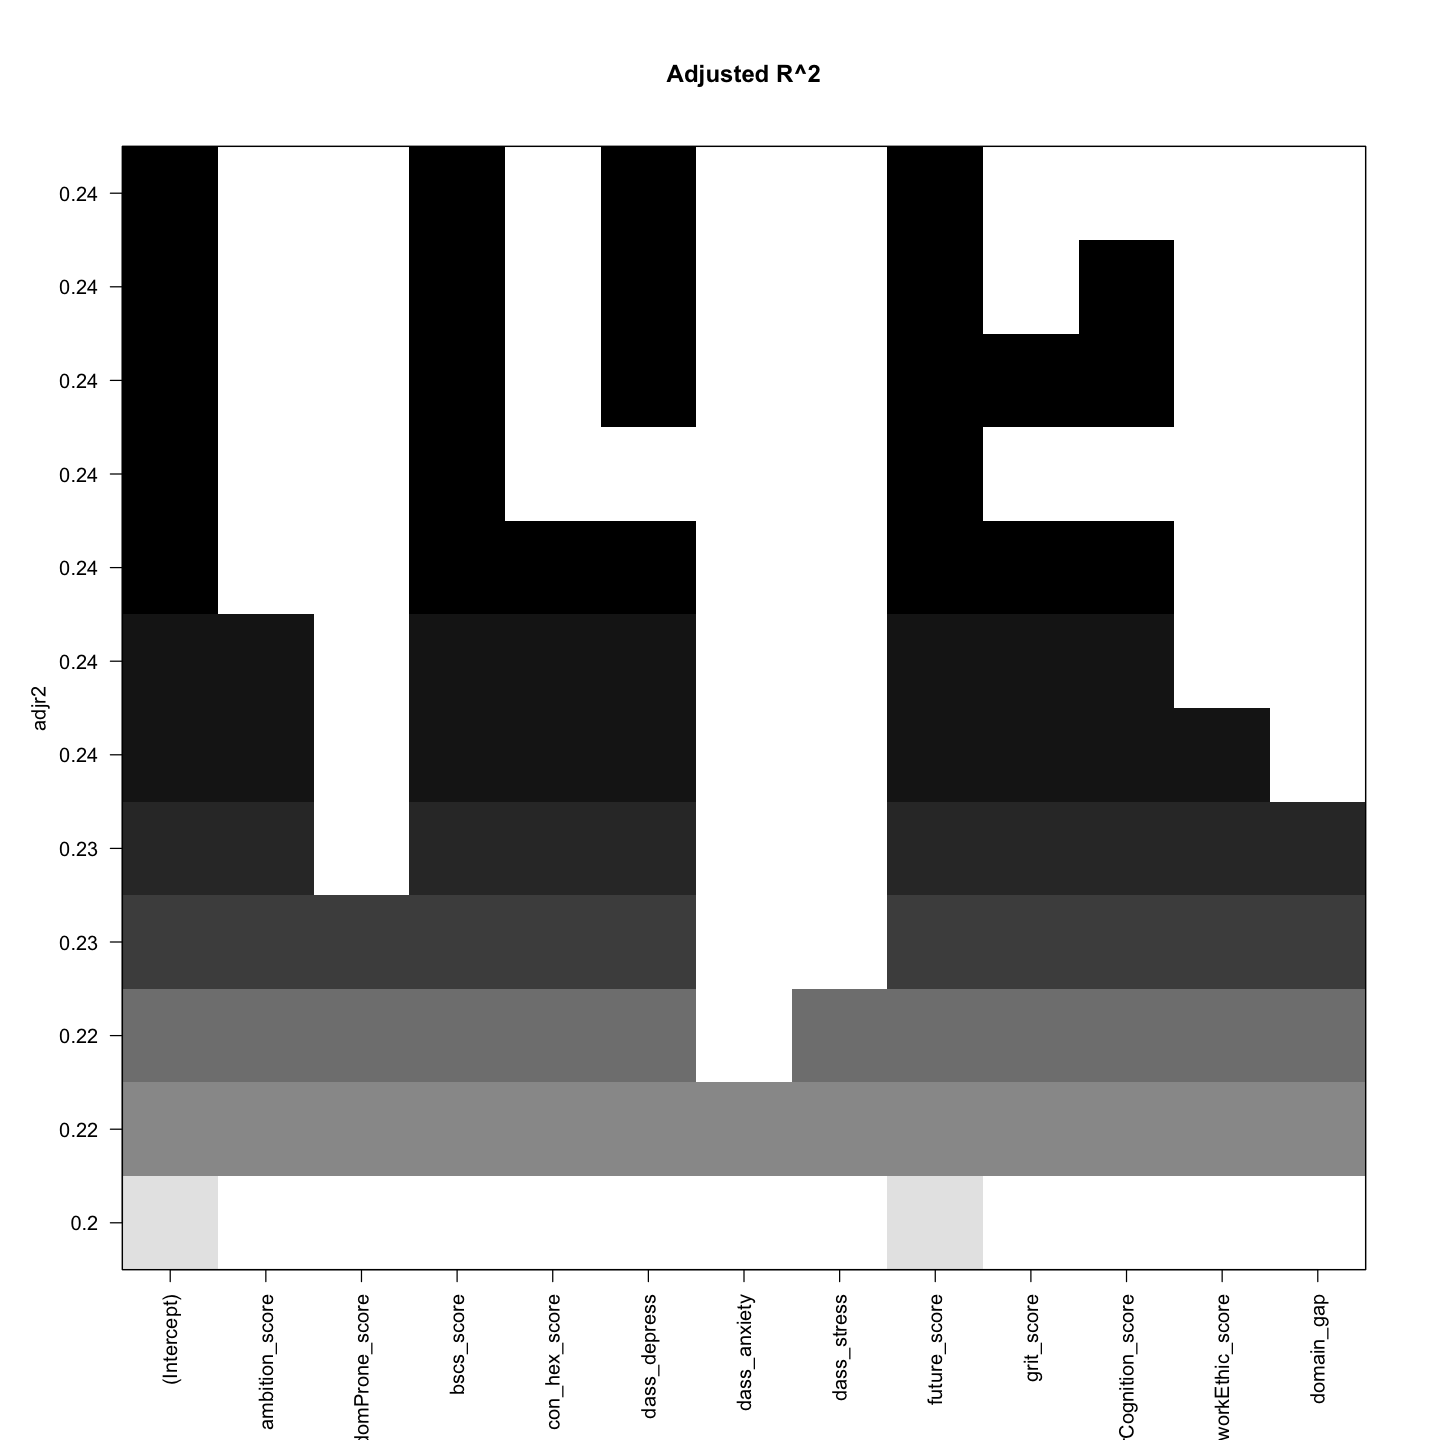

In [140]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [141]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 3      2  2

##### Cross Validation

[1] 1.649030 1.610467 1.620973 1.631830 1.654850 1.675743 1.678605 1.696052
 [9] 1.703823 1.719395 1.729739 1.757319

swl_cantril_ladder ~ bscs_score + future_score
<environment: 0x163d47b98>

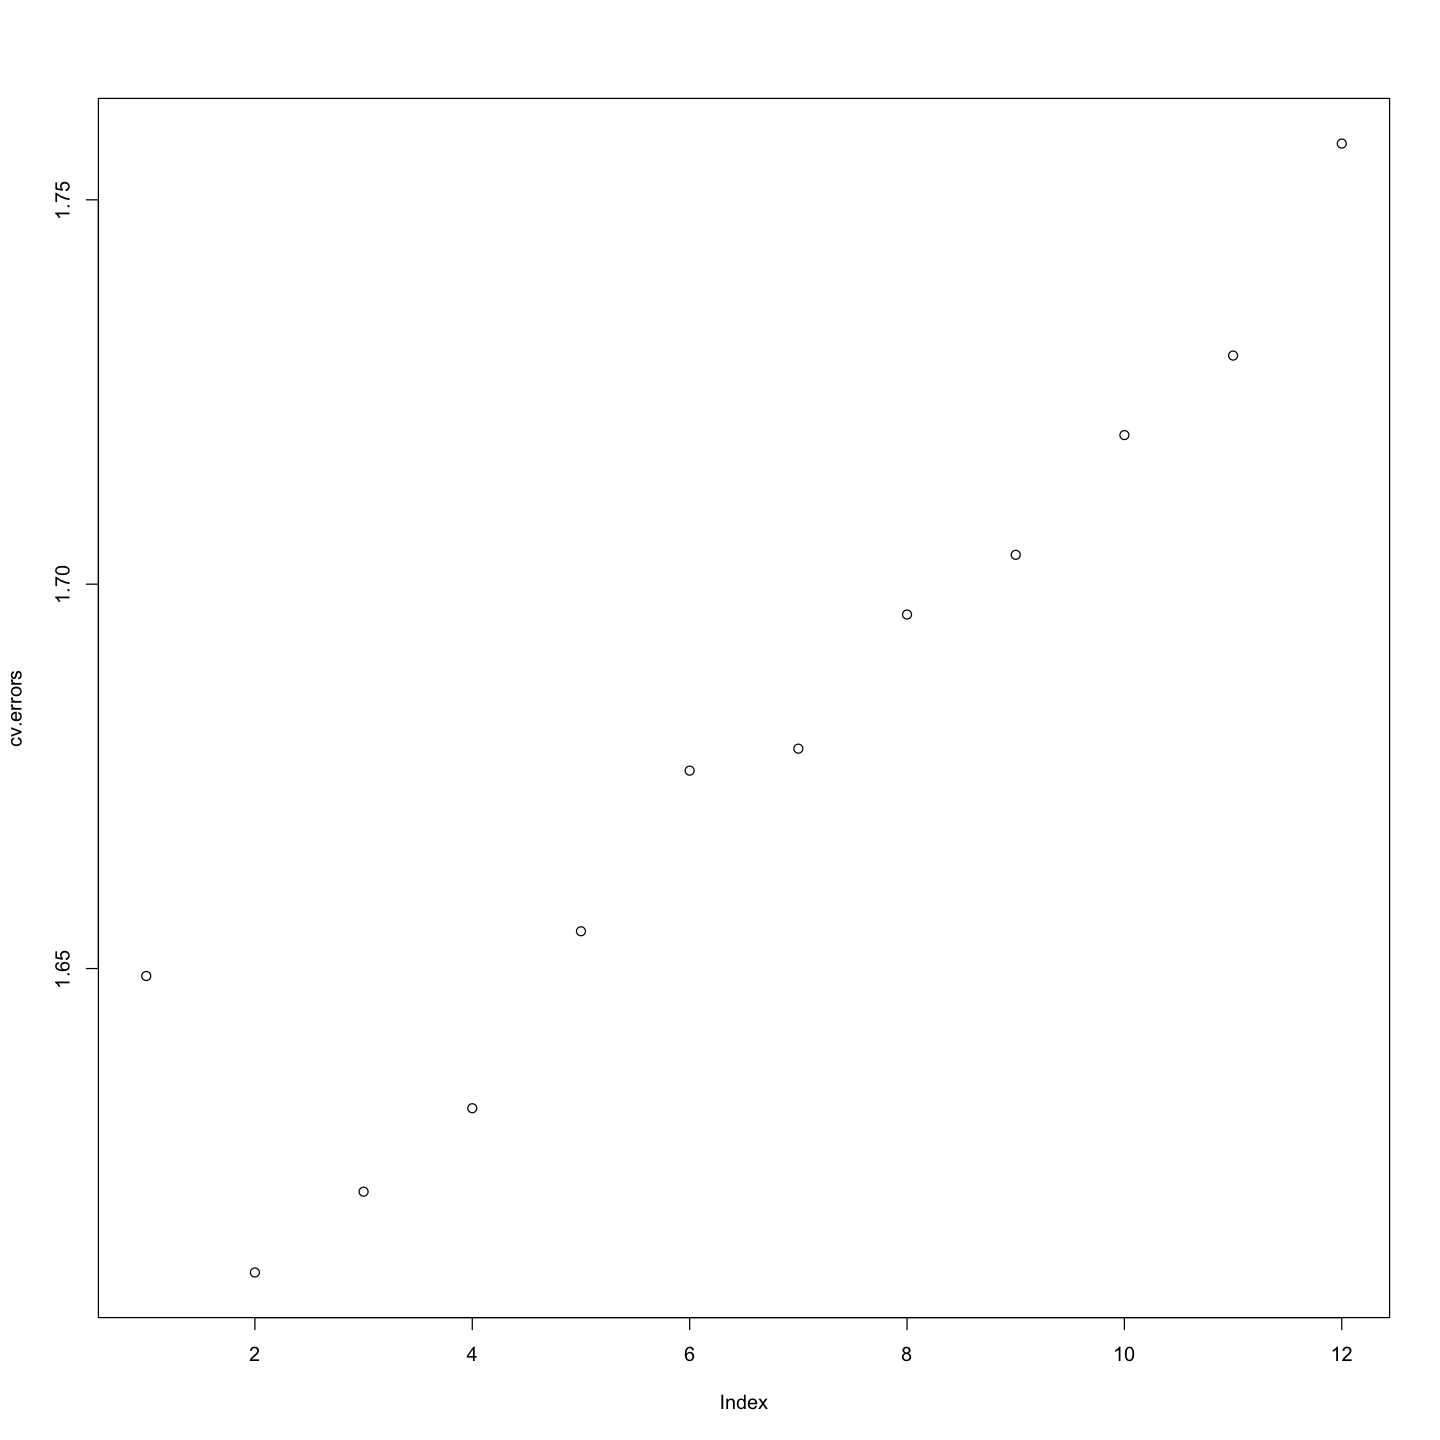

In [144]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "swl_cantril_ladder") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "swl_cantril_ladder") # best model

#### Self Esteem

In [101]:
models <- regsubsets(self_esteem_single_1~.,
                     data = df[,c(names(val_cols), 'self_esteem_single_1', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(self_esteem_single_1 ~ ., data = df[, c(names(val_cols), 
    "self_esteem_single_1", "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  "*"            " "     

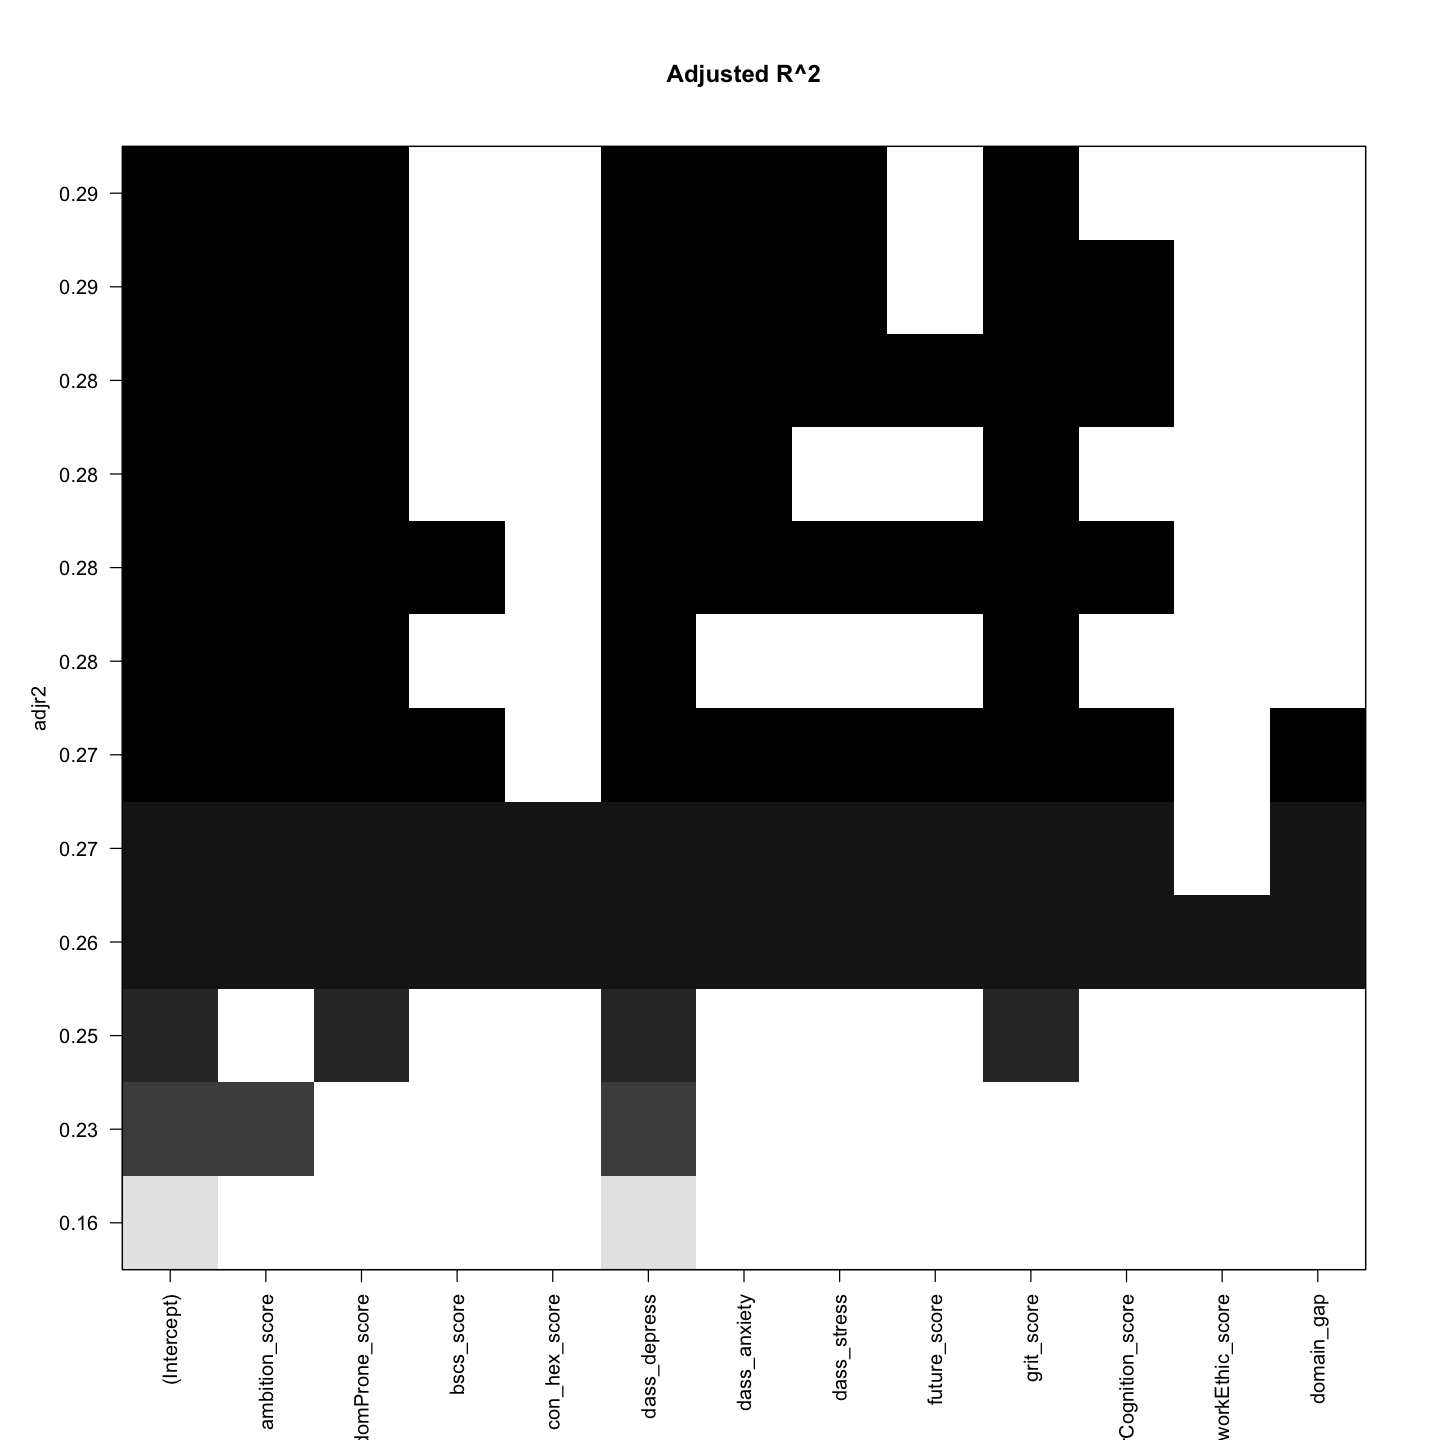

In [102]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [103]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 6      4  2

##### Cross Validation

[1] 1.513997 1.442286 1.445077 1.431074 1.436409 1.426084 1.451104 1.451843
 [9] 1.463534 1.473163 1.489356 1.504761

self_esteem_single_1 ~ ambition_score + boredomProne_score + 
    dass_depress + dass_anxiety + dass_stress + grit_score
<environment: 0x163d3fb98>

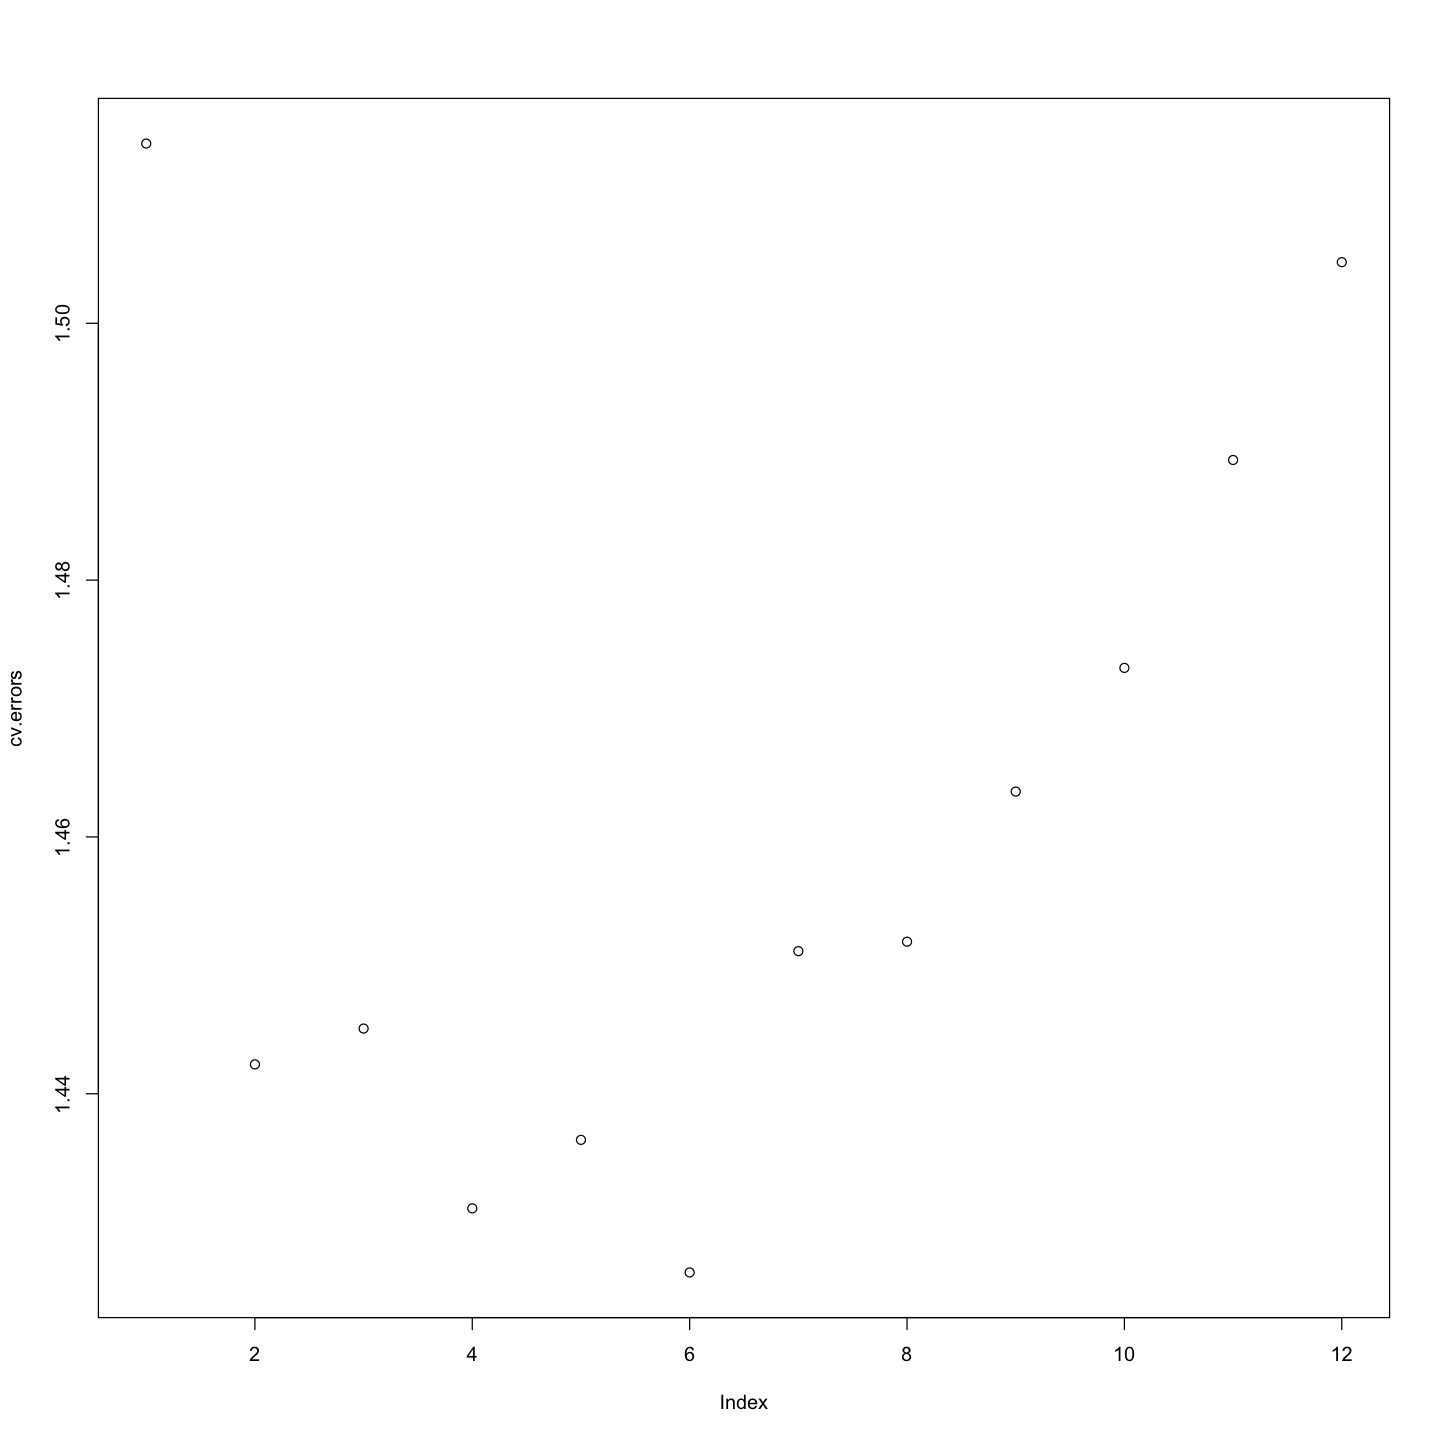

In [104]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "self_esteem_single_1") %>%
  map(get_cv_error, data = df[157:289,]) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "self_esteem_single_1") # best model

#### BMI

In [105]:
models <- regsubsets(bmi~.,
                     data = df[,c(names(val_cols), 'bmi', 'domain_gap')],
                     nvmax = 12)
summary(models)

Subset selection object
Call: regsubsets.formula(bmi ~ ., data = df[, c(names(val_cols), "bmi", 
    "domain_gap")], nvmax = 12)
12 Variables  (and intercept)
                       Forced in Forced out
ambition_score             FALSE      FALSE
boredomProne_score         FALSE      FALSE
bscs_score                 FALSE      FALSE
con_hex_score              FALSE      FALSE
dass_depress               FALSE      FALSE
dass_anxiety               FALSE      FALSE
dass_stress                FALSE      FALSE
future_score               FALSE      FALSE
grit_score                 FALSE      FALSE
needForCognition_score     FALSE      FALSE
workEthic_score            FALSE      FALSE
domain_gap                 FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          ambition_score boredomProne_score bscs_score con_hex_score
1  ( 1 )  " "            " "                " "        " "          
2  ( 1 )  " "            " "                " "        " "         

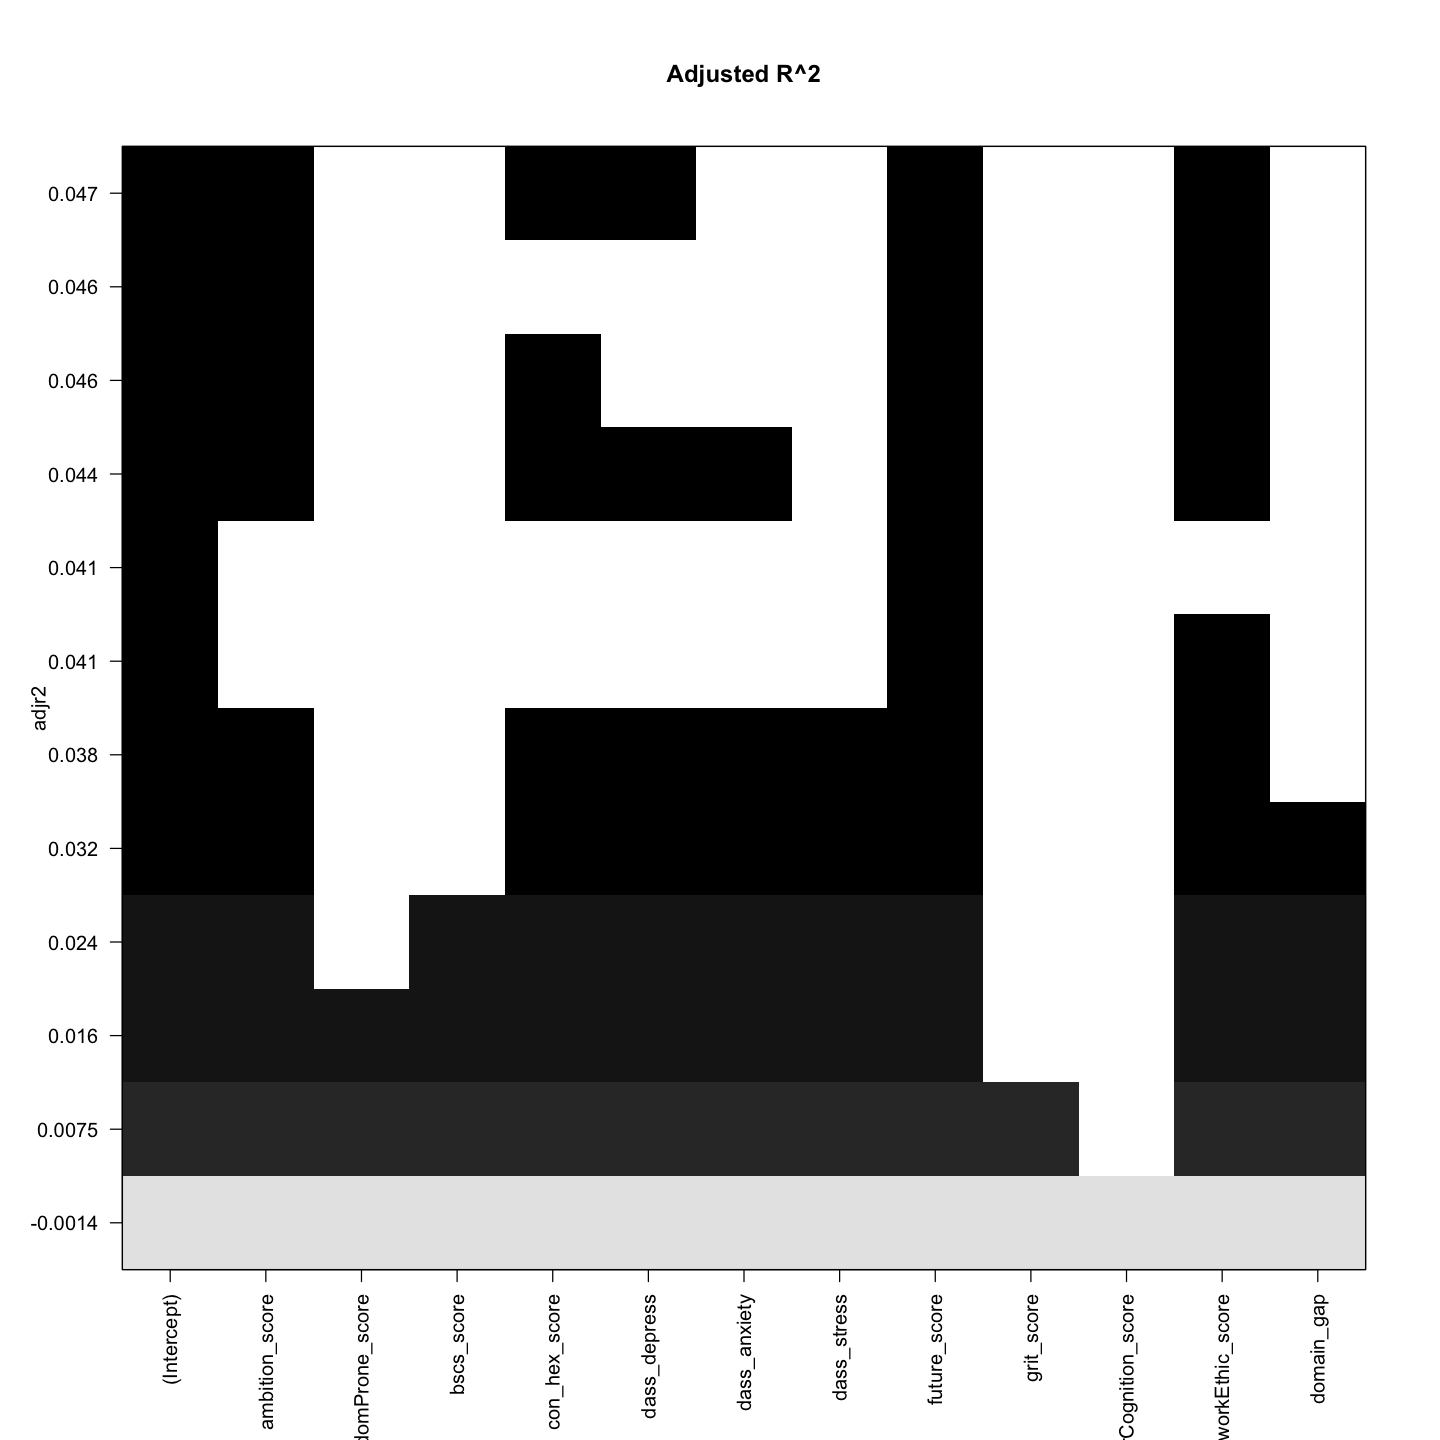

In [107]:
plot(models, scale = "adjr2", main = "Adjusted R^2")

In [108]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 5      1  1

##### Cross Validation

[1] 5.508089 5.522241 5.592096 5.643446 5.671801 5.703359 5.745167 5.829499
 [9] 5.856965 5.922513 5.977420 6.092126

bmi ~ future_score
<environment: 0x163d48340>

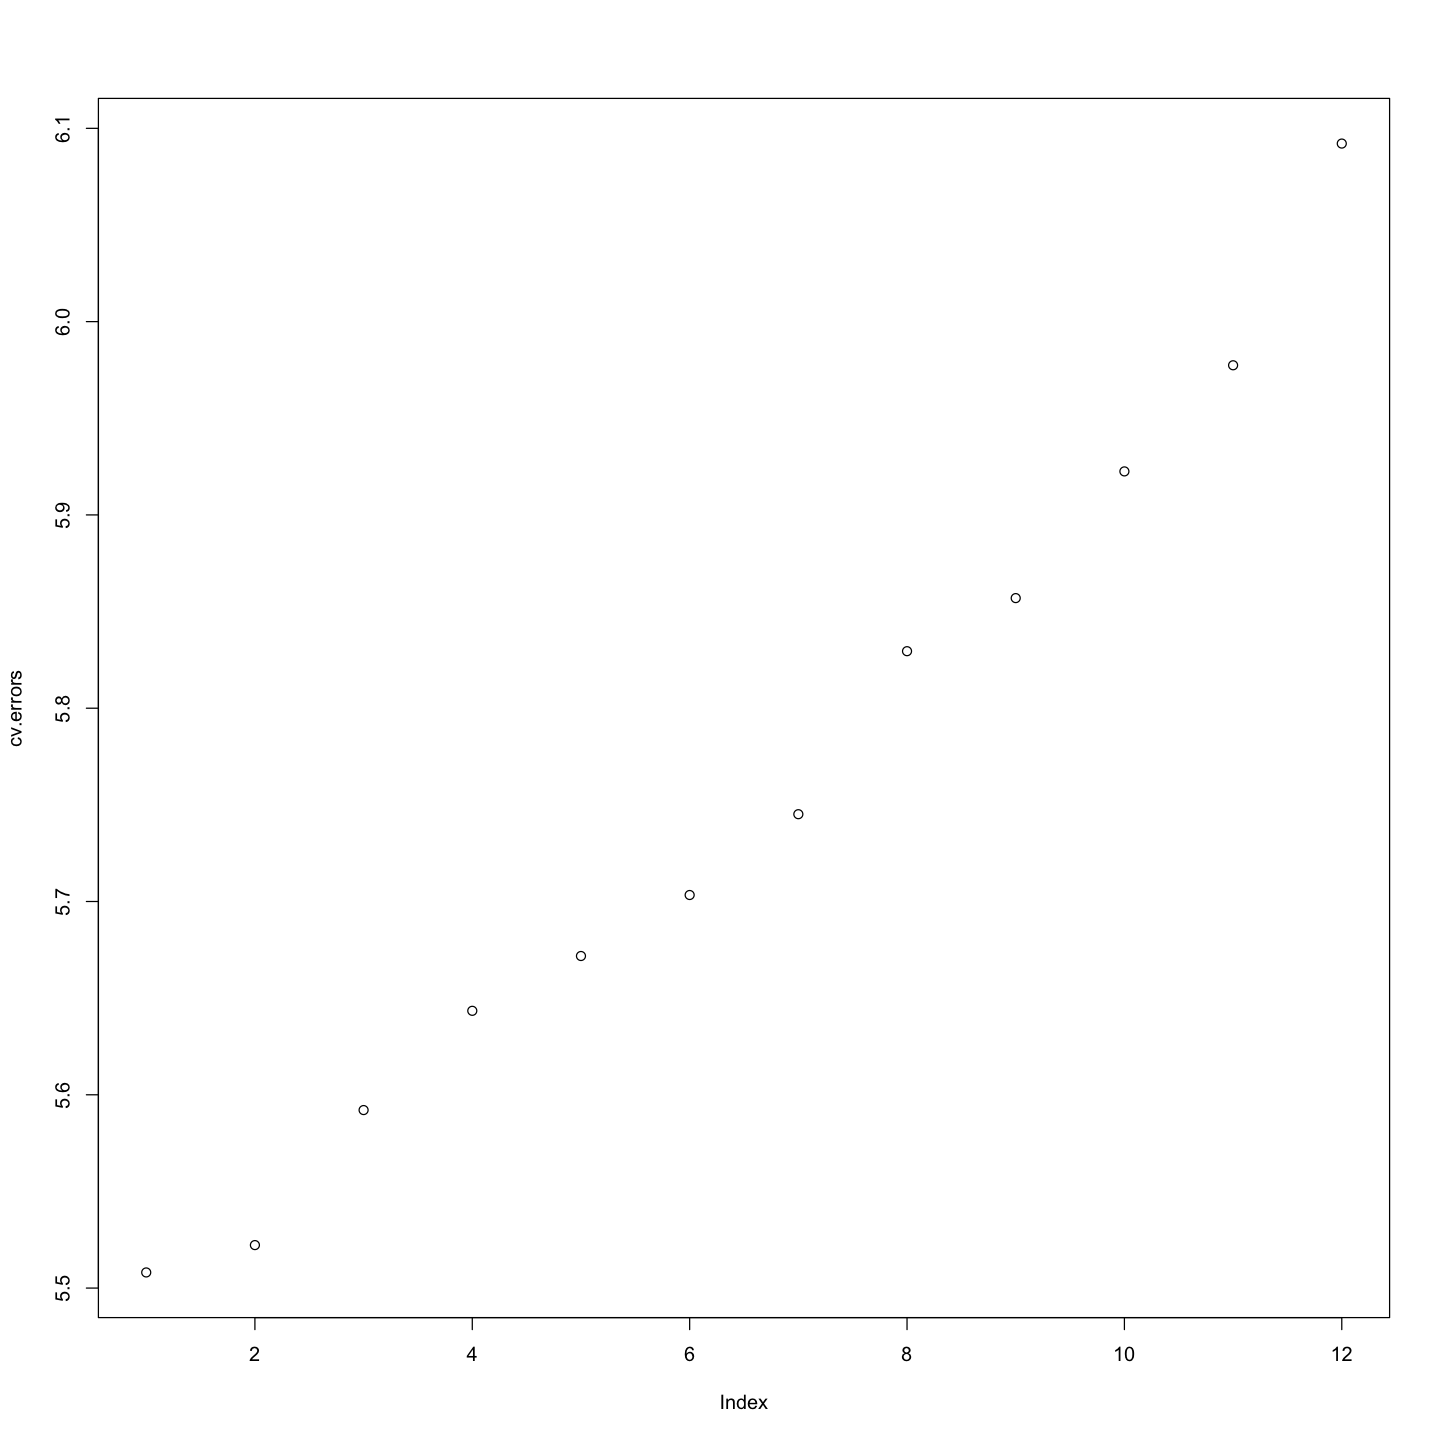

In [113]:
model.ids <- 1:12
cv.errors <-  map(model.ids, get_model_formula, models, "bmi") %>%
  map(get_cv_error, data = na.omit(df[157:289,])) %>%
  unlist()
      
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "bmi") # best model

## Measure Prediction: Validations

In [264]:
# validation measures of interest
val_m = c('self_esteem_single_1', 'swl_cantril_ladder',
          'grit_score', 'workEthic_score', 'future_score',
          'bscs_score', 'ambition_score', 'boredomProne_score',
          'ccs_score', 'needForCognition_score')


In [265]:
df = validation_measures %>%
    as_tibble() %>%
    select(subjectID, all_of(val_m))

# add w_domain gap
df = merge(df, select(ib_measures_df, subjectID, w_domain_gap), by = 'subjectID')
# add bmi
df = merge(df, select(demographics, subjectID, bmi), by = 'subjectID')

In [266]:
head(df,3)

subjectID self_esteem_single_1 swl_cantril_ladder grit_score workEthic_score
1 1         6                    9                  3.00       4.4            
2 2         2                    5                  2.25       1.7            
3 3         2                    6                  2.75       4.0            
  future_score bscs_score ambition_score boredomProne_score ccs_score
1 3.9          3.230769   3.0            154                189      
2 2.3          1.846154   2.2            116                161      
3 5.2          3.307692   3.4            121                226      
  needForCognition_score w_domain_gap bmi     
1 53                     1.680000     24.37878
2 49                     3.900000     21.02642
3 58                     3.288462     23.43164

### W Gap

In [268]:
models <- regsubsets(w_domain_gap~.,
                     data = select(df, -c(swl_cantril_ladder, bmi, self_esteem_single_1, subjectID)),
                     nvmax = NULL)
as.data.frame(summary(models)$outmat)

grit_score workEthic_score future_score bscs_score ambition_score
1  ( 1 )                                         *                        
2  ( 1 )                            *            *                        
3  ( 1 )                            *            *          *             
4  ( 1 ) *                          *            *          *             
5  ( 1 ) *                          *            *          *             
6  ( 1 ) *          *               *            *          *             
7  ( 1 ) *          *               *            *          *             
8  ( 1 ) *          *               *            *          *             
         boredomProne_score ccs_score needForCognition_score
1  ( 1 )                                                    
2  ( 1 )                                                    
3  ( 1 )                                                    
4  ( 1 )                                                    
5  ( 1 ) *                                                  
6  ( 1 ) *                                                  
7  ( 1 ) *                            *                     
8  ( 1 ) *                  *         *

In [259]:
# model selection criteria
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2 CP BIC
1 6      6  3

#### Cross Validation

[1] 1.610049 1.549008 1.544974 1.530508 1.534701 1.551095 1.533375 1.542927

self_esteem_single_1 ~ grit_score + future_score + bscs_score + 
    ambition_score
<environment: 0x125350830>

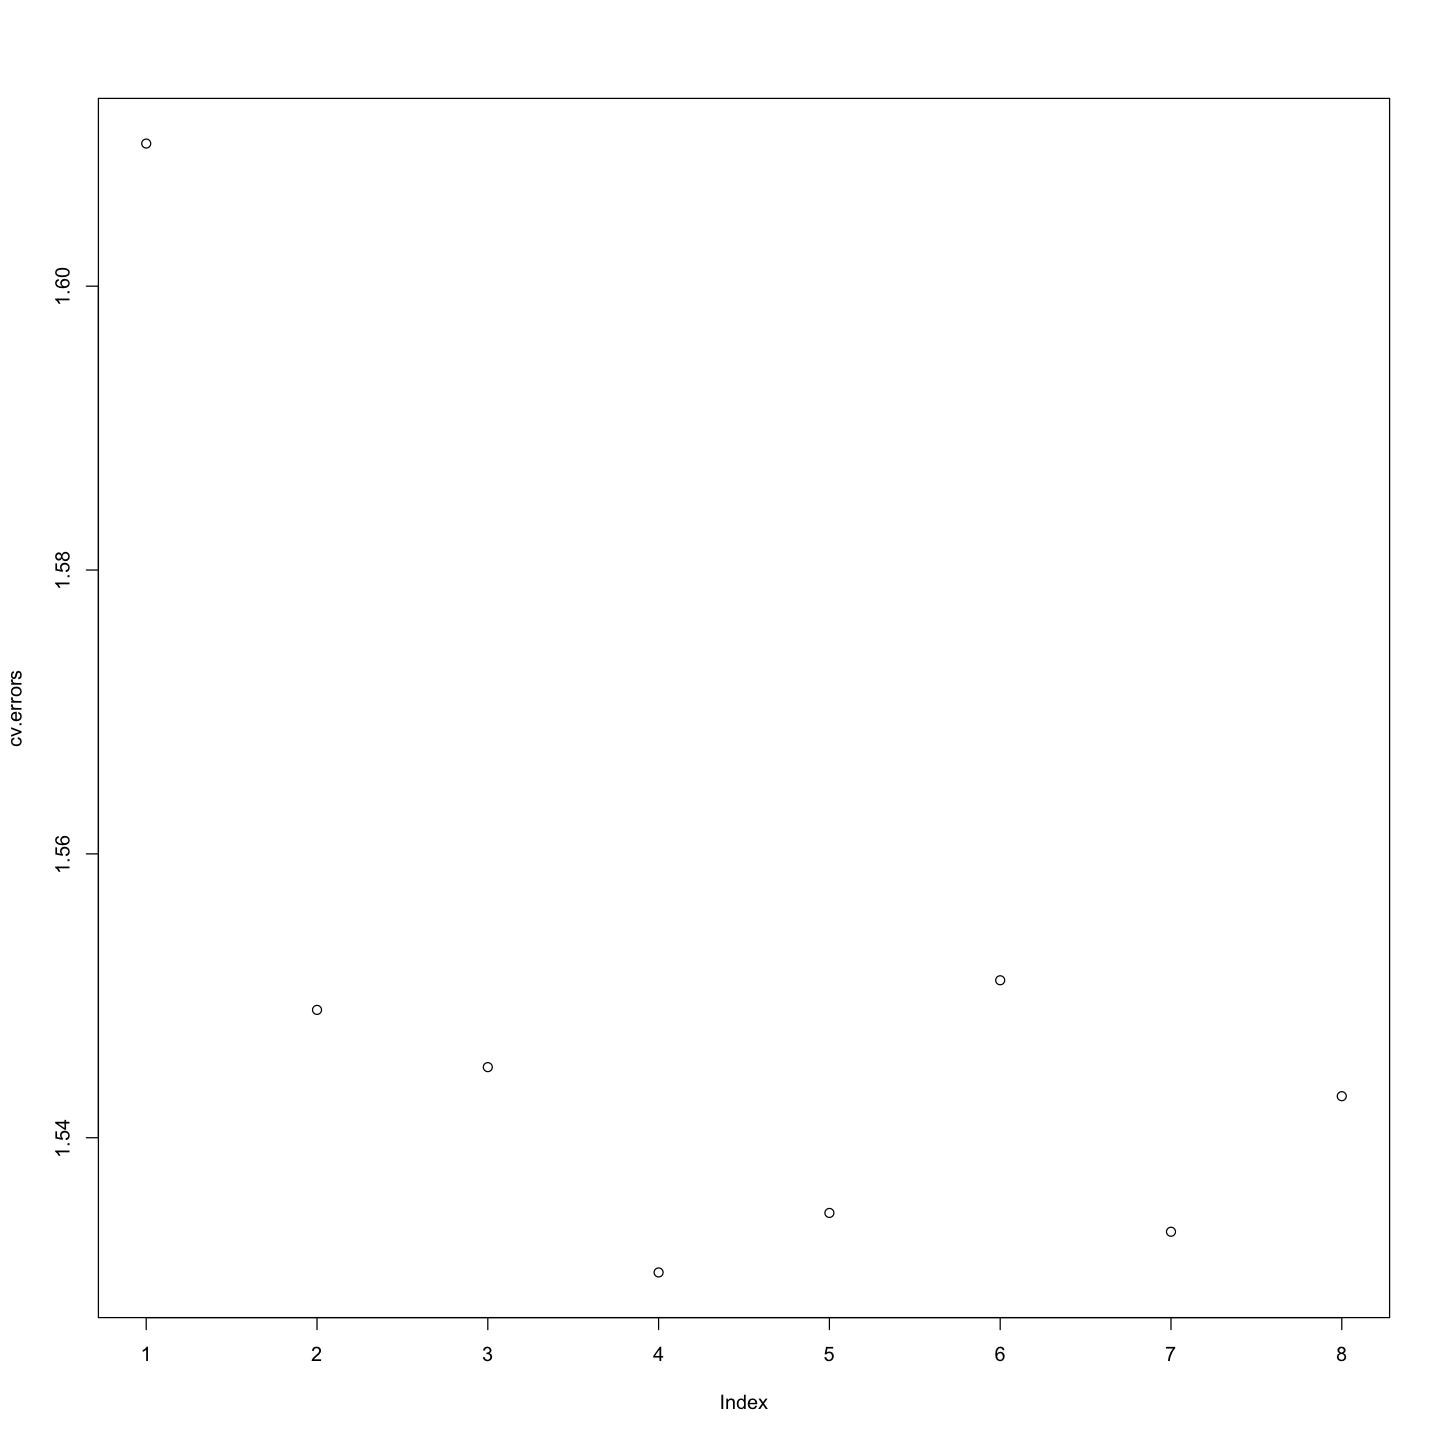

In [260]:
model.ids <- 1:8
cv.errors <-  map(model.ids, get_model_formula, models, "self_esteem_single_1") %>%
  map(get_cv_error, data = df) %>%
  unlist()
cv.errors # list errors
plot(cv.errors) # plot errors
get_model_formula(which.min(cv.errors), models, "self_esteem_single_1") # best model